In [2]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['svg.fonttype'] = 'none'

arr = np.asarray

import scanpy as sc
sns.set(font_scale=1.5)

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

In [3]:
# import pickle
# with open("filesoi", 'wb') as f:
#     pickle.dump(filesoi, f)

In [4]:
import sys
import glob
sys.path.append("./code/")
from hic_zscore_functions import *
import initialize
# reload(initialize)
from initialize import *

treg_250kb = cooler.Cooler('./Treg_all.mcool::/resolutions/250000')
tcon_250kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/250000')

treg_50kb = cooler.Cooler('./Treg_all.mcool::/resolutions/50000')
tcon_50kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/50000')

treg_5kb = cooler.Cooler('./Treg_all.mcool::/resolutions/5000')
tcon_5kb = cooler.Cooler('./Tconv_all.mcool::/resolutions/5000')

(chromsizes, parsed_chroms, region_to_inds, 
    all_region_to_ind, inds_to_region, all_ind_to_region, 
    chrom_to_start, chrom_to_end) = initialize_helper_vars(treg_250kb)


In [5]:
import initialize
from initialize import *

gene_to_ind, ind_to_gene = initialize_genes(all_ind_to_region, all_region_to_ind)

In [6]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

In [7]:
from matplotlib import transforms

def get_off_diag_mat_by_places(cool, place1, place2, balance=False):
    chrom1, s1, e1 = place1
    chrom2, s2, e2 = place2
    if 'chr' in cool.chromnames[0]:
        m = cool.matrix(balance=balance).fetch(('chr' + chrom1, s1, e1), ('chr' + chrom2, s2, e2))
    else:
        m = cool.matrix(balance=balance).fetch((chrom1, s1, e1), (chrom2, s2, e2))
    return m
    
def get_tcon_mat(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'./Tconv_all.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2


def get_treg_mat(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'./Treg_all.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2

def get_human_mat(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_merged_cools/CD4_24hr_stimulated.Human.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2


def get_human_treg_hichip_mat(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset//zoomified_merged_cools/Treg_H3K27ac_HiChIP.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2

def get_human_tn_hichip_mat(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_merged_cools/Naïve_H3K27ac_HiChIP.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2

def get_non_treg_mat(cool, place1, place2, filesoi, d=1, resolution=5000, **kwargs):
    print(kwargs)
    m = get_off_diag_mat_by_places(cool, place1, place2, **kwargs)
    return m, place1, place2


def get_non_treg_mat_balance(cool, place1, place2, filesoi, d=1, resolution=5000, balance=True, **kwargs):
    m = get_off_diag_mat_by_places(cool, place1, place2, balance=balance, **kwargs)
    return m, place1, place2

In [8]:
def get_non_treg_mat2(cool, place1, place2, filesoi, d=1, resolution=5000, **kwargs):
    return kwargs

In [9]:
def get_treg_saka(place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'./hichip/merged/saka_ttreg.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2

def get_tcon_saka(place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'./hichip/merged/saka_cd4sp_all.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2

def get_tcon_benoist(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'./hichip/merged/benoist_tcon_all.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2

def get_treg_benoist(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'./hichip/merged/benoist_treg_all.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2


def get_tcon_jesse(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_merged_cools/TCon.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2

def get_treg_jesse(tmpcool, place1, place2, resolution=5000, balance=False, filesoi=None):
    cool = cooler.Cooler(f'/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_merged_cools/TReg.mcool::/resolutions/{resolution}')
    try:
        mat = get_off_diag_mat_by_places(cool, place1, place2, balance=balance)
    except Exception as e:
        print(e)
    m = mat.astype(float)
    return m, place1, place2


In [10]:
whole_genome_gtf = pbt.BedTool('/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz')
all_gene_names = set()
for i in whole_genome_gtf:
    if 'Name' in i.attrs:
        all_gene_names.add(i.attrs['Name'])

all_gene_names_except_these = all_gene_names - set(['Ets1', 'Foxp1', 'Lef1', 'Bach2it1', 'Bach2', 'Ikzf1', 'Bcl2', 
                                                    'Mir3473f', 'Runx1', 'Tgfbr3', 'Ikzf2', 'Cd247', 'Bcl11b']
                                                   )
all_gene_names_except_these = all_gene_names_except_these - set(['Ier5', 'Dusp10', 'NA', 'Cxcr4', 'Mpzfl1', 'Cd247', 'Ppp2r5a', 'Fasl', 'Platr22', 'Itpkb', 'Ier5''Platr22', 'Rgs1', 'Mr1','Zfp281','Suco', 'Pigc', 'Creg1', 'Gm16565', 'Pou2f1','Psen2',])


all_gene_names_except_these = all_gene_names_except_these - set(['Ets1', 'Foxp1', 'Lef1', 'Bach2it1', 'Bach2', 'Ikzf1', 'Bcl2', 
                                                    'Mir3473f', 'Runx1', 'Tgfbr3', 'Ikzf2', 'Cd247', 'Bcl11b',
                                                   'Ctla4', 'Icos', 'Cd28']
                                                   )

all_gene_names_except_these = all_gene_names_except_these - set(['Lef1', 'Camk2d', 'Nfkb1', 'Slc9b1', 'Ube2d3', 'Cisd2', 'Col25a1', 'Rpl34',])
all_gene_names_except_these.add("Mr1")


In [11]:
def grange_to_anc(grange):
    chrom, _ = grange.split(":")
    s, e = _.split("-")
    s, e = map(int, [s, e])
    return chrom, s, e
def loop_grange_to_loop(grange):
    l1, l2 = grange.split("_")
    l1, l2 = map(grange_to_anc, [l1, l2])
    return l1, l2

In [14]:
treg_bbdict = {
    'H3K27ac Treg' : bbi.open('/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/bws/GSM.SRR5385344.H3K27ac_ChIP-seq_of_Treg_replicate_2.bw'),
}

tcon_bbdict = {
    'H3K27ac Tcon' : bbi.open('/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/bws/GSM.SRR5385347.H3K27ac_ChIP-seq_of_Tconv_replicate_1.bw'),
}
# merged_cooler = cooler.Cooler('./hic_compendium_coolfile/r=0.7_noArmCl13.mcool::/resolutions/5000')

In [15]:
from importlib import reload
import plotting_functions
reload(plotting_functions)
from plotting_functions import *

to_ignore = {'Pgap1', 'Akr1cl', 'Crygd', 'Fn1', 'Lancl1', 'Tmeff2', 'Mars2', 'Pms1', 'Mettl21a', 'Ankrd44', 'Atic', 
 'Kansl1l', 'Myl1', 'Crygc', 'Ccnyl1', 'Hspd1', 'Gls', 'Boll', 'Crygf', 'Aox4', 'Hecw2', 'Crygb', 
 'Hibch', 'Dnah7a', 'Rftn2', 'BC055402', 'Plcl1', 'Tyw5', 'Hsfy2', 'Sf3b1', 'Igfbp5', 'Nabp1', 
 'Mfsd6', 'Stat4', 'Myo1b', 'Inpp1', 'Aox1', 'Cryge', 'Creb1', 'Bard1', 'Xrcc5', 'Coq10b', 
 'Fastkd2', 'Kctd18', 'Tmem169', 'Aox3', 'Mdh1b', 'Klf7', 'Mob4', 'Nrp2', 'Mstn', 'Tmem237', 
 'Gtf3c3', 'Rpl37a', 'Acadl', 'Stk17b', 'Fzd5', 'Igfbp2', 'Nemp2', 'Dytn', 'Ccdc150',
  'Nab1', 'Idh1', 'Mreg', 'Smarcal1', 'Ankar', 'Pikfyve', 'Osgepl1', 'Pecr', 'Cryga', 'Ormdl1', 'Rpe', 
 'Hspe1', 'Cavin2', 'Apol7d', 'Asnsd1', 'Maip1', 'Sgo2a'}.union({'Prkag3', 'Akr1cl', 'Cnppd1', 'Bcs1l', 'Crygd', 'Wdfy1', 'Fn1', 'Lancl1', 'Slc23a3', 'Mettl21a', 'Zfp142', 
 'Acsl3', 'Atic', 'Kansl1l', 'Stk11ip', 'Stk36', 'Cxcr2', 'Myl1', 'Crygc', 'Ccnyl1', 'Cd28', 'Ap1s3', 'Crygf', 
 'Aox4', 'Crygb', 'Speg', 'Chpf', 'Slc11a1', 'Retreg2', 'Igfbp5', 'Pax3', 'Obsl1', 'Rnf25', 'Cryba2', 
 'Wnt10a', 'Cryge', 'Aox1', 'Creb1', 'Pard3b', 'Wnt6', 'Bard1', 'Fam124b', 'Gpbar1', 'Xrcc5', 'Arpc2', 
 'Asic4', 'Slc4a3', 'Fastkd2', 'Kctd18', 'Tmem169', 'Zfand2b', 'Glb1l', 'Aox3', 'Aamp', 
 'Ttll4', 'Mdh1b', 'Rufy4', 'Klf7', 'Resp18', 'Nrp2', 'Des', 'Dnpep', 'Cul3', 'Ctdsp1', 'Ptprn', 'Tmem237', 
 'Rpl37a', 'Cfap65', 'Acadl', 'Mogat1', 'Dnajb2', 'Fzd5', 'Tuba4a', 'Fev', 'Catip', 'Igfbp2', 'Dytn', 
 'Ihh', 'Scg2', 'Inha', 'Idh1', 'Serpine2', 'Mreg', 'Smarcal1', 'Cxcr1', 'Pnkd', 'Ankar', 'Pikfyve', 
 'Pecr', 'Utp14b', 'BC035947', 'Cryga', 'Plcd4', 'Tnp1', 'Rpe', 'Mrpl44', 'Kcne4', 'Cdk5r2', 
 'Apol7d', 'Tmbim1', 'Stk16', 'Tmem198', 'Vil1', 'Pinc', 'Cnot9', 'Sgo2a', 'Atg9a', 'Farsb', 'Abcb6', 'Ankzf1'}
    ).union(
{'Nyap2', 'Carf', 'Spats2l', 'Adam23', 'Pth2r', 'Abi2', 'Cd28', 'Bzw1', 'Tns1', 'Casp8', 'Raph1', 'Ndufb3', 
 'Ctla4', 'Fzd7', 'Clk1', 'Plekhm3', 'Usp37', 'Als2', 'C2cd6b', 'Cps1', 'Bmpr2', 'Dock10', 'Snora41', 'Aox2', 
 'Icos', 'Ino80d', 'Erbb4', 'Abca12', 'Zdbf2', 'Fam117b', 'Unc80', 'Nrp2', 'Nop58', 'Sgpp2', 'Trak2', 'Epha4', 
 'Cdk15', 'Nbeal1', 'Spag16', 'Ndufs1', 'Map2', 'Cyp27a1', 'Cflar', 'Vwc2l', 'Stradb', 'Nhej1', 'Fam126b', 
 'Als2cr12', 'Ikzf2', 'Orc2', 'Gpr1', 'Ppil3', 'Cyp20a1', 'March4', 'Snord70', 'Eef1b2', 'Mpp4', 'Ino80dos', 
 'Nif3l1', 'Ica1l', 'Sumo1', 'Wdr12', 'Snord11', 'Platr12', 'C2cd6', 'Carf', 'Spats2l', 'Adam23', 'Pth2r', 'Abi2', 'Cd28', 'Bzw1', 'Casp8', 'Raph1', 'Ndufb3', 'Ctla4', 'Fzd7', 
 'Clk1', 'Stat4', 'Plekhm3', 'Als2', 'C2cd6b', 'Cps1', 'Bmpr2', 'Snora41', 'Aox2', 'Icos', 'Ino80d', 'Erbb4', 
 'Abca12', 'Zdbf2', 'Fam117b', 'Unc80', 'Nrp2', 'Nop58', 'Trak2', 'Cdk15', 'Nbeal1', 'Spag16', 'Ndufs1', 'Map2', 
 'Cflar', 'Vwc2l', 'Stradb', 'Fam126b', 'Als2cr12', 'Ikzf2', 'Stat1', 'Satb2', 'Orc2', 'Gpr1', 'Ppil3', 'Cyp20a1',
 'March4', 'Snord70', 'Eef1b2', 'Mpp4', 'Ino80dos', 'Nif3l1', 'Ica1l', 'Sumo1', 'Wdr12', 'Snord11', 'Platr12', 
 'C2cd6',
'Pard3bos3',
'Pard3bos1',
'Pard3bos2',
'Satb2',
})

to_keep = {'Icos', 'Cd28', 'Ctla4', 'Stat4', 'Ikzf2', 'Spag16'}

large_ignore_set = list(to_ignore - to_keep)



med_ignore_set = ['Snora41', 'Aox2', 'Cdk15', 'Carf', 'Nop58', 
 'Casp8', 'Ndufs1', 'Raph1', 'Ndufb3', 'Cflar', 'Stradb', 
 'Fam126b', 'Als2cr12', 'Fzd7', 'Clk1', 'Zdbf2', 'Als2', 'Fam117b', 'Orc2', 
 'C2cd6b', 'Gpr1', 'Ppil3',  'Bmpr2', 'Bzw1', 'C2cd6', 'Trak2',
 'Snord11', 'Mpp4', 'Snord70', 'Ino80dos', 'Eef1b2', 'Nif3l1', 
 'Ica1l', 'Pard3bos2', 'Sumo1', 'Pard3bos1', 'Wdr12', 'Pard3bos3', 'Platr12'] + ['Fn1', 
 'Atic', 'Abca12', 'Cps1', 'Apol7d', 'Nbeal1', 'Cyp20', 'Abi2', 'Nrp2']
med_ignore_set = med_ignore_set + ['Abi', 'Cyp', 'Nbeal', 'Vwc2l', 'Cyp20a1', 'Ino80d']


small_ignore_set = ['Abi2', 'Cyp20a1', 'Nbeal1', 'Nbeal', "Wdr12", 'Raph', "Carf", "Ica1l",
                   'Raph1', 
                    'Mroh2a', 'Ugt1a10', 'Platr5', 'Trpm8', 'Spp2', 'Hjurp',
                    'Ugt1a9', 'Ugt1a8', 'Ugt1a7c', 'Ugt1a6b', 'Ugt1a6a', 'Ugt1a5', 'Ugt1a2', 'Dnajb3', 'Ugt1a1'                   
                   ]


ylimdict = {
    'H3K27ac Treg' : (0, 30),
    'H3K27ac Tcon' : (0, 30),
}

In [16]:
plt.rcParams['pdf.fonttype'] = 42

In [18]:
%autoreload 2 
from plotting_functions import * 
from metadomain_plotting_functions import * 
from metadomain_plotting_functions import * 
from plotting_functions import * 

# Update rcParams to set default font size
def make_figure_1j():
    plt.rcParams.update({
        'axes.labelsize': 8,       # x and y labels' font size
        'xtick.labelsize': 6,      # x tick labels' font size
        'ytick.labelsize': 6,      # y tick labels' font size
        'axes.titlesize': 10,        # Axes title font size
        'patch.linewidth' : .35,
        'lines.linewidth' : .5,
    
        # 'legend.fontsize': 4,      # Legend font size
    })
    small_ignore_set = {'Nyap2', 'Carf', 'Spats2l', 'Adam23', 'Pth2r', 'Abi2', 'Bzw1', 'Tns1', 'Casp8', 'Raph1', 'Ndufb3', 
 'Fzd7', 'Clk1', 'Plekhm3', 'Usp37', 'Als2', 'C2cd6b', 'Cps1', 'Bmpr2', 'Dock10', 'Snora41', 'Aox2', 
      'Ino80d', 'Erbb4', 'Abca12', 'Zdbf2', 'Fam117b', 'Unc80', 'Nrp2', 'Nop58', 'Sgpp2', 'Trak2', 'Epha4', 
     'Cdk15', 'Nbeal1', 'Spag16', 'Ndufs1', 'Map2', 'Cyp27a1', 'Cflar', 'Vwc2l', 'Stradb', 'Nhej1', 'Fam126b', 
     'Als2cr12', 'Orc2', 'Gpr1', 'Ppil3', 'Cyp20a1', 'March4', 'Snord70', 'Eef1b2', 'Mpp4', 'Ino80dos', 
     'Nif3l1', 'Ica1l', 'Sumo1', 'Wdr12', 'Snord11', 'Platr12', 'C2cd6', 'Carf', 'Spats2l', 'Adam23', 'Pth2r', 'Abi2', 'Bzw1', 'Casp8', 'Raph1', 'Ndufb3', 'Fzd7', 
     'Clk1', 'Stat4', 'Plekhm3', 'Als2', 'C2cd6b', 'Cps1', 'Bmpr2', 'Snora41', 'Aox2', 'Ino80d', 'Erbb4', 
     'Abca12', 'Zdbf2', 'Fam117b', 'Unc80', 'Nrp2', 'Nop58', 'Trak2', 'Cdk15', 'Nbeal1', 'Spag16', 'Ndufs1', 'Map2', 
     'Cflar', 'Vwc2l', 'Stradb', 'Fam126b', 'Als2cr12', 'Stat1', 'Satb2', 'Orc2', 'Gpr1', 'Ppil3', 'Cyp20a1',
     'March4', 'Snord70', 'Eef1b2', 'Mpp4', 'Ino80dos', 'Nif3l1', 'Ica1l', 'Sumo1', 'Wdr12', 'Snord11', 'Platr12', 
     'C2cd6',
    'Pard3bos3',
    'Pard3bos1',
    'Pard3bos2',
    'Satb2',
    }
    ignore_sets = [
        [small_ignore_set],
        [small_ignore_set],
    ]
    ds = [
        [300000*2],
        [300000*2],
    ]
    funcs = [
        [get_tcon_jesse],
        [get_treg_jesse],
    ]
    labels = [
        ['Tcon', 'Tcon', 'Tcon'],
        ['Treg', 'Treg', 'Treg'],
    ]
    
    vmins = [[.9e-4],
             [.9e-4],]
    vmaxes = [[ 2e-3],
              [ 2e-3],]
    
    n_rows = 2
    n_cols = 1
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, 1, fgsz = (2*30*mm, 2*30*mm), dpi=300)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        ignore_set = ignore_sets[row_ind][col_ind]
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        vmin = vmins[row_ind][col_ind]
        vmax = vmaxes[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(treg_50kb, 243, 278, func, label, resolution=50_000, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict={},
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = ylimdict, ax=ax,
                                    ignore_method='grayout_no_text',
                                                   skip_gm=True,
                                                   skip_rik = True
                                               )
        # if (c+1) < (n//n_cols): # if it isn't on the bottom row
            # newaxs[0][1].remove()
            # for a in newaxs[1]:
                # a.remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
                
    fig.savefig('./plots/paper/fig1/ikzf2_ctla4_jesse.pdf', bbox_inches='tight', dpi= 300)

In [22]:
%autoreload 2 
from plotting_functions import * 
from metadomain_plotting_functions import * 
from metadomain_plotting_functions import * 
from plotting_functions import * 

# Update rcParams to set default font size

def make_figure_s9a():
    ignore_sets = [
        [small_ignore_set],
        [small_ignore_set],
    ]
    ds = [
        [300000*2],
        [300000*2],
    ]
    funcs = [
        [get_tcon_benoist],
        [get_treg_benoist],
    ]
    labels = [
        ['Treg', 'Treg', 'Treg'],
        ['Tcon', 'Tcon', 'Tcon'],
    ]
    
    vmins = [[.9e-4],
             [.9e-4],]
    vmaxes = [[ 2e-3],
              [ 2e-3],]
    
    n_rows = 2
    n_cols = 1
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, n_rows, fgsz = (2*30*mm, 2*30*mm), dpi=300)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        ignore_set = ignore_sets[row_ind][col_ind]
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        vmin = vmins[row_ind][col_ind]
        vmax = vmaxes[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(treg_50kb, 243, 278, func, label, resolution=50_000, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict=bbdict,
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = ylimdict, ax=ax,
                                    ignore_method='grayout_no_text',
                                    skip_gm=True,
                                    skip_rik = True

                                               )
        if (c+1) < (n//n_cols): # if it isn't on the bottom row
            newaxs[0][1].remove()
            for a in newaxs[1]:
                a.remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
    fig.savefig('./plots/paper/s9/ikzf2_ctla4_s9a.pdf', bbox_inches='tight', dpi= 300)

In [34]:
%autoreload 2 
from plotting_functions import * 
from metadomain_plotting_functions import * 
from metadomain_plotting_functions import * 
from plotting_functions import * 
# Update rcParams to set default font size
plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,

    # 'legend.fontsize': 4,      # Legend font size
})
    
def make_intra_treg_tcon_example(i1, i2, resolution=25_000, ignore_set=set(), 
                                vmin=.9e-4, vmax=1e-3, d = 50_000*8, 
                                 outpath='/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz',
                                ):
    ds = [
        [d, d],
    ]
    funcs = [
        [get_treg_mat, get_tcon_mat],
    ]
    labels = [
        ['Treg', 'Tcon'],
    ]
    
    
    n_rows = len(ds)
    n_cols = len(ds[0])
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, n_rows, fgsz = (2*30*mm, 2*30*mm), dpi=100)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(treg_50kb, i1, i2, func, label, resolution=resolution, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict=bbdict,
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = ylimdict, ax=ax,
                                    ignore_method='grayout_no_text', outpath=outpath,
                                               )
        if c <= (n//n_cols): # if it isn't on the bottom row
            print("HI")
            # newaxs[0][1].remove()
            for a in newaxs[1]:
                a.remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
    return fig

def make_figure_s6b_g():
    fig = make_intra_treg_tcon_example(5699, 5742, resolution=50_000, ignore_set=all_gene_names - {'Themis', 'Fyn', 'Ptprk'},
                                vmax = 3e-3, vmin=1e-4)
    fig.savefig('./plots/paper/s6/intra_themis_fyn.pdf', bbox_inches='tight', dpi=300)
    
    fig = make_intra_treg_tcon_example(5145, 5217, resolution=50_000, ignore_set=all_gene_names - {'Ets1', 'Izumo1r', 'Gpr83', 'Fli1'},
                                vmax = 3e-3, vmin=1e-4, d = 400_000,
                                      outpath = '/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/gencode.vM23.basic.annotation.gff3.nochr.gz')
    
    fig.savefig('./plots/paper/s6/intra_ets1_izumo1r.pdf', bbox_inches='tight', dpi=300)
    
    fig = make_intra_treg_tcon_example(2179, 2341, resolution=50_000, ignore_set=all_gene_names - {'Tgfbr1', 'Tox', 'Col15a1',},
                                vmax = 3e-3, vmin=1e-4)
    
    fig.savefig('./plots/paper/s6/intra_tox_tgfbr1.pdf', bbox_inches='tight', dpi=300)
    fig = make_intra_treg_tcon_example(5895, 6095, resolution=50_000, ignore_set=all_gene_names - {'Stat6',  
                                                                                             'Sumo3', 'Itgb2',},
                                vmax = 3e-3, vmin=1e-4)
    
    fig.savefig('./plots/paper/s6/intra_stat6_itgb2.pdf', bbox_inches='tight', dpi=300)
    
    
    fig = make_intra_treg_tcon_example(5641, 5971, resolution=50_000, 
                                ignore_set=all_gene_names - {'Btg1', 'Hivep2'})
    
    fig.savefig('./plots/paper/s6/intra_btg1_hivep2.pdf', bbox_inches='tight', dpi=300)
    
    
    fig = make_intra_treg_tcon_example(9522, 9572, resolution=50_000, ignore_set=all_gene_names - {'Nfatc1', 'Ldlrad4'},
                                vmax = 3e-3, vmin=1e-4)
    
    fig.savefig('./plots/paper/s6/intra_nfatc1_ldlrad4.pdf', bbox_inches='tight', dpi=300)


In [66]:
%autoreload 2 
from plotting_functions import * 
from metadomain_plotting_functions import * 
from metadomain_plotting_functions import * 
from plotting_functions import * 


def make_figure_3b():
    ignore_set_inter = ['Ddc', 'Vwc2', 'Grb10', 'Fignl1', 'Spata48', 'Ostc', 'Rpl34', 'Papss1', 'Etnppl', 'Cyp2u1', 'Sgms2', 'Hadh', 'Erbb4', 'Spag16', 'Kcnj5', 'Arhgap32', 'Kcnj1', 'Fli1',
                       ]
    ignore_set_inter += {'Tcirg1', 'Pold4', 'Aldh3b3', 'Pcx', 'Gstp1', 'Gstp3', 'Cdk2ap2', 'Acy3', 'Clcf1', 'Rps6kb2', 'Tmem134', 'Rad9a', 'Gpr152', 'Aldh3b2', 'Ndufv1', 'Lrp5', 'Rce1', 'Rhod', 'Nudt8', 'Tbc1d10c', 'Gstp2', 'Tbx10', 
                         'Pitpnm1', 'Cabp4', 'Ssh3', 'Ppp6r3', 'Carns1', 'Aip', 'Aldh3b1',  'Syt12', 'Cabp2', 'Ankrd13d', 'Ndufs8',  'Unc93b1', 'Grk2', 'Kdm2a', 'Ppp1ca', 'Lrfn4', 'Kmt5b', 'Doc2g', 'Sptbn2', 'Chka', 'Nudt8', 'Pitpnm1', 
                         'Cabp4', 'Ssh3', 'Carns1', 'Aip', 'Aldh3b1', 'Syt12', 'Cabp2', 'Ankrd13d', 'Ndufs8'}
    ignore_set_inter += {'Hinfp', 'Scn4b', 'Ube4a', 'Mpzl2', 'Ddx6', 'Slc37a4', 'Scn2b', 'Phldb1', 'Hmbs', 'Ttc36', 'Mpzl3', 
                         'Ift46',   'Dpagt1',  'Trappc4', 'Upk2', 'Ccdc84', 'Tmem25', 'BC049352', 
                         'Arcn1', 'Cbl', 'Abcg4', 'Nlrx1', 'Pdzd3', 'Vps11', 'BC049987', 'Kmt2a', 'Ccdc153', 'C2cd2l', 
                         'Hyou1', 'Jaml', 'Treh', 'Mcam', 'Rps25', 'Tmprss4', 'Rnf26', 'Usp2', 'AC061963.1', 'Bcl9l', 'Mfrp', 'C1qtnf5',
                        'Atp5l', 'Cd3g',   'Thy1', 'Cd3d', 'Cd3e', 'Foxr1', }
    ignore_set_inter += {'Ankrd6', 'Casp8ap2', 'Map3k7', 'Lyrm2', 'Mdn1', 'Gja10', 'Bach2it1', 'Bach2os', 'Col25a1',}
    ignore_set_inter += {'Dnajc6', 'Ak4', 'Leprot', 'Cachd1', 'Raver2', 'H3f3a', 'Psen2', 'Parp1', 'Sde2', 'Acbd3', 'Cdc42bpa', 'Stum', 'Lin9', 'Lefty2', 'Pycr2', 'Mixl1', 'Coq8a', 'H3f3aos',
                        }
    
    # Update rcParams to set default font size
    plt.rcParams.update({
        'axes.labelsize': 8,       # x and y labels' font size
        'xtick.labelsize': 6,      # x tick labels' font size
        'ytick.labelsize': 6,      # y tick labels' font size
        'axes.titlesize': 10,        # Axes title font size
        'patch.linewidth' : .35,
        'lines.linewidth' : .5,
    
        # 'legend.fontsize': 4,      # Legend font size
    })
    ignore_sets = [
        [ignore_set_inter + ['Nabp1', ]],
        [ignore_set_inter + ['Nabp1', ]],
    ]
    ds = [
        [1500000//3],
        [1500000//3],
    ]
    funcs = [
        [get_treg_mat],
        [get_tcon_mat],
    ]
    labels = [
        ['Treg'],
        ['Tcon'],
    ]
    
    vmins = [[  .9e-5],
             [  .9e-5],]
    vmaxes = [[ 5e-4],
              [ 5e-4],]
    
    n_rows = len(ds)
    n_cols = len(ds[0])
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, n_rows, fgsz = (2*30*mm*3/4, 2*30*mm*3/4), dpi=300)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        print(c)
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        ignore_set = ignore_sets[row_ind][col_ind]
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        vmin = vmins[row_ind][col_ind]
        vmax = vmaxes[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(treg_50kb, 5216, 278, func, label, resolution=5_0000, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict=bbdict,
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = {}, ax=ax,
                                                   ignore_method='grayout_no_text',
                                                   skip_rik = True, skip_gm=True,
                                               )
        print(newaxs[0][1].get_xticks())
        for a in newaxs[1]:
            a.remove()
        
        if c < (n//n_cols)-1: # if it isn't on the bottom row
            newaxs[0][1].remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
    fig.savefig('./plots/paper/fig3/ets1_ikzf2.pdf', bbox_inches = 'tight', dpi = 300)

In [30]:
%autoreload 2 
from plotting_functions import * 
from metadomain_plotting_functions import * 
from metadomain_plotting_functions import * 
from plotting_functions import * 


def make_figure_1i():
    # Update rcParams to set default font size
    plt.rcParams.update({
        'axes.labelsize': 8,       # x and y labels' font size
        'xtick.labelsize': 6,      # x tick labels' font size
        'ytick.labelsize': 6,      # y tick labels' font size
        'axes.titlesize': 10,        # Axes title font size
        'patch.linewidth' : .35,
        'lines.linewidth' : .5,
    
        # 'legend.fontsize': 4,      # Legend font size
    })
    ignore_sets = [
        [all_gene_names_except_these, all_gene_names_except_these, small_ignore_set],
        [all_gene_names_except_these, all_gene_names_except_these, small_ignore_set],
    ]
    ds = [
        [4000000*3, 800000*3, 150000*2],
        [4000000*3, 800000*3, 150000*2],
    ]
    funcs = [
        [get_treg_mat, get_treg_mat, get_treg_mat],
        [get_tcon_mat, get_tcon_mat, get_tcon_mat],
    ]
    labels = [
        ['Treg', 'Treg', 'Treg'],
        ['Tcon', 'Tcon', 'Tcon'],
    ]
    
    vmins = [[2e-4, .9e-4, .9e-4],
             [2e-4, .9e-4, .9e-4],]
    vmaxes = [[8e-2, 2e-3,  2e-3],
              [8e-2, 2e-3,  2e-3],]
    
    n_rows = len(ds)
    n_cols = len(ds[0])
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, n_rows, fgsz = (2*30*mm, 2*30*mm), dpi=300)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        ignore_set = ignore_sets[row_ind][col_ind]
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        vmin = vmins[row_ind][col_ind]
        vmax = vmaxes[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(treg_50kb, 243, 278, func, label, resolution=25_000, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict=bbdict,
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = ylimdict, ax=ax,
                                                   ignore_method='grayout_no_text',
                                                   skip_gm=True,
                                                   skip_rik = True
                                               )
        if c <= (n//n_cols): # if it isn't on the bottom row
            newaxs[0][1].remove()
            for a in newaxs[1]:
                a.remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
    return fig

In [ ]:
%autoreload 2 
from plotting_functions import * 
from metadomain_plotting_functions import * 
from metadomain_plotting_functions import * 
from plotting_functions import * 

def make_figure_1k():
    human_ignore_set = [ 'AC005540.1', 'AC006460.1', 'AC006460.2', 'AC009498.1', 'AC009965.1', 'AC016903.1', 'AC016903.2', 
                        'AC067945.2', 'AC067945.3', 'AC079777.1', 'AC080075.1', 'AC092614.1', 'AC093388.1', 'AC098617.1', 'AC098872.1', 
                        'AC108047.1', 'C2orf88',  'RF00408', 'RF02271', 'RN7SKP179', 'RN7SL670P', 
                        'RNU6-1045P', 'RNU6-474P', 'RNU6-959P', 
                        'FAM117B', 'GLS', 'HIBCH', 'ICA1L',  'MFSD6', 'MSTN', 
                        'MYO1B',   'NBEAL1', 'PMS1', 'RAPH1', 'CYP20A1', 'PARD3B', 'ABI2',
                        'TMEFF2', 'WDR12', 'CARF', 'CAVIN2', 'NABP1',
                    'AC010735.1',  'AC010735.2',  'AC064853.1',  'AC097662.1',  'C2orf83',  'COL4A3',  'COL4A4',  'LINC01807',  'RF00402',  'RF00554',  'RNA5SP121',  'RNU6-624P',  'SCYGR10',  'SCYGR2',  'SCYGR3',  'SCYGR4',  'SCYGR5',  'SCYGR6',  'SCYGR7',  'SCYGR8',  'IRS1',  'RHBDD1',  'SPHKAP', 'MFF',  'SLC19A3',  'CCL20',  'DAW1',
    ]
    
    human_ignore_set += ['ABCA12', 'AC007362.1', 'AC016708.1', 'AC064836.2', 'AC064836.3', 'AC068051.1', 'AC069148.1', 'AC072062.1', 'AC079354.1', 
                         'AC079354.3', 'AC079610.1', 'AC079610.2', 'AC079610.3', 'AC093865.1', 'AC108066.1', 'BARD1', 'BMPR2', 'CDK15','FZD7', 
                         'KIAA2012', 'LINC01878', 'LINC01953', 'NOP58', 'NRP2', 'RF00575', 'RN7SL40P', 'RN7SL753P', 'RNA5SP119', 'RNU6-440P', 
                         'SNORA70I', 'SNORD11', 'SNORD11B', 'SNORD70', 'SUMO1', 'VWC2L', 'VWC2L-IT1']

    human_ignore_set = human_ignore_set + ['ERBB4', 'SPAG16']
    
    # Update rcParams to set default font size
    plt.rcParams.update({
        'axes.labelsize': 8,       # x and y labels' font size
        'xtick.labelsize': 6,      # x tick labels' font size
        'ytick.labelsize': 6,      # y tick labels' font size
        'axes.titlesize': 10,        # Axes title font size
        'patch.linewidth' : .35,
        'lines.linewidth' : .5,
    
        # 'legend.fontsize': 4,      # Legend font size
    })
    ignore_sets = [
        [human_ignore_set],
        [human_ignore_set],
    ]
    ds = [
        [150000*8],
        [150000*8],
    ]
    funcs = [
        [get_human_tn_hichip_mat],
        [get_human_treg_hichip_mat],
    ]
    labels = [
        ['Tcon HiChIP'],
        ['Treg HiChIP'],
    ]
    
    vmins = [[  .9e-4],
             [  .9e-4],]
    vmaxes = [[  2e-3],
              [  2e-3],]
    
    n_rows = len(ds)
    n_cols = len(ds[0])
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, 1, fgsz = (2*30*mm, 2*30*mm), dpi=300)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        ignore_set = ignore_sets[row_ind][col_ind]
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        vmin = vmins[row_ind][col_ind]
        vmax = vmaxes[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(treg_50kb, ('2', 203_800_000, 203_800_000), ('2', 213_000_000, 213_200_000), func, label, 
                                                   resolution=100_000, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict={},
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = {}, ax=ax,
                                    outpath = '/Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Homo_sapiens.GRCh38.93.chr.gff3.gz',
                                    ignore_method='grayout_no_text',
                                               )
        if c <= (n//n_cols): # if it isn't on the bottom row
            # newaxs[0][1].remove()
            for a in newaxs[1]:
                a.remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
        newaxs[0][1].set_ylim(-1, 4)
        # newaxs[0][0].set_ylim(-1, 3)
        # return newaxs
        
    fig.subplots_adjust(hspace=.4)
    fig.savefig('./plots/paper/fig1/ikzf2_ctla4_human_hichip.pdf', bbox_inches='tight', dpi=300)
    fig


In [56]:
from metadomain_plotting_functions import *
import itertools

def make_figure_2g():
    label='Mat'
    d = 200_000
    inds = [514, 546, 577, 620, 647, 663, 721, 736, 765]
    lims = [[-.5, 1.5], [-.5, 1.5], [-.5, 1.5], [-.5, 1.5], [-.5, 2.5], [-.5, 2.5], 
            [-.5, 1.5], [-.5, 1.5], [-.5, 1.5]
           ]
    
    deltas = dict(zip(inds, [-60_000, 0, 100_000, 0, 0, 120_000, 60_000, 120_000, -60_000]))
    # inds = inds[-3:]
    n = len(inds)
    fig, axs = init_subplots(n*n, n, fgsz = (2*30*mm, 2*30*mm), space=.1)
    for c, (i1, i2) in enumerate(itertools.product(inds, inds)):
        dL = deltas[i1]
        dR = deltas[i2]
        d_LR, d_LL, d_RR, d_RL = d-dL, d+dL, d-dR, d+dR
        if i1 == i2:
            ax = axs[c]
            _, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1_near_diag(treg_5kb, tcon_5kb, i1, i2, get_treg_mat,
                                                                                           get_tcon_mat,
                                                                                      label, resolution=10_000, 
                                                                                      d_LR=d_LR,
                                                                                      d_LL=d_LL,
                                                                                      d_RR=d_RR,
                                                                                      d_RL=d_RL,
                                         ignore_set = all_gene_names_except_these, 
                                         vmin=1e-4, vmax=1e-1, 
                                         vert_bbdict={**tcon_bbdict, **treg_bbdict},
                                         useSigma=False, all_ind_to_region=all_ind_to_region,
                                         ylimdict = {'H3K27ac Tcon' : (0, 40), 'H3K27ac Treg' : (0, 40)},
                                         ignore_method='grayout_no_text',
                                         bwcolor='black', gene_name_fontsize=14,
                                                                                     ax = ax)
        elif i1 < i2:
            ax = axs[c]
            _, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, i1, i2, get_treg_mat, 
                                                                                      label, resolution=50_000, 
                                                                                      d_LR=d_LR,
                                                                                      d_LL=d_LL,
                                                                                      d_RR=d_RR,
                                                                                      d_RL=d_RL,
                                         ignore_method='grayout_no_text',
                                         ignore_set = all_gene_names_except_these, 
                                         vmin=0, vmax=2e-3, 
                                         vert_bbdict={**tcon_bbdict, **treg_bbdict},
                                         useSigma=False, all_ind_to_region=all_ind_to_region,
                                         ylimdict = {'H3K27ac Tcon' : (0, 40), 'H3K27ac Treg' : (0, 40)},
                                         bwcolor='black', gene_name_fontsize=14,
                                                                                     ax = ax)
    
        elif i1 > i2:
            ax = axs[c]
            _, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, i1, i2, get_tcon_mat, 
                                                                                      label, resolution=50_000, 
                                                                                      d_LR=d_LR,
                                                                                      d_LL=d_LL,
                                                                                      d_RR=d_RR,
                                                                                      d_RL=d_RL,
                                         ignore_method='grayout_no_text',
                                         ignore_set = all_gene_names_except_these, 
                                         vmin=0, vmax=2e-3, 
                                         vert_bbdict={**tcon_bbdict, **treg_bbdict},
                                         useSigma=False, all_ind_to_region=all_ind_to_region,
                                         ylimdict = {'H3K27ac Tcon' : (0, 40), 'H3K27ac Treg' : (0, 40)},
                                         bwcolor='black', gene_name_fontsize=14,
                                                                                    ax = ax)
        
        ax.set_title("")
            
    
        if c != n*n-4:
            for a in bw_ax:
                a.set_yticklabels([])
            ax1.set_xlabel("")
        ax1.set_xticklabels([])
        ax2.set_yticklabels([])
        ax1.spines['bottom'].set_visible(False)
    
        bw_ax[0].set_xticklabels([])
    
    
        ax2.spines['left'].set_visible(False)
        ax2.set_yticks([])
        ax1.set_xticks([])
        for a in bw_ax:
            a.remove()
        
        if c % n != 0:
            ax1.remove()
        else:
            ax1.set_xlim(lims[c//n])
            
        if n*n - c > n:
            # for a in bw_ax:
                # a.remove()
            ax2.remove()
        else:
            ax2.set_ylim(lims[c%n])
            
            
        if i1 == i2:
            lower_color = 'blue'
            upper_color = 'red'
        elif i2 > i1:
            lower_color = 'red'
            upper_color = 'red'
        elif i2 < i1:
            lower_color = 'blue'
            upper_color = 'blue'
    
        for _, spine in enumerate(axs[c].spines.keys()):
            if _ % 2 == 0:
                axs[c].spines[spine].set_edgecolor(lower_color)
            else:
                axs[c].spines[spine].set_edgecolor(upper_color)
            axs[c].spines[spine].set_linewidth(2)
            axs[c].spines[spine].set_visible(True)
        if i1 == i2:
            z = np.linspace(*axs[c].get_ylim(), 2000)
            axs[c].plot(z, z, color='white', linewidth=2)
            axs[c].plot(z[:-15], z[15:], color='red', linewidth=2)
            axs[c].plot(z[15:], z[:-15], color='blue', linewidth=2)
    fig.savefig('./plots/paper/fig2/intra_chr1_network.pdf', bbox_inches='tight')

In [64]:
from importlib import reload
from plotting_functions import *
from metadomain_plotting_functions import *

def make_figure_s10a():
    label='tmp'
    ignore_set = ['Ctnnd2', 'Ankrd33b', 'Cct5', 'Ropn1l', 
                  'Eny2', 'Pkhd1', 'Spata48', 
                 'Sgms2', 'Cyp2u1', 'Hadh', 
                 'Ddc', 'Fignl1', 'Grb10', 'Vwc2',
                  'Etnppl', 'Gm42997', 'Rpl34', 'Ostc', 'Dkk2',
                 ]
    d = 300000*3
    
    fig, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, 2035, 6154, get_tcon_mat, label, 
                                                                              resolution=50_000, d=d,
                            ignore_set = ignore_set, vmin = 0, vmax = 1e-3, 
                            vert_bbdict=tcon_bbdict, 
                            bwcolor='black', 
                             useSigma=False, all_ind_to_region = all_ind_to_region,
                             ylimdict = {'H3K27ac Tcon' : (0, 40)},
                             gene_name_fontsize=14, ignore_method='grayout_no_text', skip_gm=True, skip_rik=True, 
                        )
    ax.set_title("Tcon Hi-C", fontsize=24)
    sns.set_style("ticks")
    ax2.set_xlabel(f'chr{place2[0]}', rotation=0)
    ax1.set_ylabel(f'chr{place1[0]}', rotation=0)
    fig.savefig('./plots/paper/s10/inter_ikzf1_lef1_tcon.pdf', bbox_inches='tight')
    
    
    fig, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, 2035, 6154, get_treg_mat, label, 
                                                                              resolution=50_000, d=d,
                            ignore_set = ignore_set, vmin = 0, vmax = 1e-3, 
                            vert_bbdict=treg_bbdict, 
                            bwcolor='black', 
                             useSigma=False, all_ind_to_region = all_ind_to_region,
                             ylimdict = {'H3K27ac Treg' : (0, 40)},
                             gene_name_fontsize=14,
                                                                              ignore_method='grayout_no_text', skip_gm=True, skip_rik=True, 
                        )
    ax.set_title("Treg Hi-C", fontsize=24)
    sns.set_style("ticks")
    ax2.set_xlabel(f'chr{place2[0]}', rotation=0)
    ax1.set_ylabel(f'chr{place1[0]}', rotation=0)
    
    fig.savefig('./plots/paper/s10/inter_ikzf1_lef1_treg.pdf', bbox_inches='tight')

In [83]:
from metadomain_plotting_functions import *
from plotting_functions import *

plt.rcParams['pdf.fonttype'] = 42

def make_figure_6b():
    label='tmp'
    full_loops = pbt.BedTool('final_loops/processed_DESEQ/thresh=0/all_loops.csv')
    full_anchors = pbt.BedTool('final_loops/processed_DESEQ/thresh=0/all_ancs.csv')
    d = 200_000
    fig, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, 796, 796, get_treg_mat, 
                                                                              'label', resolution=5_000, 
                                                                              d_LR=0*200_000 + 300_000,
                                                                              d_LL=-50_000 + 400_000,
                                                                              d_RR=0*200_000 + 300_000,
                                                                              d_RL=-50_000 + 400_000,
                                                                              dpi = 300,
                                 ignore_set = ['Frmd4a', 'Pfkfb3', 'Rbm17',  'Acbd7', 
                                               'Cdnf', 'Olah', 
                                               'Fam171a1', 'Suv39h2', 'Mindy3', 'Ankrd16',
                                               'Nmt2', 'Meig1', 'Rpp38', 'Dclre1c', 'Hspa14',
                                              ], 
                                 vmin=15e-4, vmax=5e-2, 
                                 vert_bbdict=treg_bbdict,
                                 useSigma=False, all_ind_to_region=all_ind_to_region,
                                 ylimdict = {'H3K27ac Treg' : (0, 40)},
                                 bwcolor='black', gene_name_fontsize=14,
                                    ignore_method='grayout_no_text', skip_gm=True, skip_rik=True, 
                                                                             )
    ax.set_title("Treg Hi-C (5kb)", fontsize=24)
    
    _ = add_loop_anchors_to_ax_AXVSPAN(place2, full_anchors, ax2)    
    sns.set_style("ticks")
    _.legend(bbox_to_anchor = (1, 1))
    _ = add_loop_anchors_to_ax_AXVSPAN_LEFT(place1, full_anchors, ax1)
    for a in bw_ax:
        add_loop_anchors_to_ax_AXVSPAN(place2, full_anchors, a)
    
    decorate_ax_with_loops(fig.axes[0], place1, place2, loop_bedtool=full_loops, facecolor='None', alpha=1)
    
    fig.savefig('plots/paper/fig6/IL2RA_TREG.pdf', bbox_inches='tight')
    
    
    
    d = 200_000
    fig, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, 828, 828, get_treg_mat, 
                                                                              'label', resolution=5_000, 
                                                                              d_LR=100_000 + 100_000,
                                                                              d_LL=50_000 + 400_000,
                                                                              d_RR=100_000 + 100_000,
                                                                              d_RL=50_000 + 400_000,
                                 ignore_set = ['Pfkfb3', 'Rbm17', 'Nmt2', 'Acbd7', 'Frmd4a', 
                                               'Meig1', 'Rpp38', 'Dclre1c', 'Cdnf', 'Olah', 'Hspa14', 
                                               'Fam171a1', 'Suv39h2', 'Mindy3', 'Ankrd16'], 
                                                                              dpi = 300,
                                 vmin=15e-4, vmax=5e-2, 
                                 vert_bbdict=treg_bbdict,
                                 useSigma=False, all_ind_to_region=all_ind_to_region,
                                 ylimdict = {'H3K27ac Treg' : (0, 40)},
                                 bwcolor='black', gene_name_fontsize=14,
                                                                                   ignore_method='grayout_no_text', skip_gm=True, skip_rik=True, )
    ax.set_title("Treg Hi-C (5kb)", fontsize=24)
    
    _ = add_loop_anchors_to_ax_AXVSPAN(place2, full_anchors, ax2)    
    sns.set_style("ticks")
    _.legend(bbox_to_anchor = (1, 1))
    _ = add_loop_anchors_to_ax_AXVSPAN_LEFT(place1, full_anchors, ax1)
    for a in bw_ax:
        add_loop_anchors_to_ax_AXVSPAN(place2, full_anchors, a)
    
    decorate_ax_with_loops(fig.axes[0], place1, place2, loop_bedtool=full_loops, facecolor='None', alpha=1)
    
    fig.savefig('plots/paper/fig6/local_IL2RA_TREG.pdf', bbox_inches='tight')
    
    
    # d = 600_000
    # fig, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, 856, 856, get_treg_mat, 
    #                                                                           'label', resolution=5_000, 
    #                                                                           d_LR=600_000,
    #                                                                           d_LL=600_000,
    #                                                                           d_RR=600_000,
    #                                                                           d_RL=600_000,
    #                              ignore_set = ['Pfkfb3', 'Rbm17', 'Nmt2', 'Acbd7', 'Frmd4a', 
    #                                            'Meig1', 'Rpp38', 'Dclre1c', 'Cdnf', 'Olah', 'Hspa14', 
    #                                            'Fam171a1', 'Suv39h2', 'Mindy3', 'Ankrd16'], 
    #                                                                           dpi = 300,
    #                              vmin=15e-4, vmax=5e-2, 
    #                              vert_bbdict=treg_bbdict,
    #                              useSigma=False, all_ind_to_region=all_ind_to_region,
    #                              ylimdict = {'H3K27ac Treg' : (0, 40)},
    #                              bwcolor='black', gene_name_fontsize=14,
    #                             ignore_method='grayout_no_text', skip_gm=True, skip_rik=True, )
    # ax.set_title("Treg Hi-C (5kb)", fontsize=24)
    
    # _ = add_loop_anchors_to_ax_AXVSPAN(place2, full_anchors, ax2)    
    # sns.set_style("ticks")
    # _.legend(bbox_to_anchor = (1, 1))
    # _ = add_loop_anchors_to_ax_AXVSPAN_LEFT(place1, full_anchors, ax1)
    # for a in bw_ax:
    #     add_loop_anchors_to_ax_AXVSPAN(place2, full_anchors, a)
    
    # decorate_ax_with_loops(fig.axes[0], place1, place2, loop_bedtool=full_loops, facecolor='None', alpha=1)
    
    # fig.savefig('plots/paper/fig6/local_IL2RA_TREG.pdf', bbox_inches='tight')
    
    
    merged_cooler = cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/final_mega_coolfiles/r=0.7_noArmCl13.mcool::/resolutions/5000')
    
    d = 200_000
    fig, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(merged_cooler, 796, 828, get_non_treg_mat, 
                                                                              label, resolution=5_000, 
                                                                              d_LR=0*200_000 + 300_000,
                                                                              d_LL=-50_000 + 400_000,
                                                                              d_RR=100_000 + 100_000,
                                                                              d_RL=50_000 + 400_000,
                                 ignore_set = ['Pfkfb3', 'Rbm17', 'Nmt2', 'Acbd7', 'Frmd4a', 
                                               'Meig1', 'Rpp38', 'Dclre1c', 'Cdnf', 'Olah', 'Hspa14', 
                                               'Fam171a1', 'Suv39h2', 'Mindy3', 'Ankrd16'], 
                                 vmin=1e-5, vmax=5e-4, 
                                 vert_bbdict=treg_bbdict,
                                 useSigma=False, all_ind_to_region=all_ind_to_region,
                                 ylimdict = {'H3K27ac Treg' : (0, 40)},
                                 bwcolor='black', gene_name_fontsize=14,
                                                                              ignore_method='grayout_no_text', skip_gm=True, skip_rik=True, 
                                                                             )
    ax.set_title("T-cell Compendium (5kb)", fontsize=18)
    
    _ = add_loop_anchors_to_ax_AXVSPAN(place2, full_anchors, ax2)    
    sns.set_style("ticks")
    _.legend(bbox_to_anchor = (1, 1))
    _ = add_loop_anchors_to_ax_AXVSPAN_LEFT(place1, full_anchors, ax1)
    for a in bw_ax:
        add_loop_anchors_to_ax_AXVSPAN(place2, full_anchors, a)
    fig.savefig('plots/paper/fig6/IL2RA_TEST.pdf', bbox_inches='tight')



In [99]:


%load_ext autoreload
%autoreload 2
    
from plotting_functions import *
from metadomain_plotting_functions import *

def make_figure_6i():
    merged_cooler = cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/final_mega_coolfiles/r=0.7_noArmCl13.mcool::/resolutions/10000')
    
    plt.rcParams.update({
        'axes.labelsize': 8,       # x and y labels' font size
        'xtick.labelsize': 6,      # x tick labels' font size
        'ytick.labelsize': 6,      # y tick labels' font size
        'axes.titlesize': 10,        # Axes title font size
        'patch.linewidth' : .35,
        'lines.linewidth' : .5,
    
        # 'legend.fontsize': 4,      # Legend font size
    })
    ignore_sets = [
        [small_ignore_set],
        # [small_ignore_set],
    ]
    ds = [
        [15_000*8],
        # [15_000*8],
    ]
    funcs = [
        [get_non_treg_mat],
        # [get_non_treg_mat],
    ]
    labels = [
        ['Compendium Hi-C'],
        # ['Tcon HiChIP'],
    ]
    
    vmins = [[  1e-5],
             # [  1e-5],
            ]
    vmaxes = [[  2e-4],
              # [  3e-4],
             ]
    
    n_rows = len(ds)
    n_cols = 1
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, n_rows, fgsz = (2*30*mm, 2*30*mm), dpi=300)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        ignore_set = ignore_sets[row_ind][col_ind]
        print(ignore_set)
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        vmin = vmins[row_ind][col_ind]
        vmax = vmaxes[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(merged_cooler, 243, 278, func, label, 
                                                   resolution=5_000, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict={},
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = {}, ax=ax, useSigma=True,  skip_gm=True,
                                                   skip_rik=True, ignore_method='grayout_no_text', 
                                               )
        if c <= (n//n_cols): # if it isn't on the bottom row
            # newaxs[0][1].remove()
            for a in newaxs[1]:
                a.remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
    
    ax.axvspan(6.9535*1e7, 6.9563*1e7, color='black', alpha=.1, linewidth=0)
    ax.axvspan(6.9676*1e7, 6.9695*1e7, color='black', alpha=.1, linewidth=0)
    ax.axvspan(6.975*1e7, 6.9774*1e7, color='black', alpha=.1, linewidth=0)
    
    newaxs[0][1].axvspan(6.9535*1e7, 6.9563*1e7, color='black', alpha=.1, linewidth=0)
    newaxs[0][1].axvspan(6.9676*1e7, 6.9695*1e7, color='black', alpha=.1, linewidth=0)
    newaxs[0][1].axvspan(6.975*1e7, 6.9774*1e7, color='black', alpha=.1, linewidth=0)
    
    
        
    # fig.subplots_adjust(hspace=.4)
    fig.savefig('./plots/paper/fig6/ikzf2_ctla4_compend_5kb.pdf', bbox_inches='tight', dpi=300)
    
    
    merged_cooler = cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/zoomified_merged_cools/Rename_Treg_all_no_chrM.mcool::/resolutions/5000')
    
    plt.rcParams.update({
        'axes.labelsize': 8,       # x and y labels' font size
        'xtick.labelsize': 6,      # x tick labels' font size
        'ytick.labelsize': 6,      # y tick labels' font size
        'axes.titlesize': 10,        # Axes title font size
        'patch.linewidth' : .35,
        'lines.linewidth' : .5,
    
        # 'legend.fontsize': 4,      # Legend font size
    })
    ignore_sets = [
        [small_ignore_set],
        # [small_ignore_set],
    ]
    ds = [
        [15_000*8],
        # [15_000*8],
    ]
    funcs = [
        [get_non_treg_mat],
        # [get_non_treg_mat],
    ]
    labels = [
        ['Treg'],
        # ['Tcon HiChIP'],
    ]
    
    vmins = [[  1e-5],
             # [  1e-5],
            ]
    vmaxes = [[  1e-3],
              # [  3e-4],
             ]
    
    n_rows = len(ds)
    n_cols = 1
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, n_rows, fgsz = (2*30*mm, 2*30*mm), dpi=300)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        ignore_set = ignore_sets[row_ind][col_ind]
        print(ignore_set)
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        vmin = vmins[row_ind][col_ind]
        vmax = vmaxes[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(merged_cooler, 243, 278, func, label, 
                                                   resolution=5_000, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict={},
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = {}, ax=ax, useSigma=True,ignore_method='grayout_no_text', 
                                                                                                      skip_gm=True,
                                                   skip_rik=True,

                                               )
        if c <= (n//n_cols): # if it isn't on the bottom row
            # newaxs[0][1].remove()
            for a in newaxs[1]:
                a.remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
    
    ax.axvspan(6.9535*1e7, 6.9563*1e7, color='black', alpha=.1, linewidth=0)
    ax.axvspan(6.9676*1e7, 6.9695*1e7, color='black', alpha=.1, linewidth=0)
    ax.axvspan(6.975*1e7, 6.9774*1e7, color='black', alpha=.1, linewidth=0)
    
    newaxs[0][1].axvspan(6.9535*1e7, 6.9563*1e7, color='black', alpha=.1, linewidth=0)
    newaxs[0][1].axvspan(6.9676*1e7, 6.9695*1e7, color='black', alpha=.1, linewidth=0)
    newaxs[0][1].axvspan(6.975*1e7, 6.9774*1e7, color='black', alpha=.1, linewidth=0)
    
    # fig.subplots_adjust(hspace=.4)
    fig.savefig('./plots/paper/fig6/ikzf2_ctla4_treg_5kb.pdf', bbox_inches='tight', dpi=300)
    
    merged_cooler = merged_cooler = cooler.Cooler('/Genomics/argo/users/gdolsten/pritlab/mega_tcell_dataset/final_mega_coolfiles/r=0.7_noArmCl13.mcool::/resolutions/5000')
    
    plt.rcParams.update({
        'axes.labelsize': 8,       # x and y labels' font size
        'xtick.labelsize': 6,      # x tick labels' font size
        'ytick.labelsize': 6,      # y tick labels' font size
        'axes.titlesize': 10,        # Axes title font size
        'patch.linewidth' : .35,
        'lines.linewidth' : .5,
    
        # 'legend.fontsize': 4,      # Legend font size
    })
    ignore_sets = [
        [small_ignore_set],
        # [small_ignore_set],
    ]
    ds = [
        [15_000*8],
        # [15_000*8],
    ]
    
    funcs = [
        [get_non_treg_mat],
        # [get_non_treg_mat],
    ]
    labels = [
        ['ATAC Co-Accessibility'],
        # ['Tcon HiChIP'],
    ]
    
    vmins = [[  1e-5],
             # [  1e-5],
            ]
    vmaxes = [[  1e-3],
              # [  3e-4],
             ]
    
    n_rows = len(ds)
    n_cols = 1
    n = n_rows*n_cols
    mm = 1/2.54/10  # mm in inches
    fig, axs = init_subplots(n, n_rows, fgsz = (2*30*mm, 2*30*mm), dpi=300)
    fig.subplots_adjust(wspace=.4)
    bbdict = {**treg_bbdict, **tcon_bbdict}
    
    for c, ax in enumerate(axs):
        row_ind = c//n_cols
        col_ind = c%n_cols
        func = funcs[row_ind][col_ind]
        ignore_set = ignore_sets[row_ind][col_ind]
        print(ignore_set)
        d = ds[row_ind][col_ind]
        label = labels[row_ind][col_ind]
        vmin = vmins[row_ind][col_ind]
        vmax = vmaxes[row_ind][col_ind]
        _, newaxs, ax = make_scoping_plot_for_fig1(merged_cooler, 243, 278, func, label, 
                                                   resolution=5_000, d=d,
                                    ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict={},
                                    bwcolor='black', gene_name_fontsize=8, 
                                    all_ind_to_region = all_ind_to_region,
                                    ylimdict = {}, ax=ax, useSigma=False,
                                                   skip_gm=True,
                                                   skip_rik=True,
                                                         ignore_method='grayout_no_text', 
                                               )
        if c <= (n//n_cols): # if it isn't on the bottom row
            # newaxs[0][1].remove()
            for a in newaxs[1]:
                a.remove()
        if c > (n//n_cols): # if is on the bottom row, remove xticks
            for a in newaxs[1][:-1]:
                a.set_xticks([])
        if c < len(axs) - 1: # if it isn't the last one
            for a in newaxs[1]:
                a.set_ylabel("")
        if c % n_cols != 0: # If it isn't on the LHS
            for a in newaxs[1]:
                a.set_yticklabels([])
    
    X_L, X_R = (69380000, 69870000)
    Y_L, Y_R = (60630000, 61120000) 
    
    il2ra_correlations = np.load('./scatac_correlations/ikzf2_correlations_pearson.npy')
    # il2ra_correlations = np.load('./scatac_correlations/ikzf2_correlations.npy')
    
    # il2ra_correlations = scipy.ndimage.gaussian_filter(il2ra_correlations, sigma = .4)
    il2ra_correlations = scipy.ndimage.gaussian_filter(il2ra_correlations, sigma = 1)
    
    ax.matshow(il2ra_correlations, cmap='gist_heat_r', extent = [X_L, X_R, Y_L, Y_R], 
               vmin = 0.15, vmax = .8,)
    
    ax.tick_params(top=False, bottom=False, left=False, labeltop=False, labelleft=False,
                  labelbottom=False)
    
    fig.subplots_adjust(hspace=.4)
    
    ax.axvspan(6.9535*1e7, 6.9563*1e7, color='black', alpha=.1, linewidth=0)
    ax.axvspan(6.9676*1e7, 6.9695*1e7, color='black', alpha=.1, linewidth=0)
    ax.axvspan(6.975*1e7, 6.9774*1e7, color='black', alpha=.1, linewidth=0)
    
    newaxs[0][1].axvspan(6.9535*1e7, 6.9563*1e7, color='black', alpha=.1, linewidth=0)
    newaxs[0][1].axvspan(6.9676*1e7, 6.9695*1e7, color='black', alpha=.1, linewidth=0)
    newaxs[0][1].axvspan(6.975*1e7, 6.9774*1e7, color='black', alpha=.1, linewidth=0)
    fig.savefig('./plots/paper/fig6/scatac_ikzf2.pdf', bbox_inches='tight', dpi=300)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
from metadomain_plotting_functions import *
import itertools

def make_figure_2d():
    label=''
    big_ignore_set = ['Pfkfb3', 'Rbm17', 'Nmt2', 'Acbd7', 'Frmd4a', 
                                                   'Meig1', 'Rpp38', 'Dclre1c', 'Cdnf', 'Olah', 'Hspa14', 
                                                   'Fam171a1', 'Suv39h2', 'Mindy3', 'Ankrd16', 'Gm8550',
                                                  'Rpl31-ps24', 'Rpl10a-ps1', 'Mettl21a', 'Fzd5',
                      'Cryga', 'Ccnyl1', 'Cryge', 'Crygb', 'Crygd', 'Crygc', 'Akr1cl', 'Pth2r',
                      'R3hdm1', 'Ubxn4', 'Dars', 'Mcm6',
                      'Zcchc2',  'Kdsr',  'Vps4b',  'Serpinb12',  'Serpinb5',  'Serpinb3a',  'Serpinb13',  'Serpinb3b',
                      'Sertad4', 'Traf3ip3', 'Syt14', 'Kcnh1', 'Camk1g', 'Diexf', 'Hhat', 'Hsd11b1', 'G0s2',
                    'Dnah7a', 'Osgepl1', 'Ormdl1', 'Asnsd1', 'Gtf3c3', 'Pgap1', 'Serpinb3c',
                      'Ccdc150', 'Lamb3', 'Spag16', 'Phlpp1'
                                                  ]
    
    d = 250_000
    inds = [278, 426, 772]
    n = len(inds)
    fig, axs = init_subplots_exact(n*n, n, fgsz = (60*mm, 60*mm), space=1.1, dpi=200)
    for c, (i1, i2) in enumerate(itertools.product(inds, inds)):
        if i1 == 772:
            tmp_d_1 = 120_000
            tmp_d_1 = 120_000
        else:
            tmp_d_1 = 0
            tmp_d_1 = 0  
        if i2 == 772:
            tmp_d_2 = 120_000
            tmp_d_2 = 120_000
        else:
            tmp_d_2 = 0
            tmp_d_2 = 0            
        
        if i1 == i2:
            ax = axs[c]
            _, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1_near_diag(treg_5kb, tcon_5kb, i1, i2, get_treg_mat,
                                                                                           get_tcon_mat,
                                                                                      label, resolution=10_000, 
                                                                                      d_LR=d + tmp_d_1,
                                                                                      d_LL=d - tmp_d_1,
                                                                                      d_RR=d + tmp_d_2,
                                                                                      d_RL=d - tmp_d_2,
                                         ignore_set = big_ignore_set, 
                                         vmin=1e-4, vmax=1e-1, 
                                         vert_bbdict={**tcon_bbdict, **treg_bbdict},
                                         useSigma=False, all_ind_to_region=all_ind_to_region,
                                         ylimdict = {'H3K27ac Tcon' : (0, 40), 'H3K27ac Treg' : (0, 40)},
                                         bwcolor='black', gene_name_fontsize=14, ax = ax, ignore_method='grayout_no_text',
                                                                                             skip_rik=True, skip_gm=True)
        elif i1 < i2:
            ax = axs[c]
            _, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, i1, i2, get_treg_mat, 
                                                                                      label, resolution=50_000, 
                                                                                      d_LR=d + tmp_d_1,
                                                                                      d_LL=d - tmp_d_1,
                                                                                      d_RR=d + tmp_d_2,
                                                                                      d_RL=d - tmp_d_2,
                                         ignore_set = big_ignore_set, 
                                         vmin=0, vmax=1e-3, 
                                         vert_bbdict={**tcon_bbdict, **treg_bbdict},
                                         useSigma=False, all_ind_to_region=all_ind_to_region,
                                         ylimdict = {'H3K27ac Tcon' : (0, 40), 'H3K27ac Treg' : (0, 40)},
                                         bwcolor='black', gene_name_fontsize=14, ax = ax, ignore_method='grayout_no_text',
                                                                                   skip_rik=True, skip_gm=True)
        elif i1 > i2:
            ax = axs[c]
    
            _, ((ax1, ax2), bw_ax, place1, place2), ax = make_scoping_plot_for_fig1(treg_5kb, i1, i2, get_tcon_mat, 
                                                                                      label, resolution=50_000, 
                                                                                      d_LR=d + tmp_d_1,
                                                                                      d_LL=d - tmp_d_1,
                                                                                      d_RR=d + tmp_d_2,
                                                                                      d_RL=d - tmp_d_2,
                                         ignore_set = big_ignore_set, 
                                         vmin=0, vmax=1e-3, 
                                         vert_bbdict={**tcon_bbdict, **treg_bbdict},
                                         useSigma=False, all_ind_to_region=all_ind_to_region,
                                         ylimdict = {'H3K27ac Tcon' : (0, 40), 'H3K27ac Treg' : (0, 40)},
                                         bwcolor='black', gene_name_fontsize=14, ax = ax, ignore_method='grayout_no_text',
                                                                                   skip_rik=True, skip_gm=True)
        ax.set_title("")
            
        if c != n*n-1:
            for a in bw_ax:
                a.set_ylabel('')
        if c != n*n-4:
            for a in bw_ax:
                a.set_yticklabels([])
            ax1.set_xlabel("")
        ax1.set_xticklabels([])
        ax2.set_xticklabels([])    
        ax2.set_yticklabels([])
        ax2.spines['left'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
    
        bw_ax[0].set_xticklabels([])
        ax2.set_xticklabels([])
    
        ax2.set_yticks([])
        ax1.set_xticks([])
        
        ax1.remove()
        if n*n - c > 3:
            ax2.remove()
        for a in bw_ax:
            a.remove()
        if i1 == i2:
            lower_color = 'blue'
            upper_color = 'red'
        elif i2 > i1:
            lower_color = 'red'
            upper_color = 'red'
        elif i2 < i1:
            lower_color = 'blue'
            upper_color = 'blue'
    
        for _, spine in enumerate(axs[c].spines.keys()):
            if _ % 2 == 0:
                axs[c].spines[spine].set_edgecolor(lower_color)
            else:
                axs[c].spines[spine].set_edgecolor(upper_color)
            axs[c].spines[spine].set_linewidth(2)
            axs[c].spines[spine].set_visible(True)
        if i1 == i2:
            z = np.linspace(*axs[c].get_ylim(), 2000)
            axs[c].plot(z, z, color='white', linewidth=2)
            axs[c].plot(z[:-15], z[15:], color='red', linewidth=2)
            axs[c].plot(z[15:], z[:-15], color='blue', linewidth=2)

    
    fig.subplots_adjust(wspace=0.05, hspace=0.05)
    fig.savefig('./plots/paper/fig2/treg_ikzf2_triplet.pdf', bbox_inches='tight')

#### Figure S10a

nan
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
nan
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf


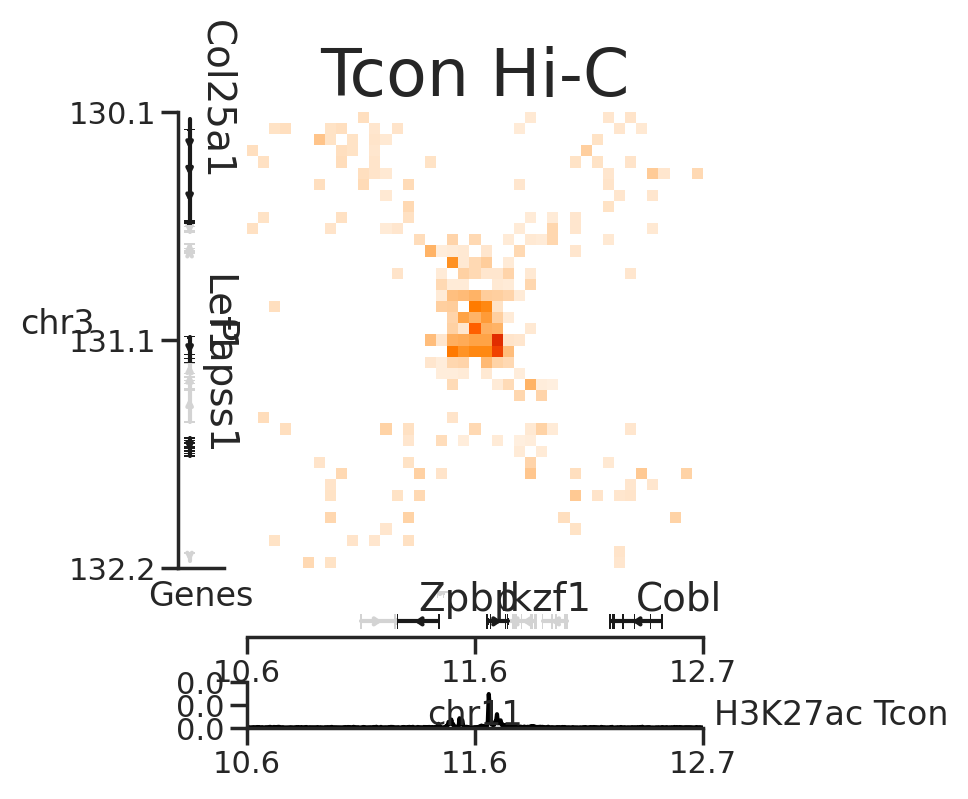

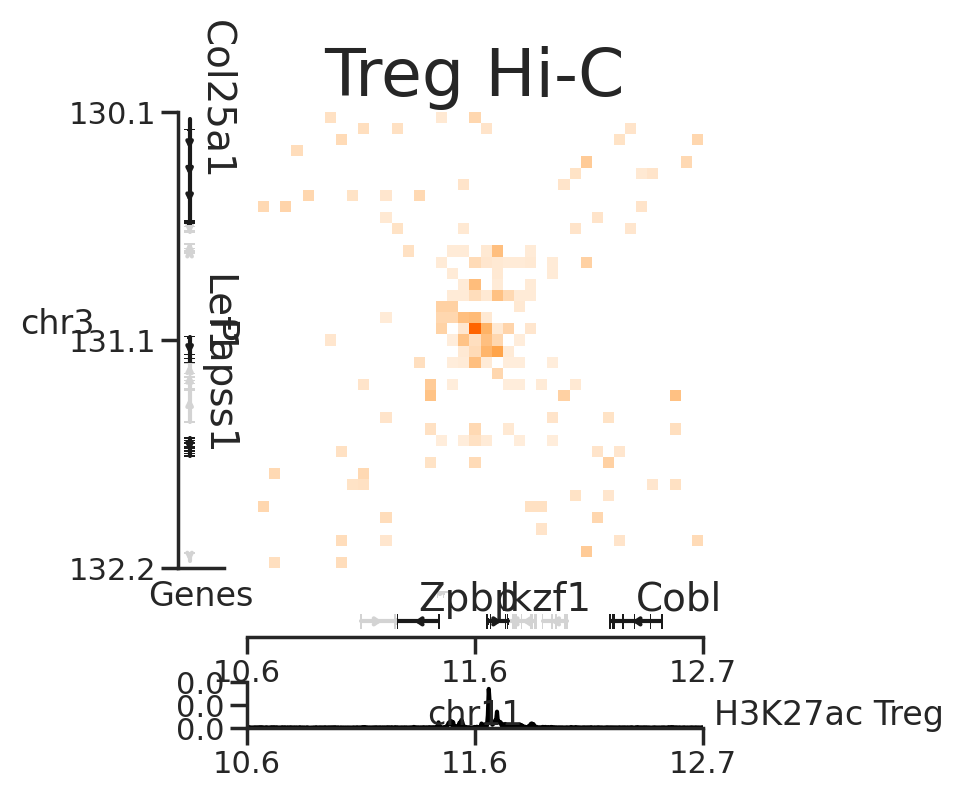

In [63]:
make_figure_s10a()

### Make Figure 1I

nan
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
orphan transcript transcript:ENSMUST00000185352 with missing parent gene:ENSMUSG00000102059!
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
orphan transcript transcript:ENSMUST00000186588 with missing parent gene:ENSMUSG00000101838!
orphan transcript transcript:ENSMUST00000185352 with missing parent gene:ENSMUSG00000102059!
0.0020226436712636933
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
orphan transcript transcript:ENSMUST00000185352 with missing parent gene:ENSMUSG00000102059!
0.0020226436712636933
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/

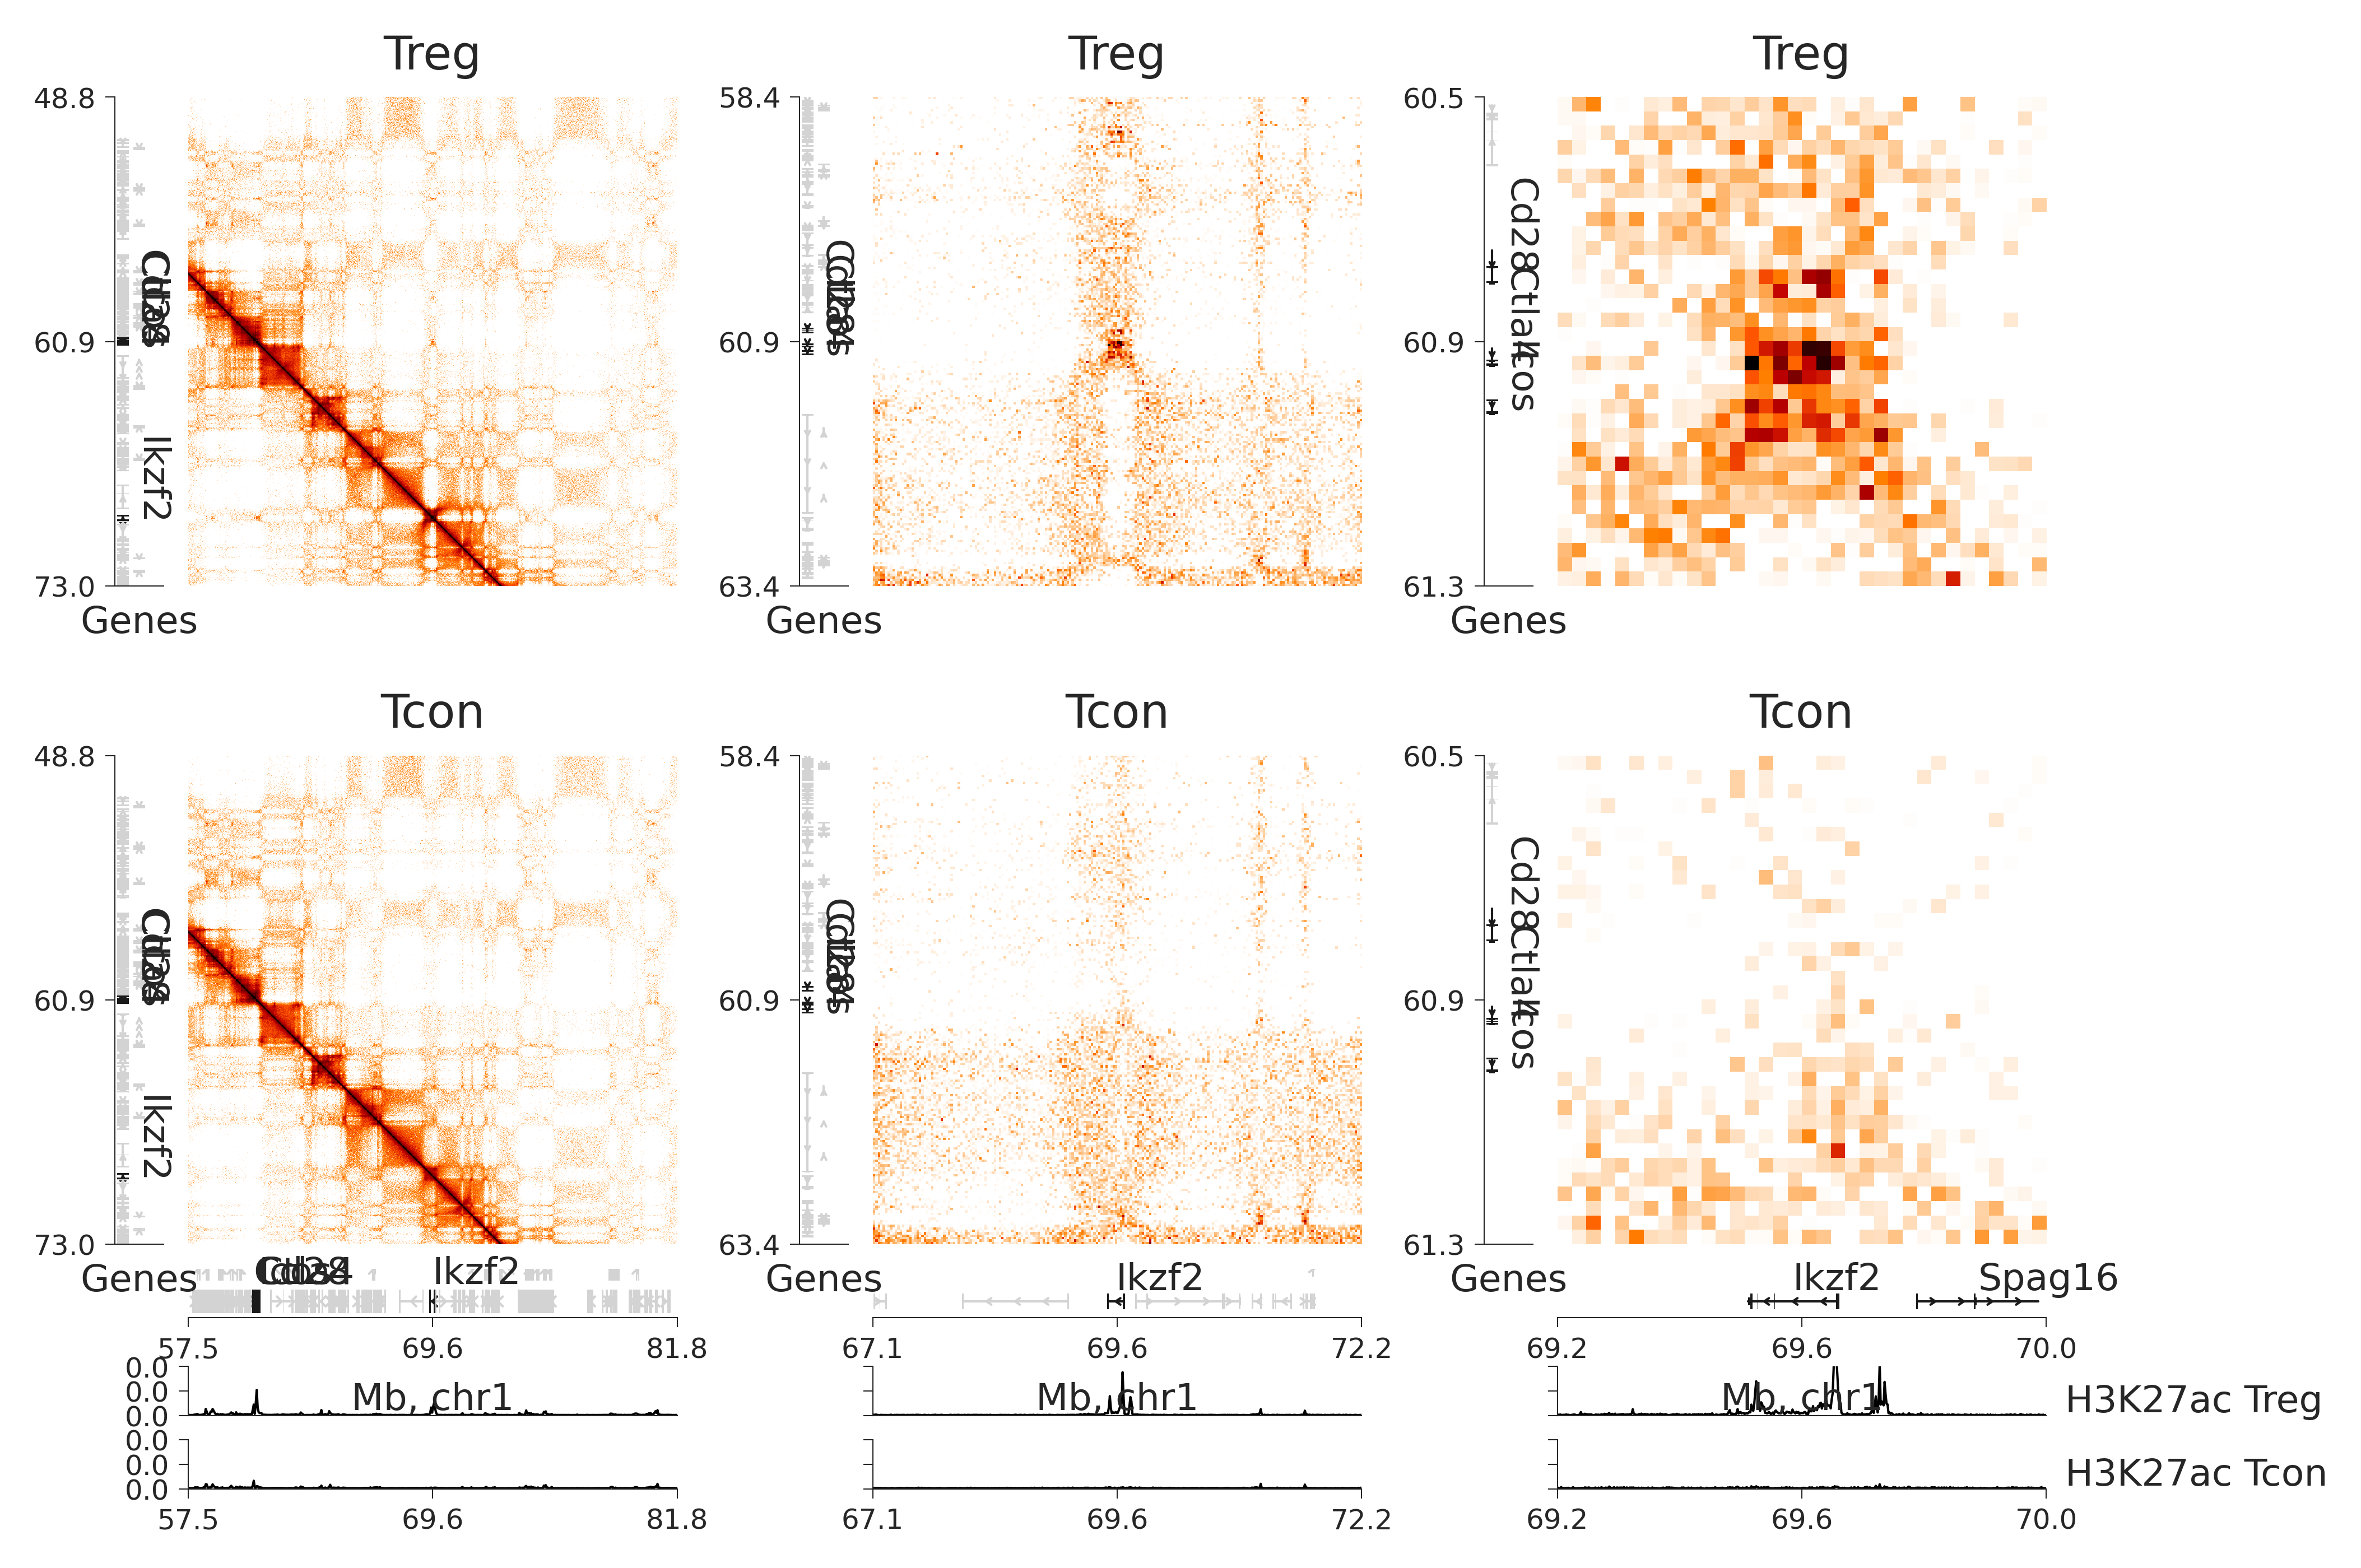

In [31]:
fig = make_figure_1i()
fig.savefig('./plots/paper/fig1/scoping_figure.pdf', dpi=300, bbox_inches='tight')

#### Make Figure 1J

0.0009172567988550921
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.002000247604114108
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf


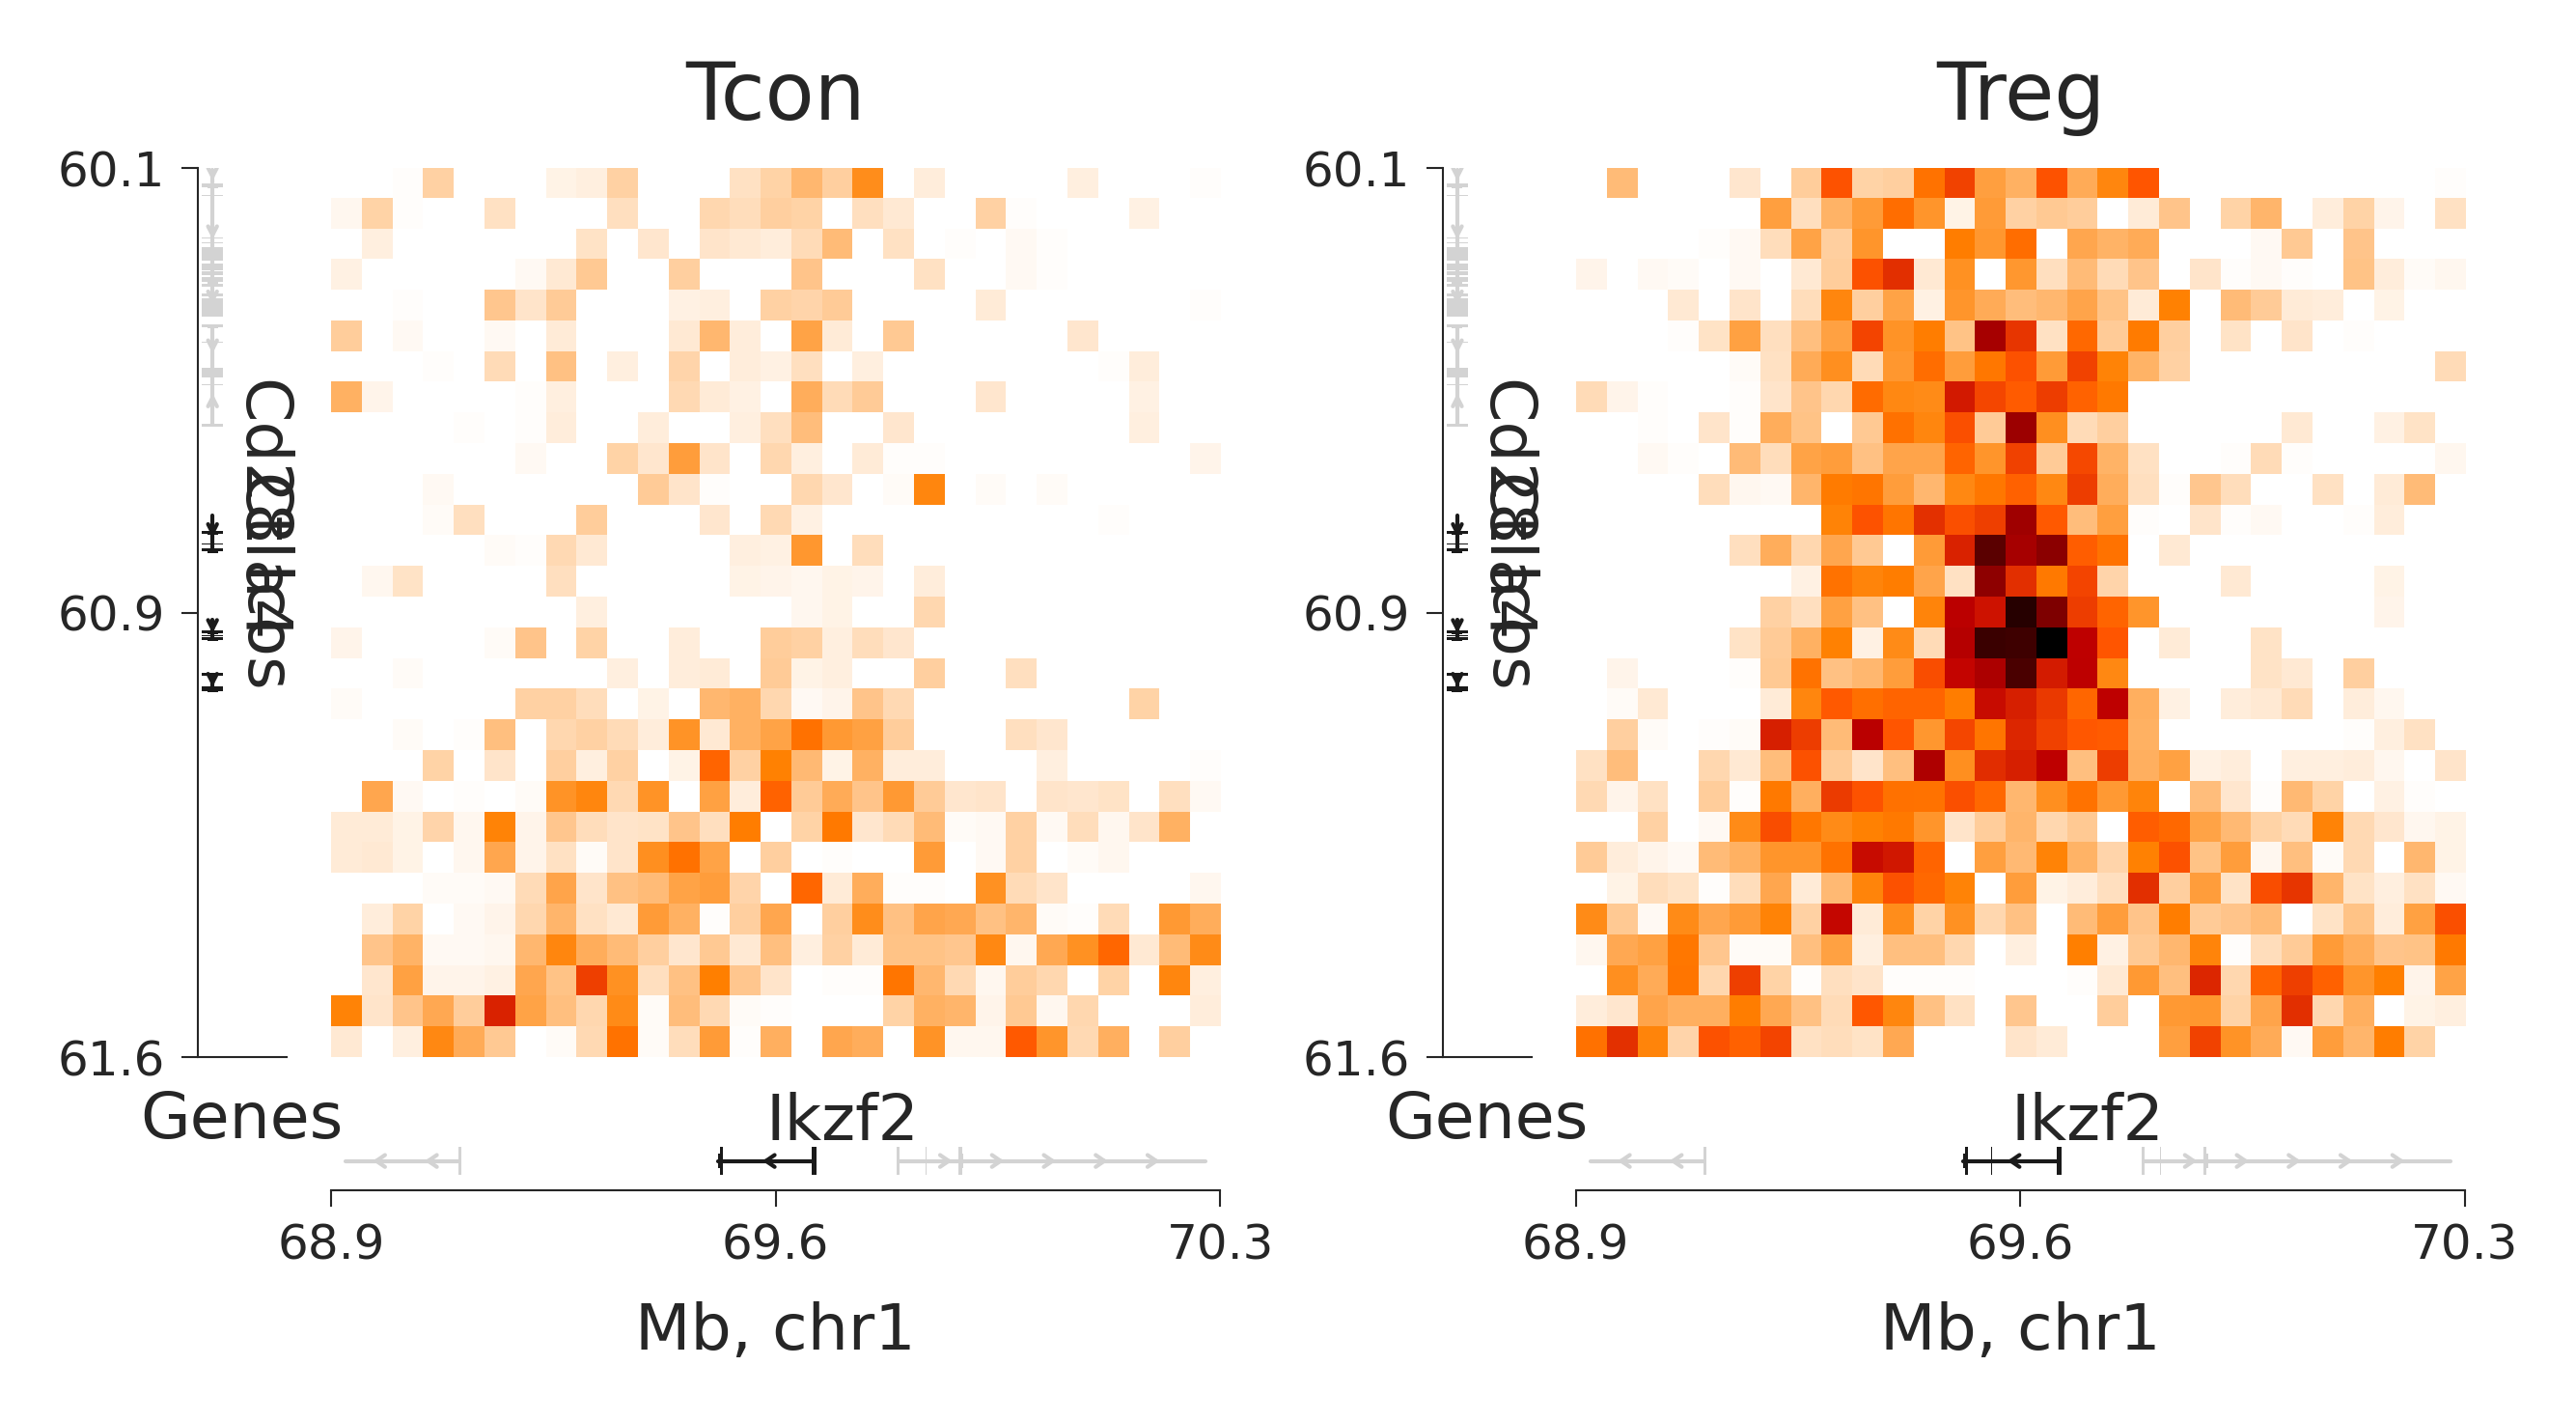

In [20]:
make_figure_1j()

### Make Figure 1K

0.0014827602471258318
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Homo_sapiens.GRCh38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Homo_sapiens.GRCh38.93.chr.gff3.gz.bgzf
0.0022401070741142957
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Homo_sapiens.GRCh38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Homo_sapiens.GRCh38.93.chr.gff3.gz.bgzf


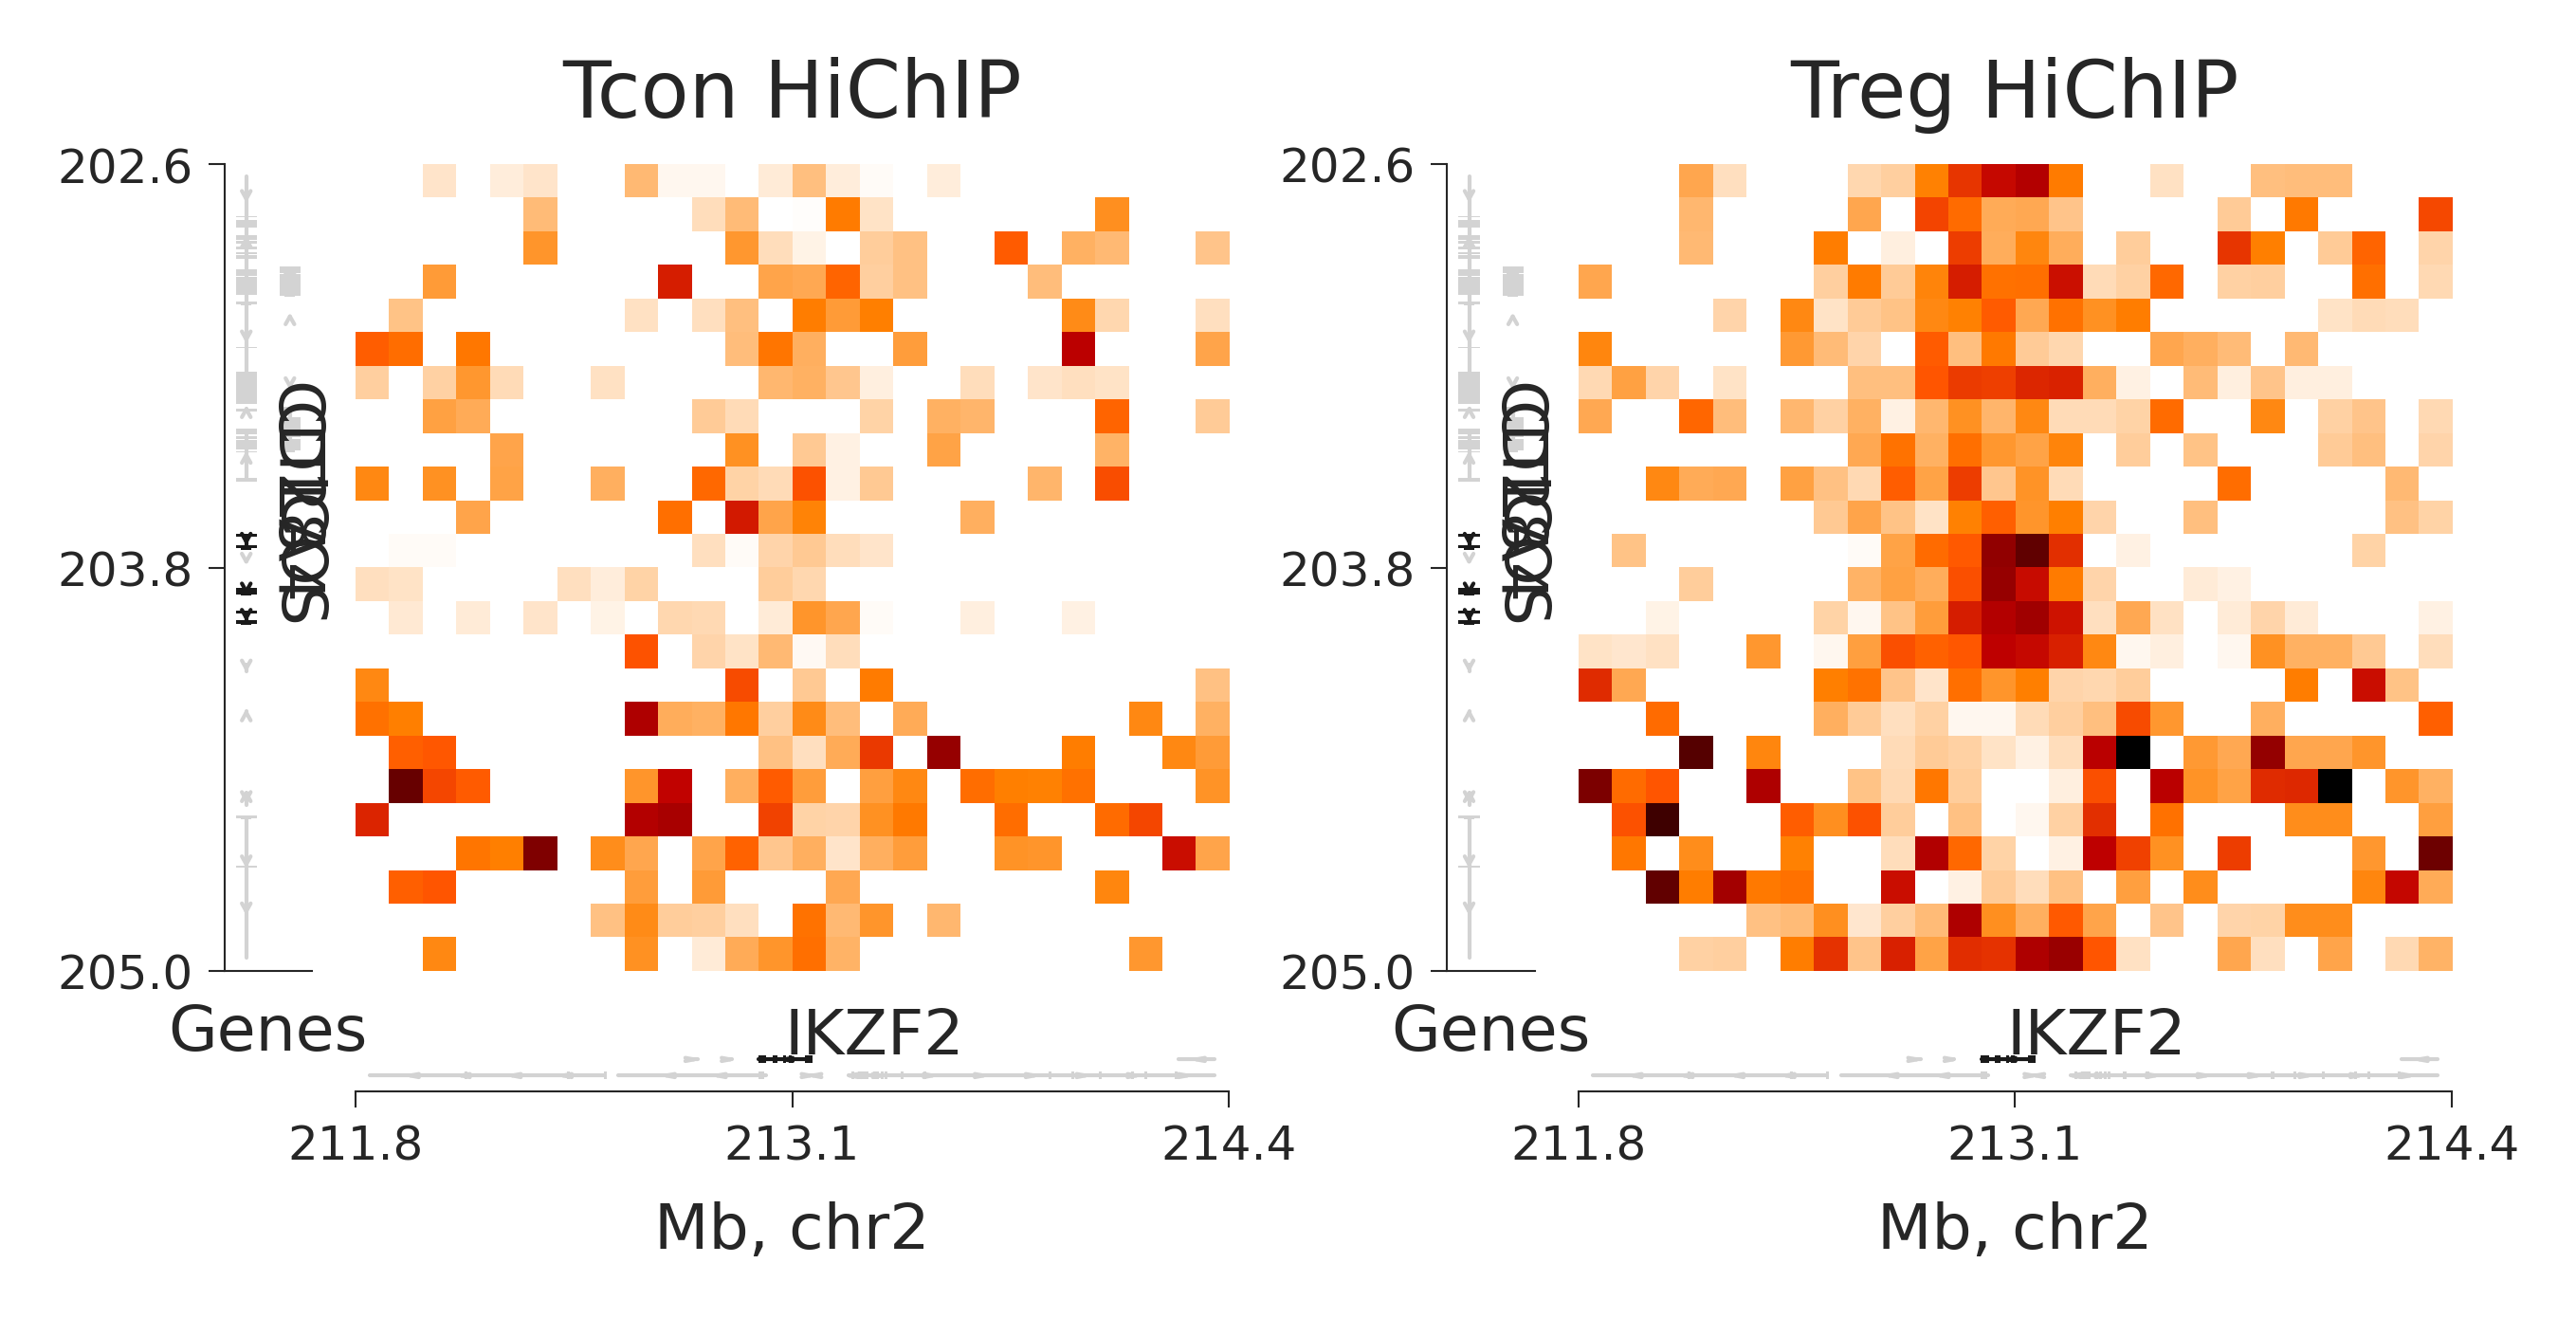

In [47]:
ax = make_figure_1k()

### Figure S6B-G

0.0008918559275964647
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
orphan transcript transcript:ENSMUST00000159347 with missing parent gene:ENSMUSG00000090126!
HI
0.0016079057861294924
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
orphan transcript transcript:ENSMUST00000159347 with missing parent gene:ENSMUSG00000090126!
HI
0.0021614481287540966
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/gencode.vM23.basic.annotation.gff3.nochr.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/gencode.vM23.basic.annotation.gff3.nochr.gz.bgzf
HI
0.001276692860666677
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrows

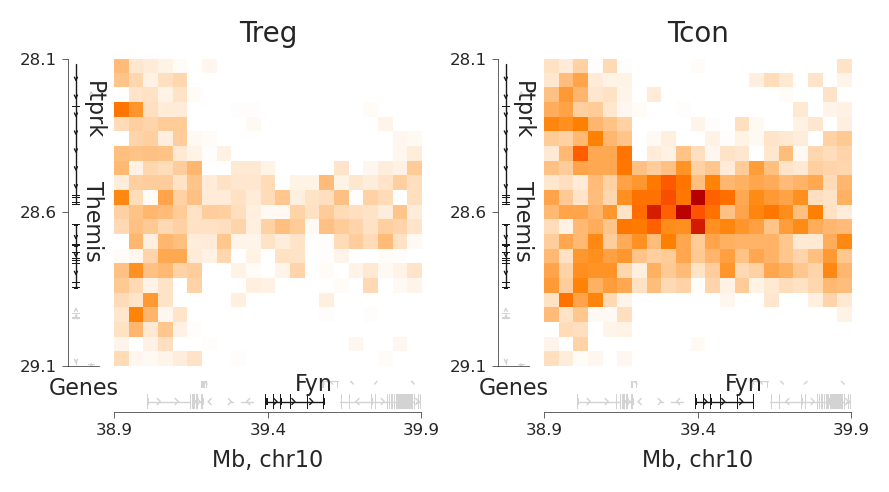

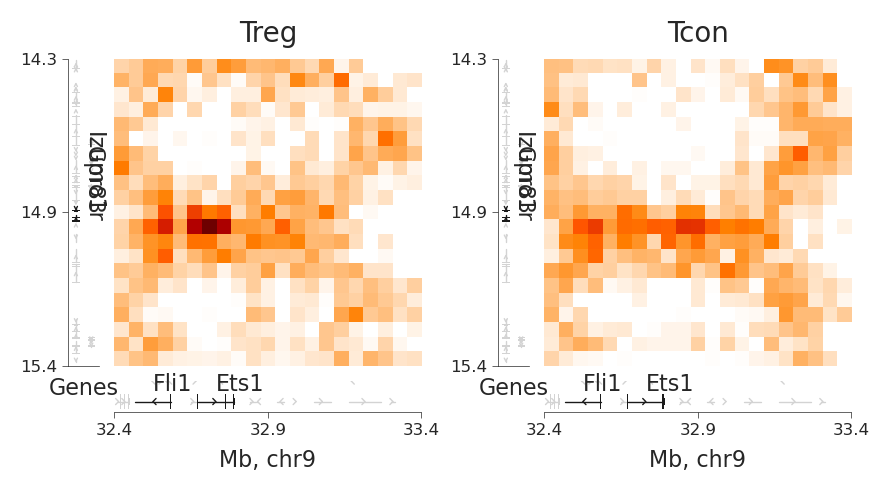

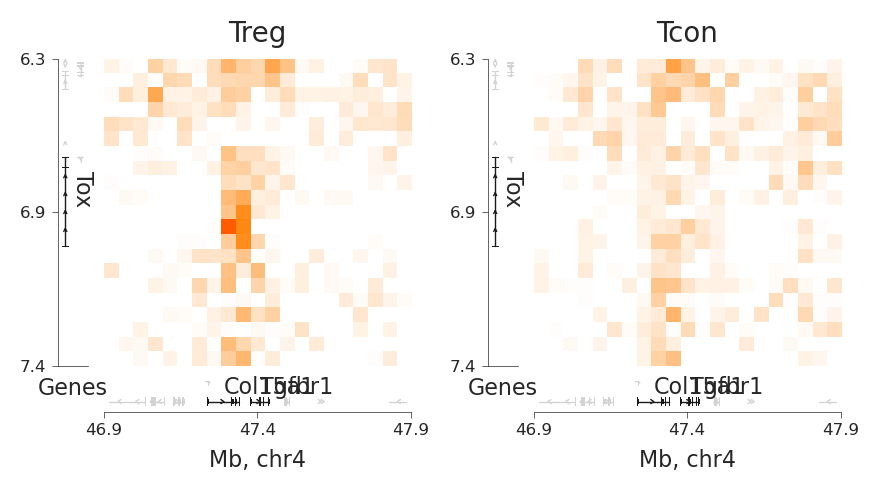

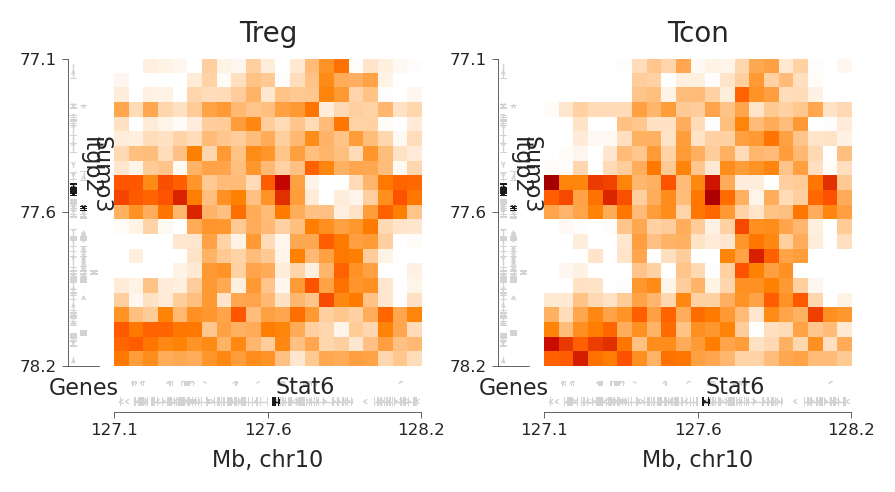

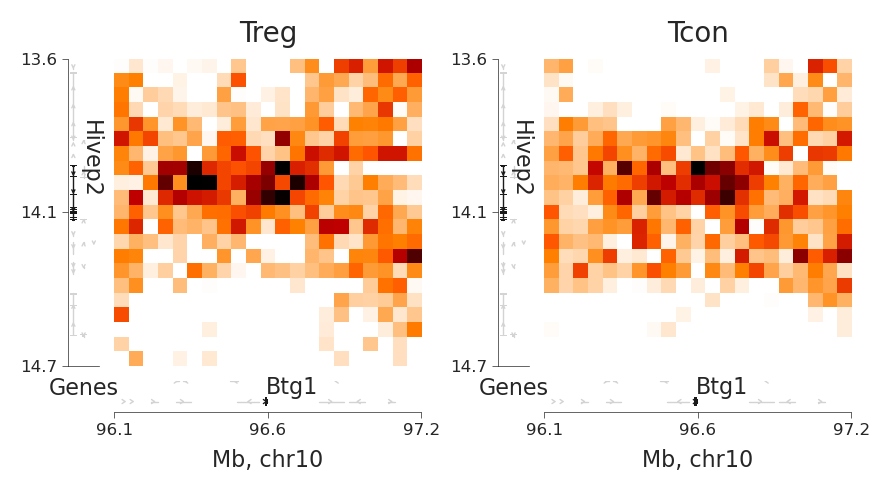

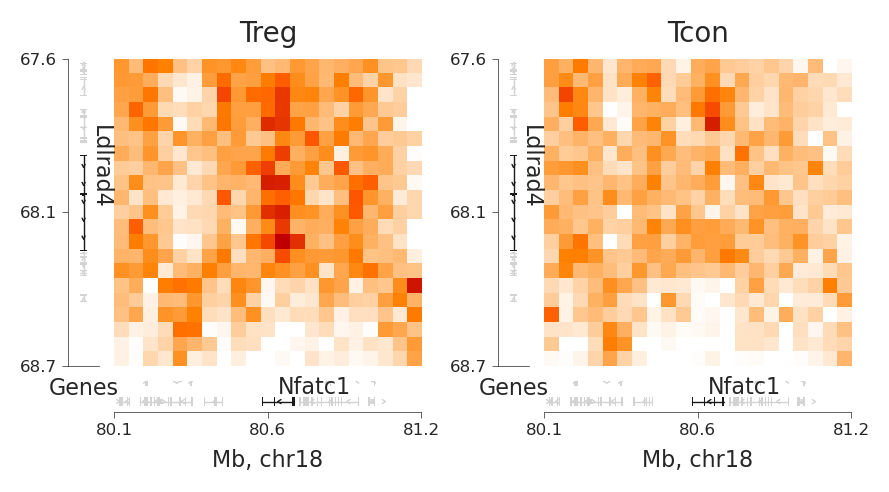

In [33]:
make_figure_s6b_g()

### Make figure s10a

0
0.0004890572865363284
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
[44090000 44515000 44940000]
1
0.0003501880942463617
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
[44090000 44515000 44940000]
0
0.00011528710012880155
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
orphan transcript transcript:ENSMUST00000050581 with missing parent gene:ENSMUSG00000055676!
[100840000 101265000 101690000]
1
0.00019824600681202632
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm

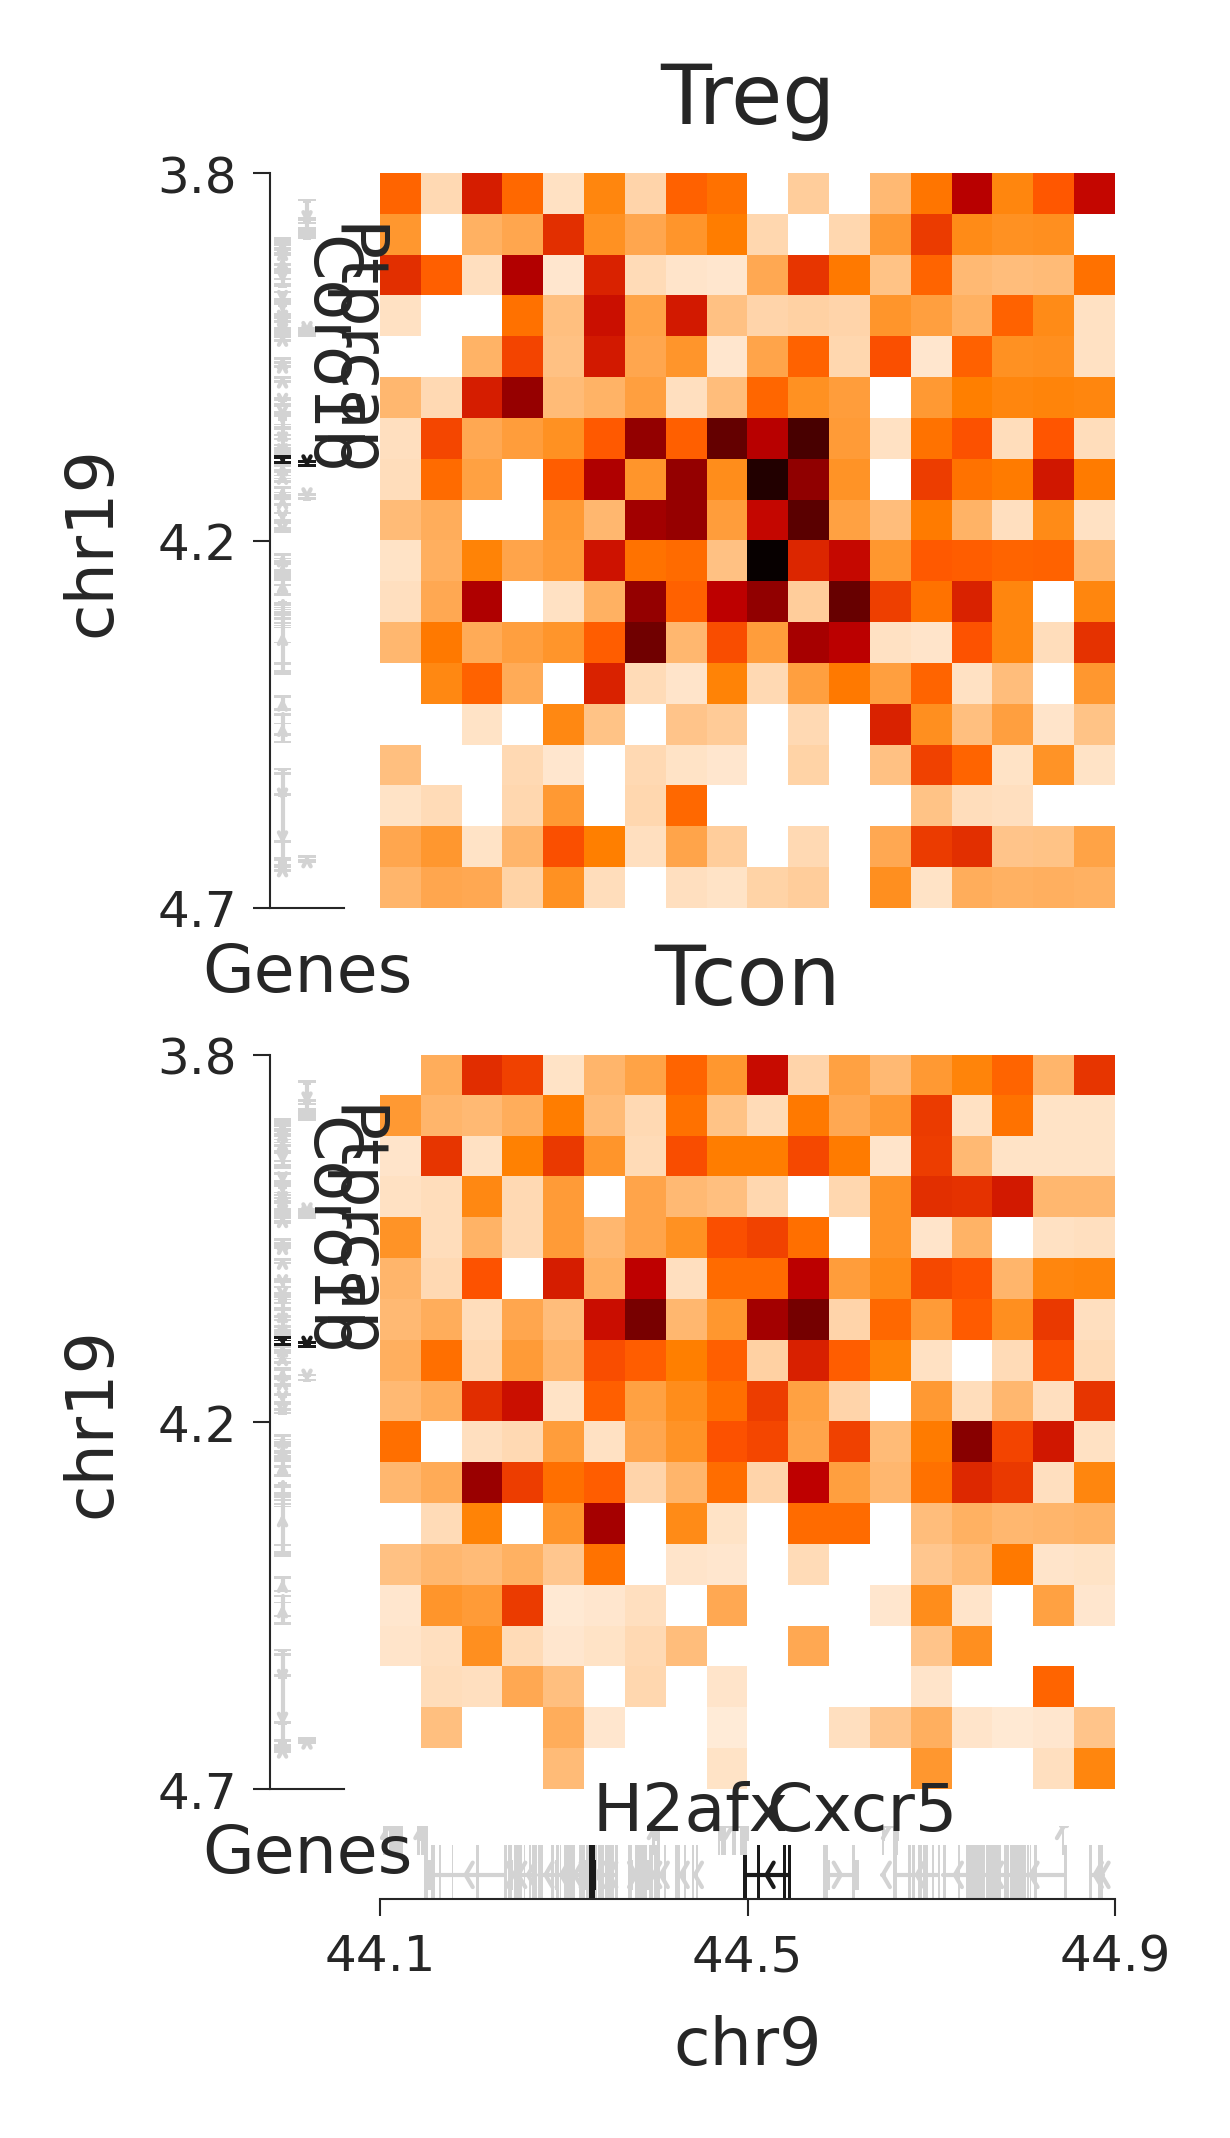

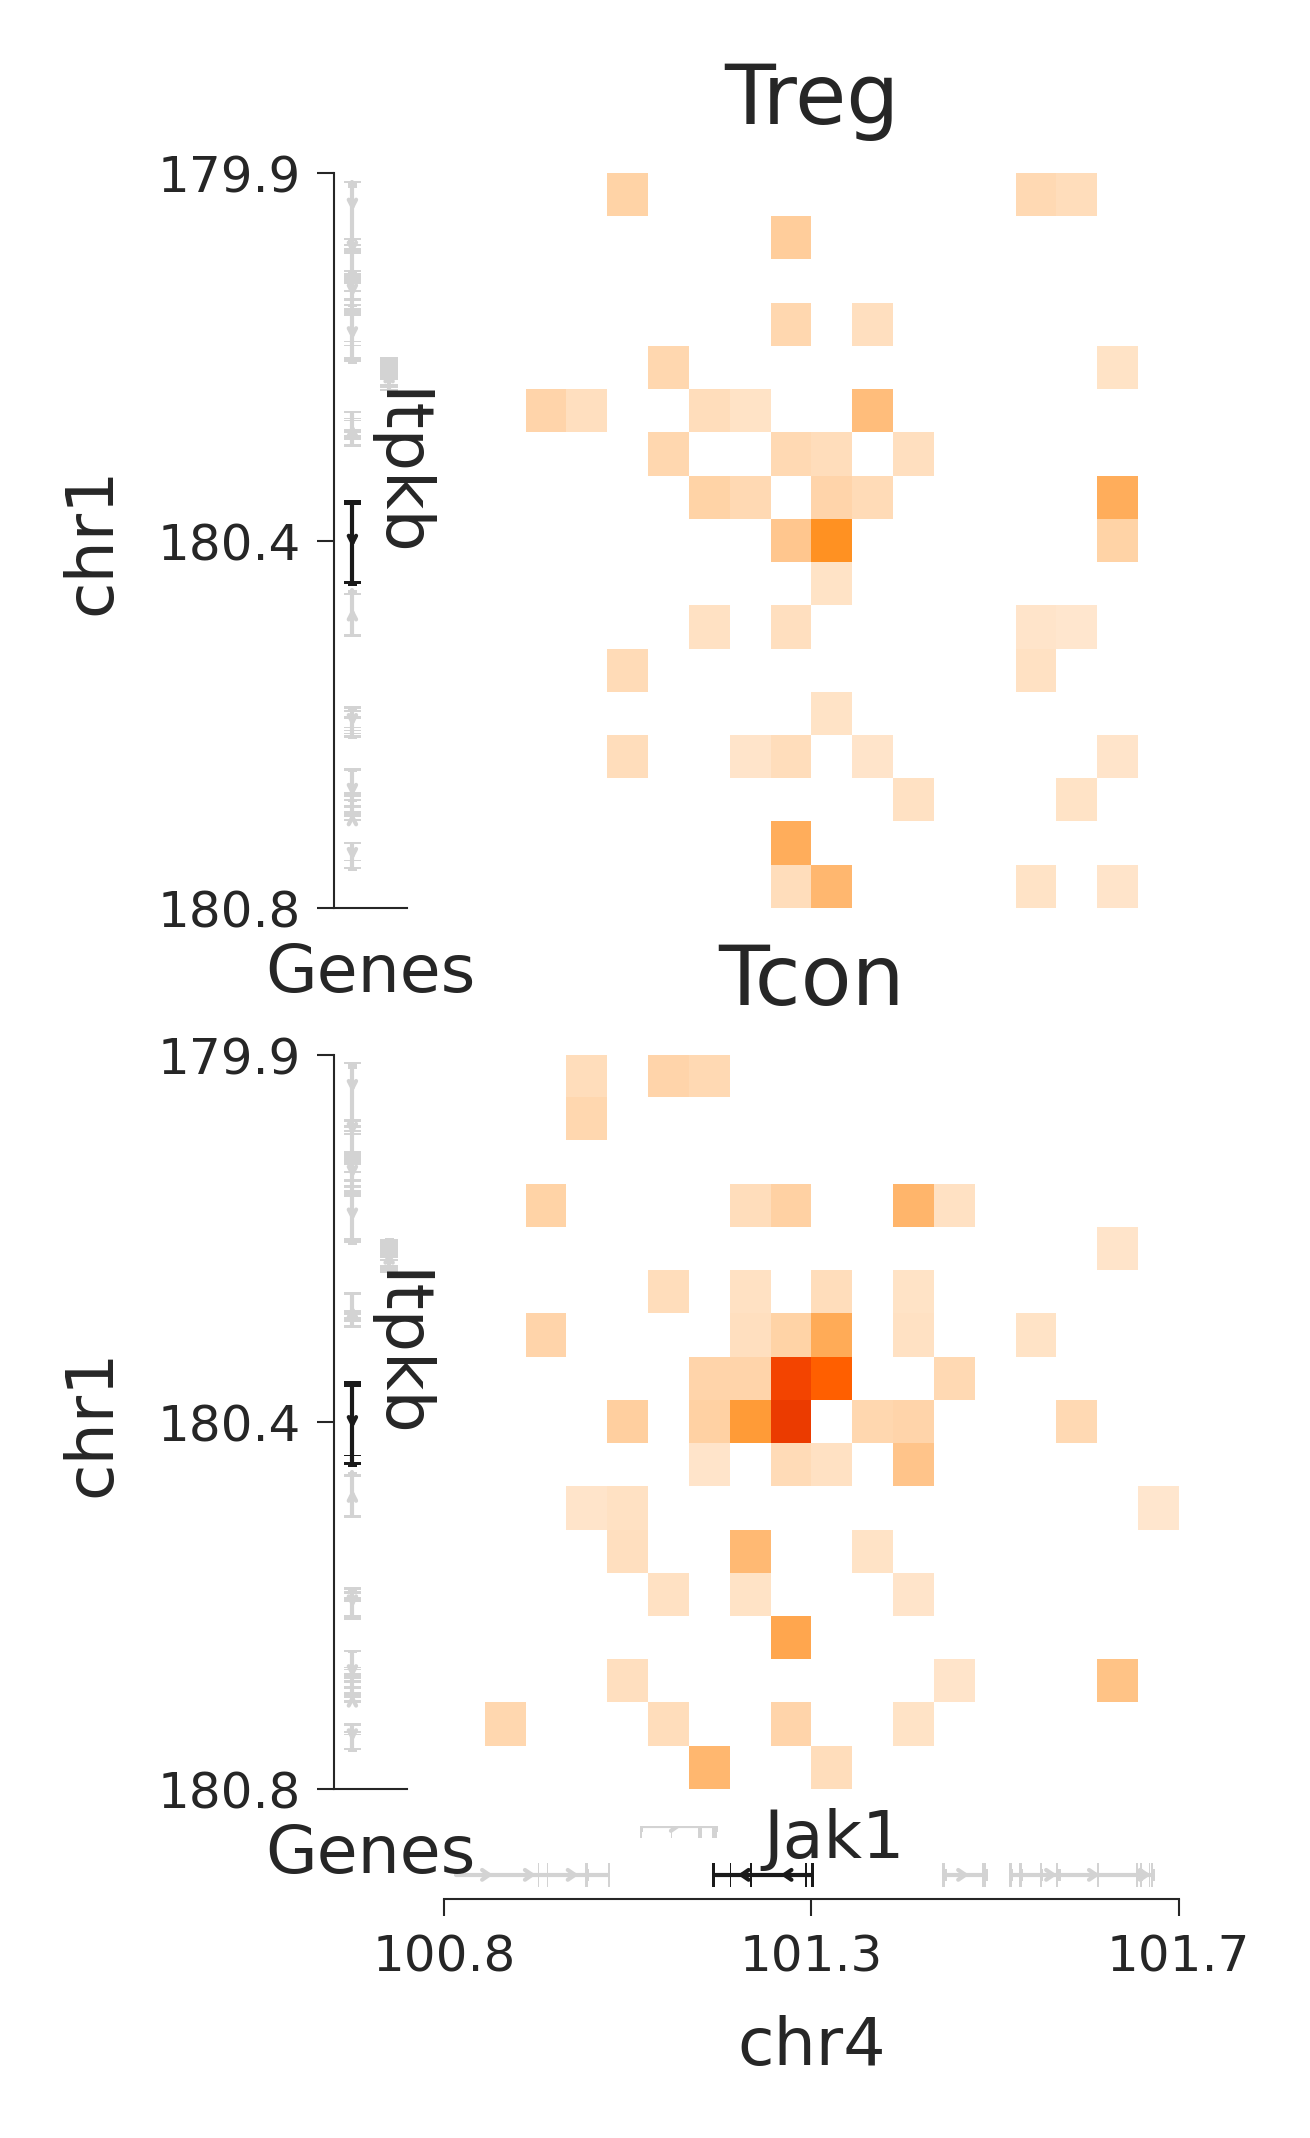

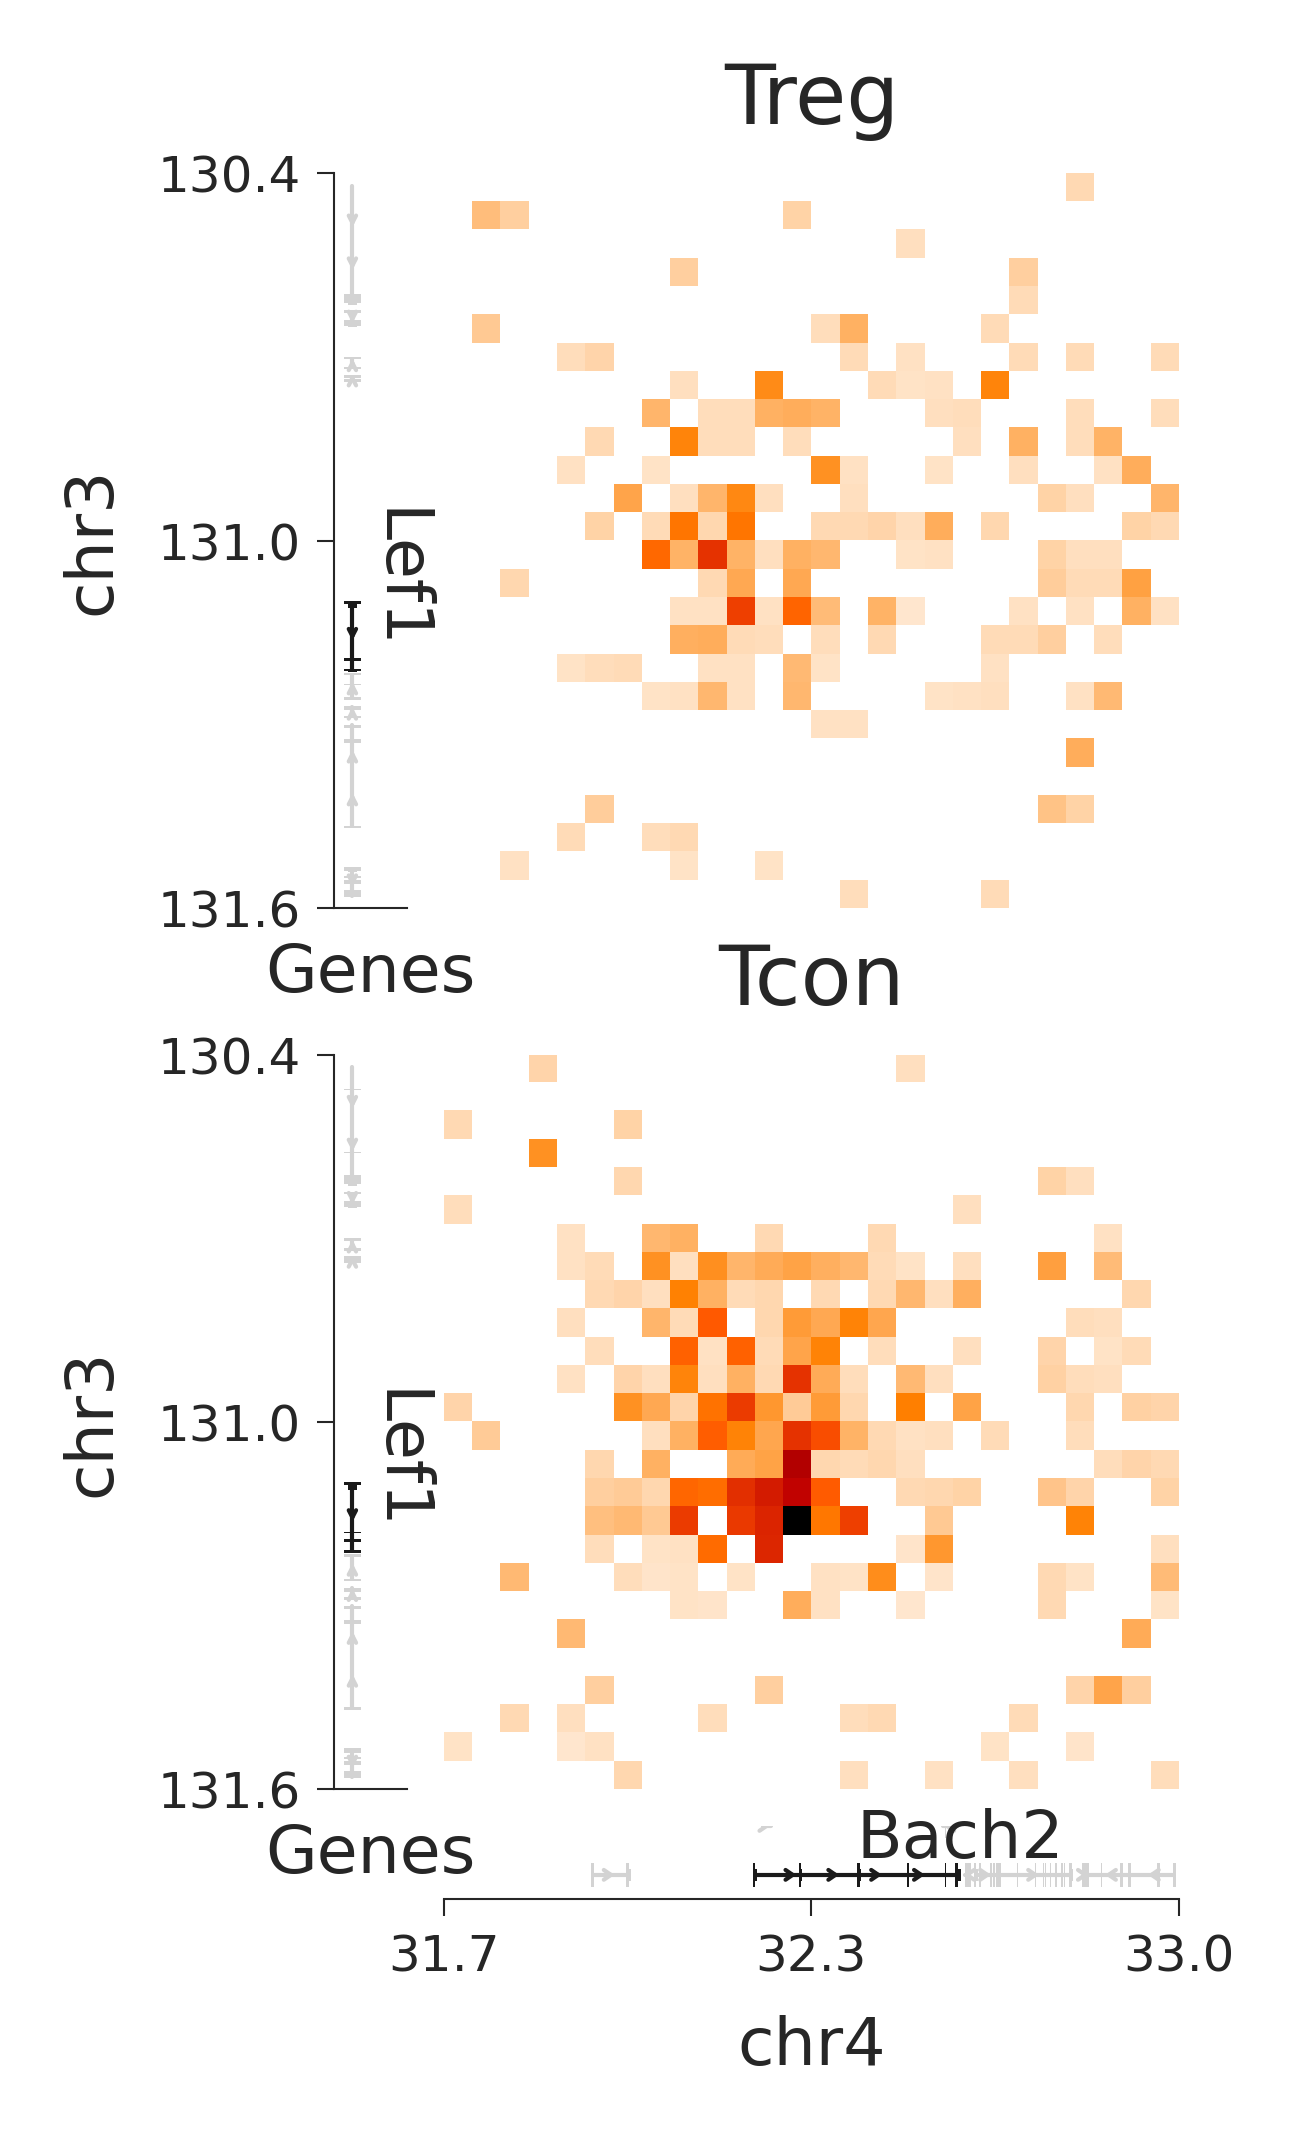

In [45]:
make_figure_s10a()

### Make Figure 2D

nan
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.00135344373236129
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.0005871540357035634
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.0008512029758782162
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.07967067260461586
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrows

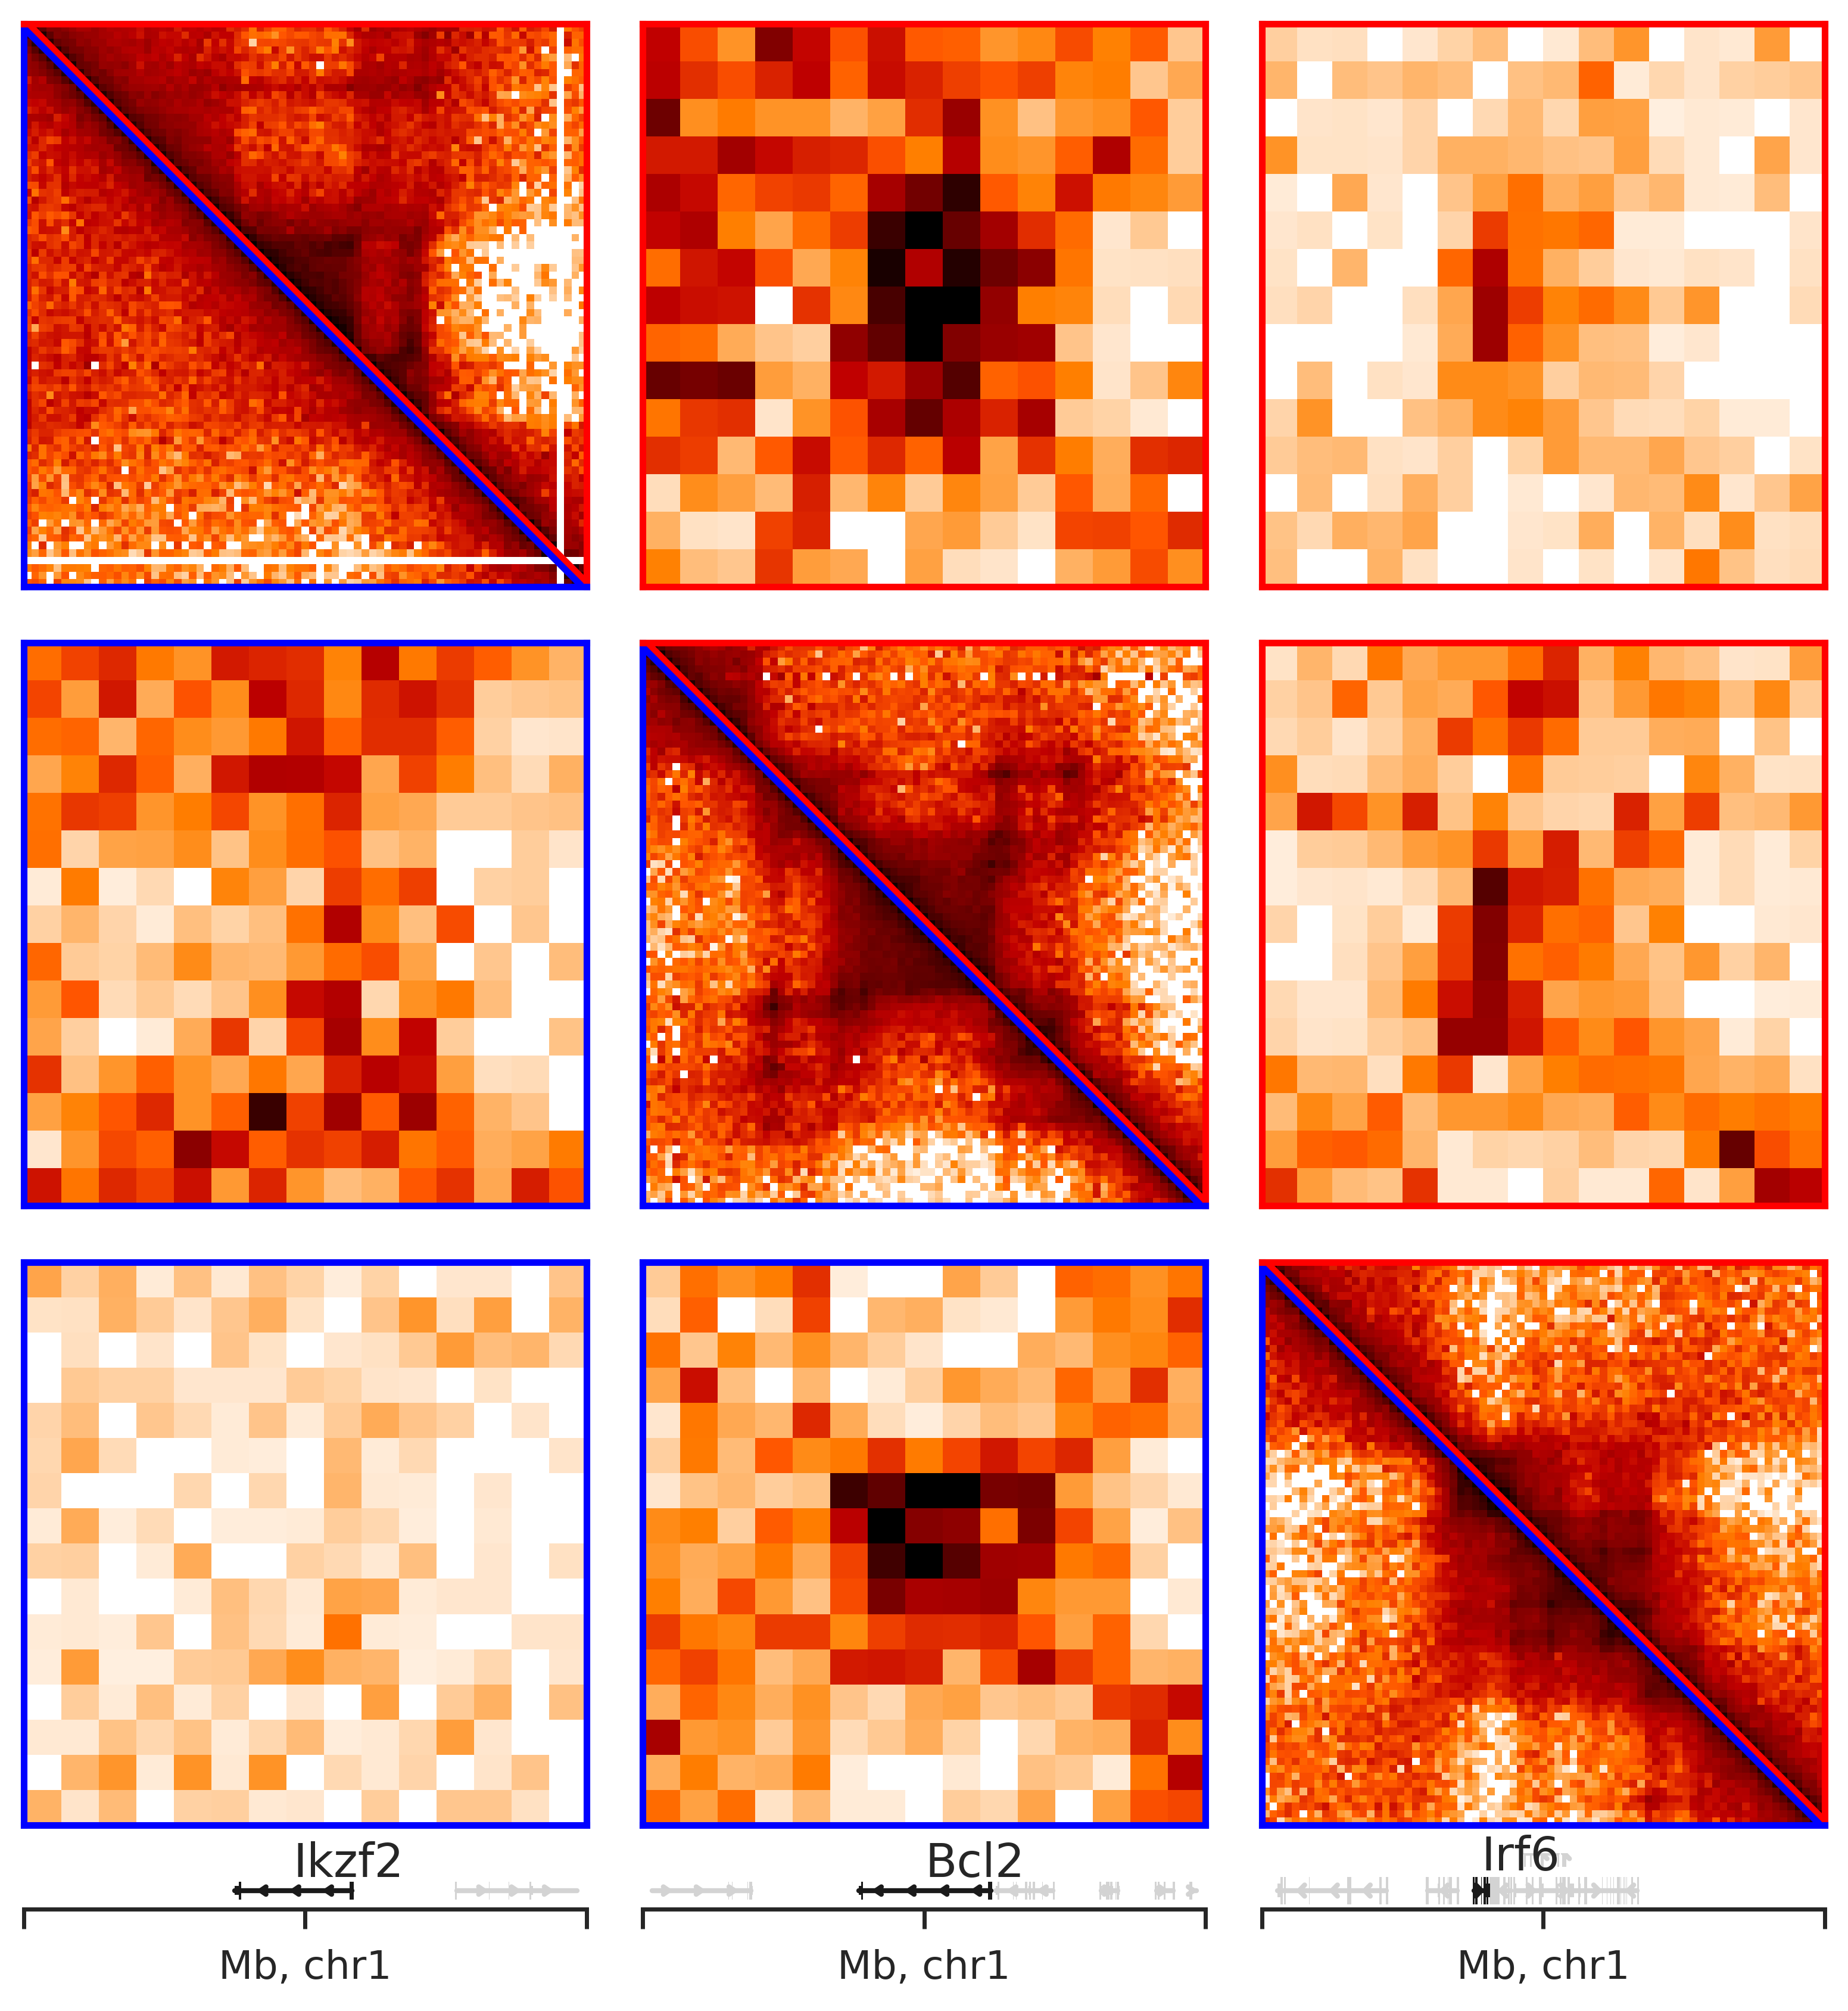

In [98]:
make_figure_2d()

### Make 2G

0.1064730399785226
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.0012651248836895467
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.0010466713803207119
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.0010940832637644016
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.0008466074902346507
file: /Genomics/argo/users/gdolsten/pritlab/j

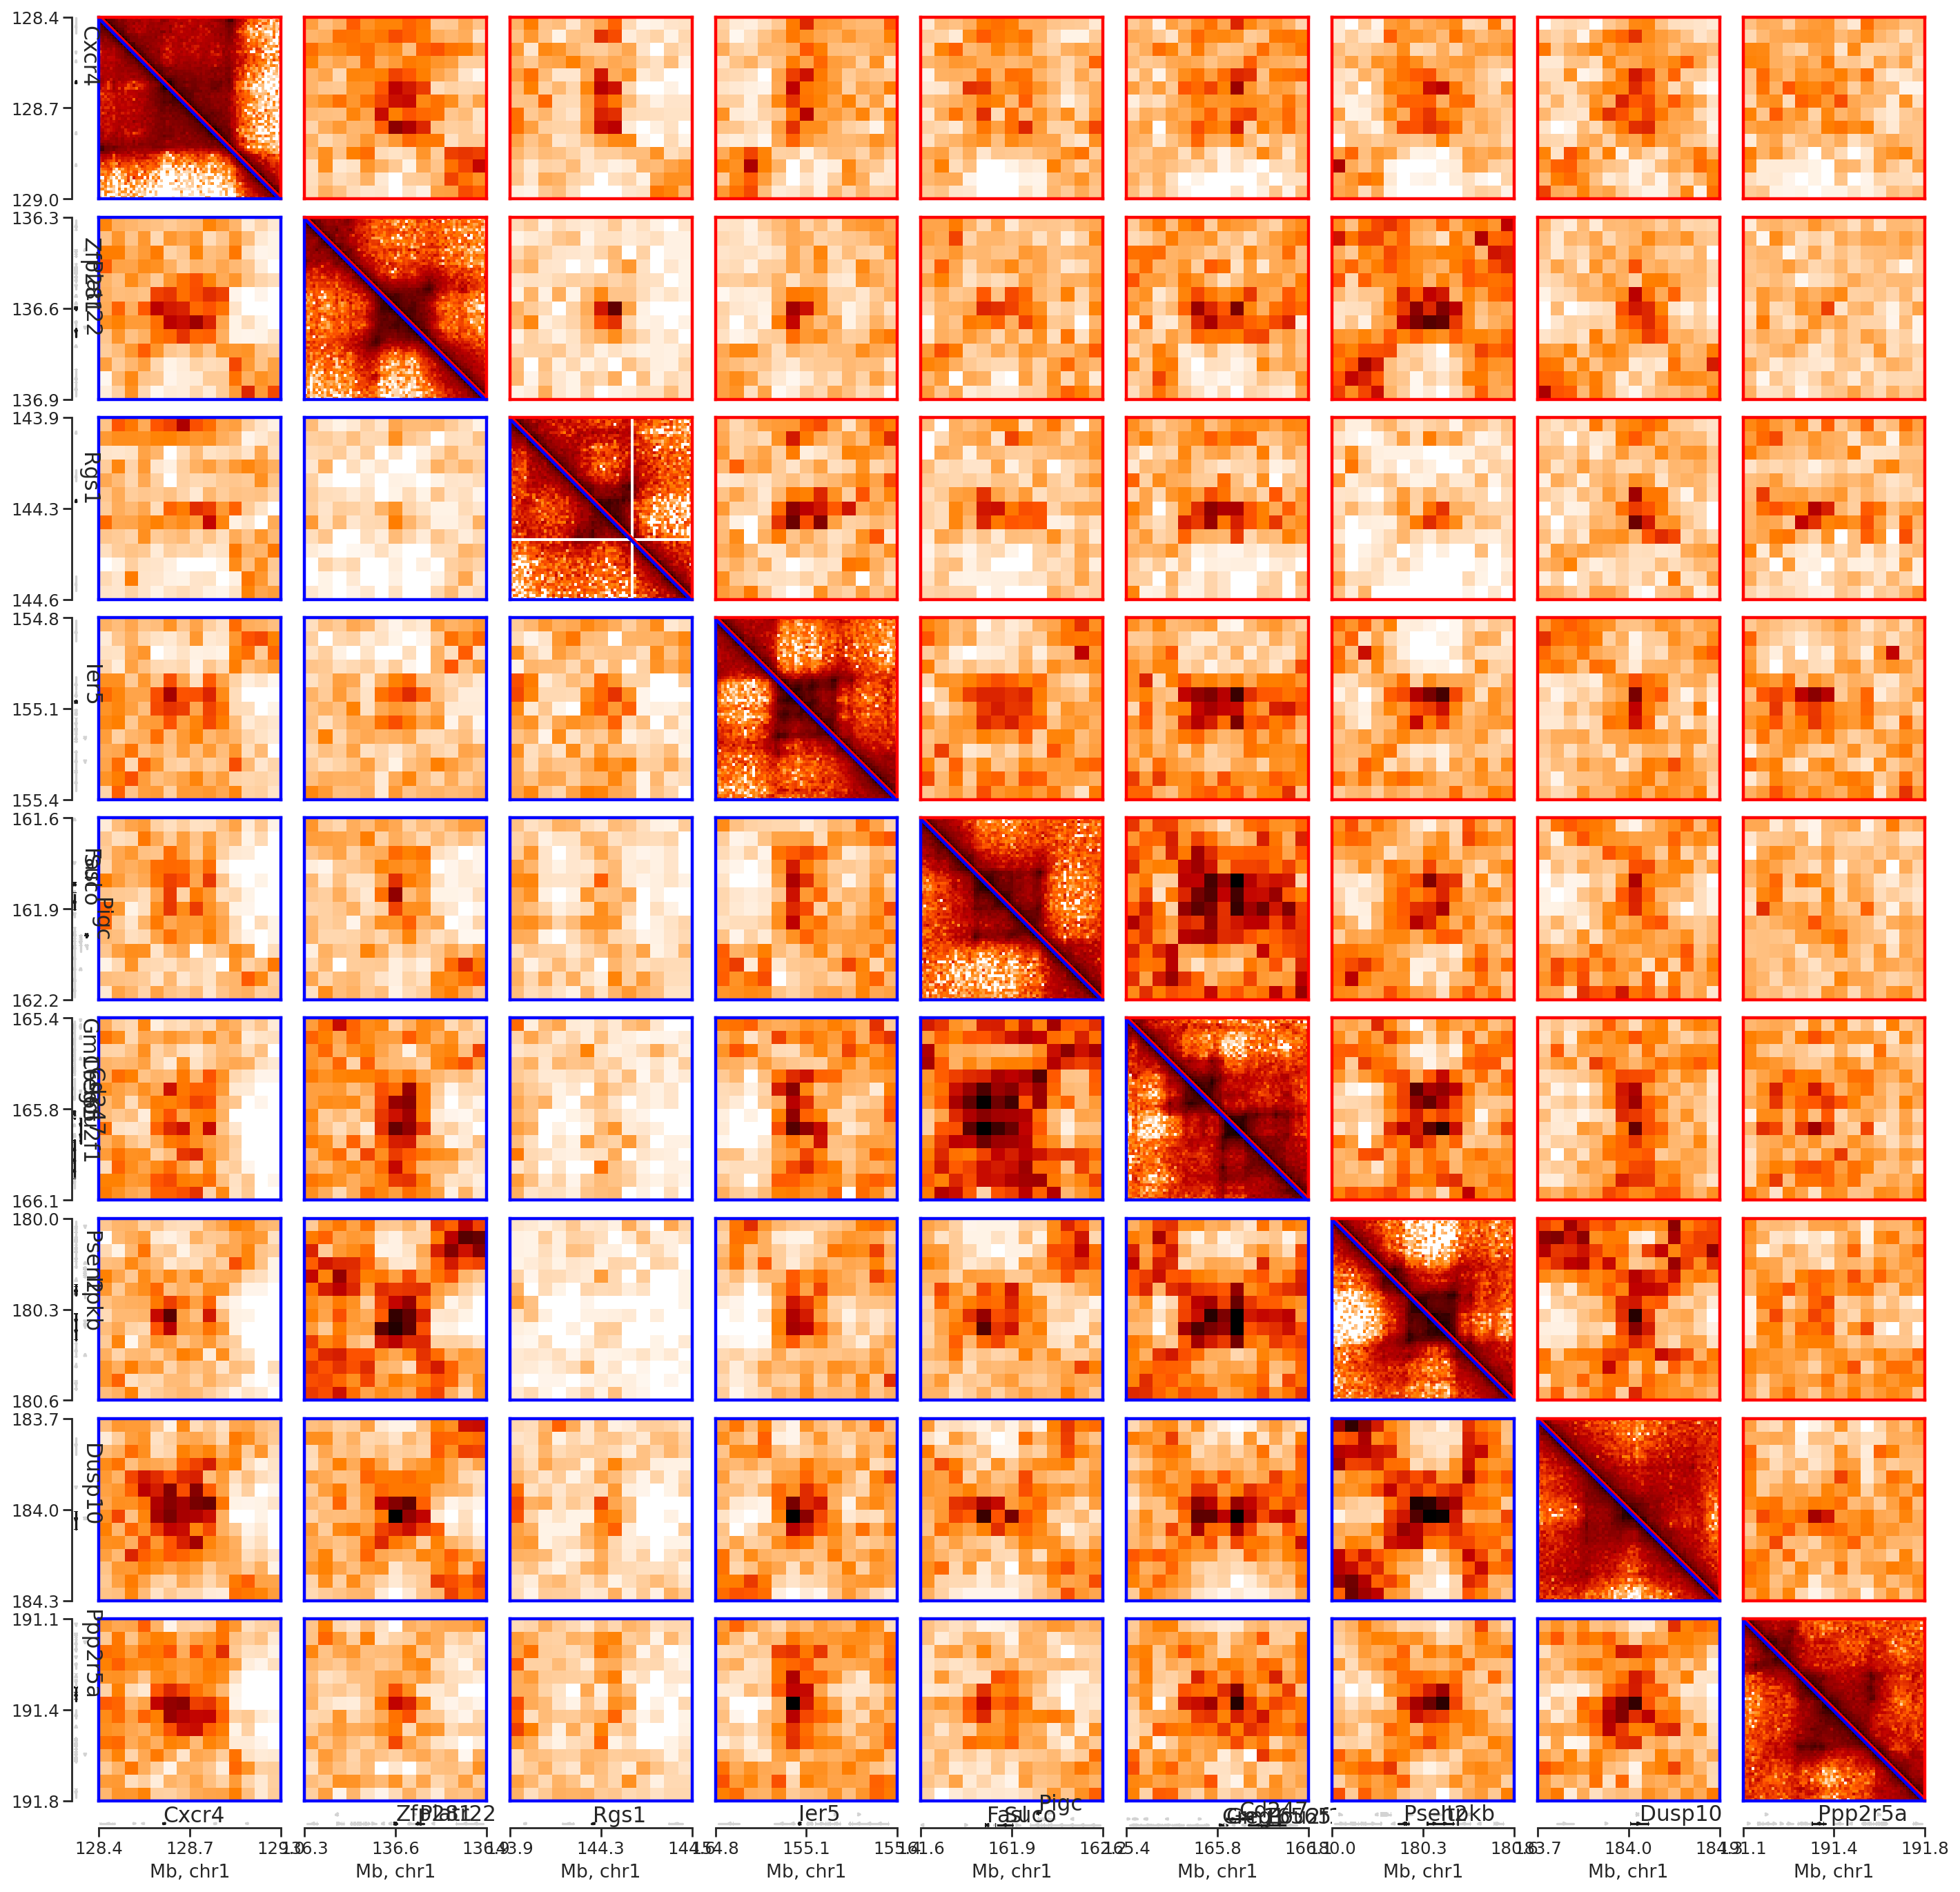

In [57]:
make_figure_2g()

#### Make Figure 3B

0
0.00041575364439058553
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
[69000000 69625000 70250000]
1
8.580404989184671e-05
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
[69000000 69625000 70250000]


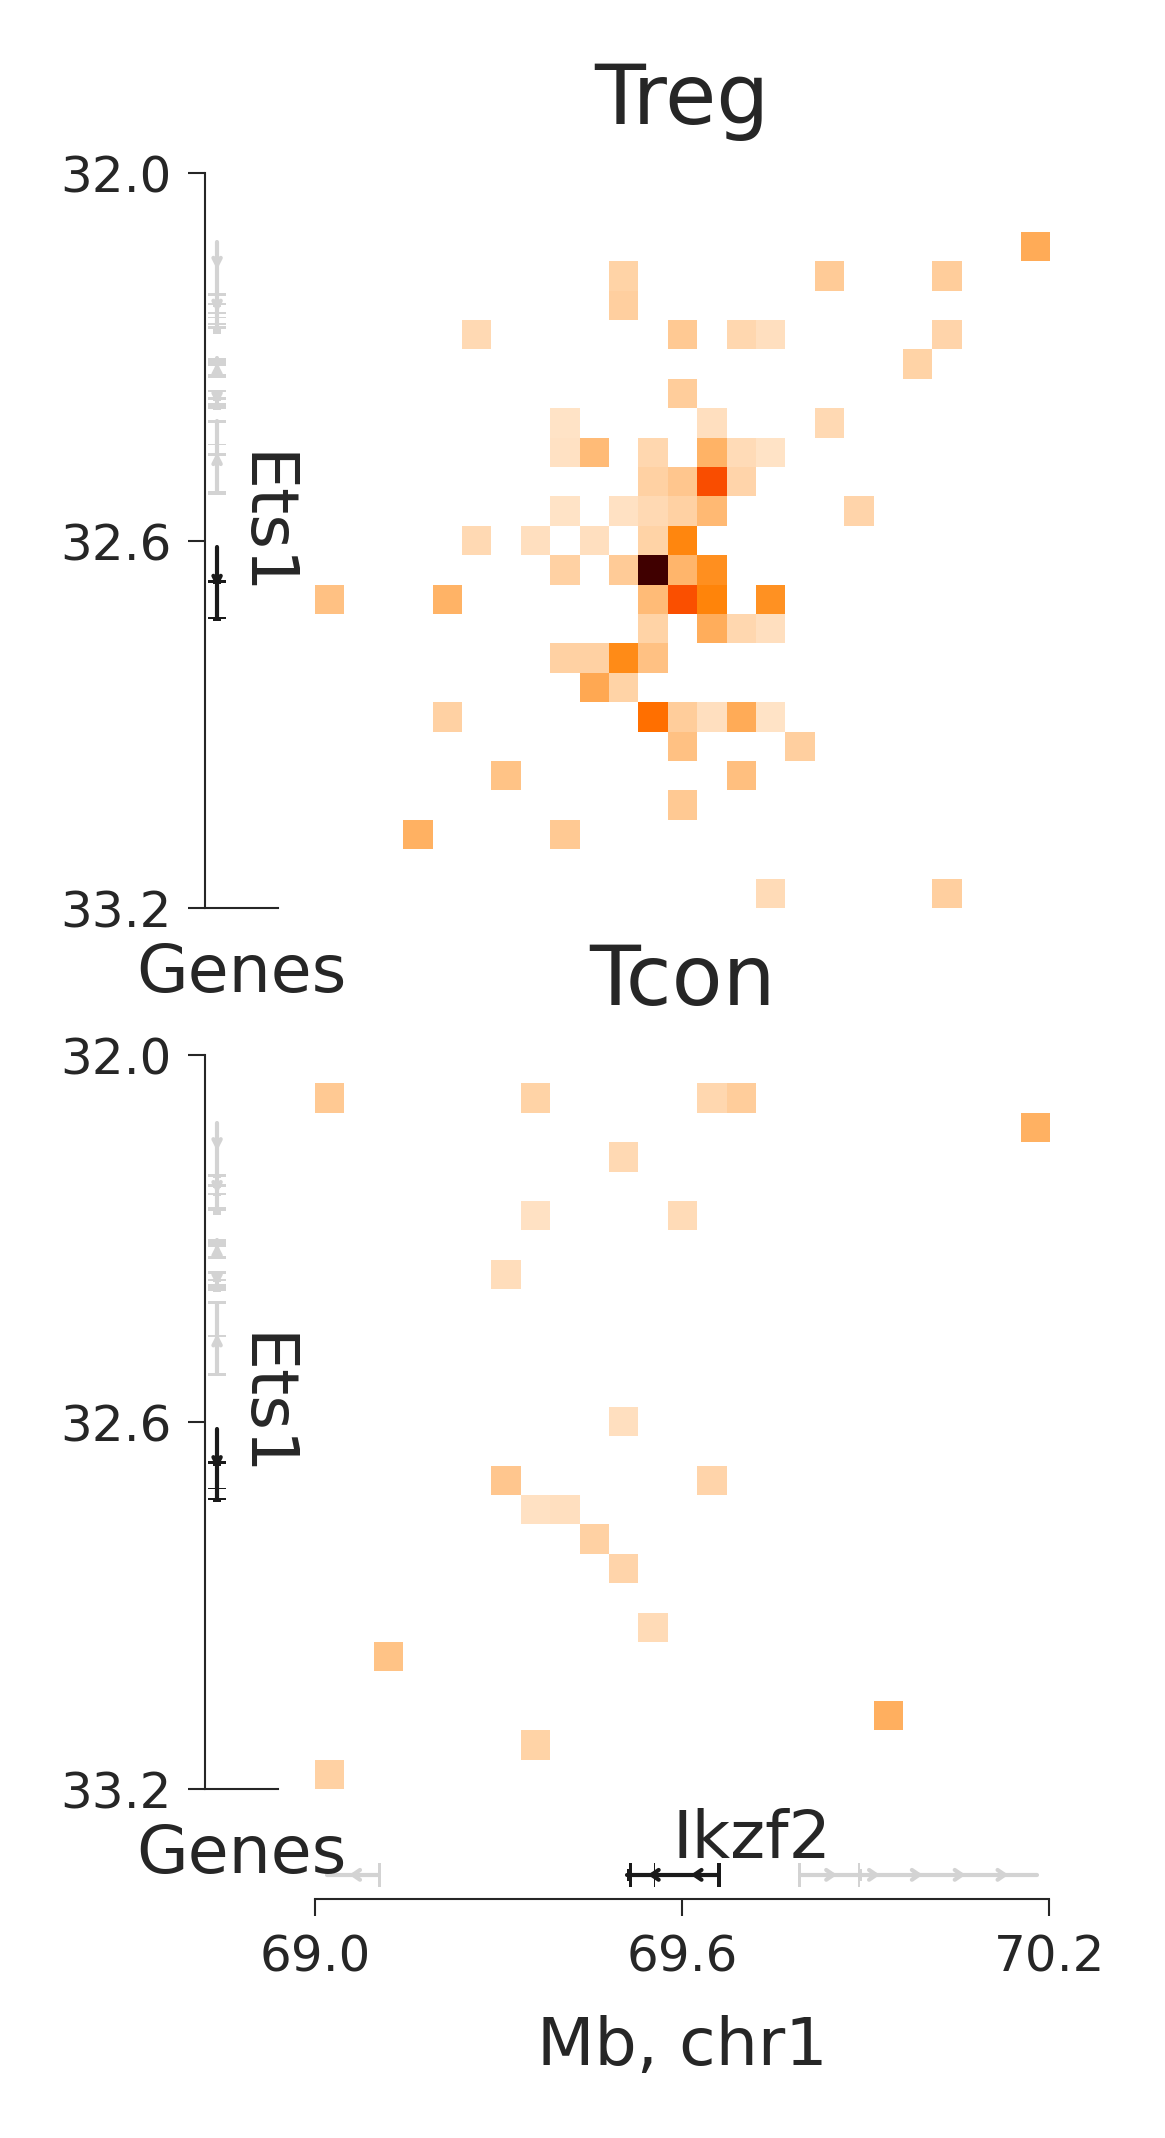

In [50]:
make_figure_3b()

### Make Figure 3F

nan
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.0001797181337545076
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.000192894194772201
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.0001846838790537973
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
0.00012861041232407612
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygb

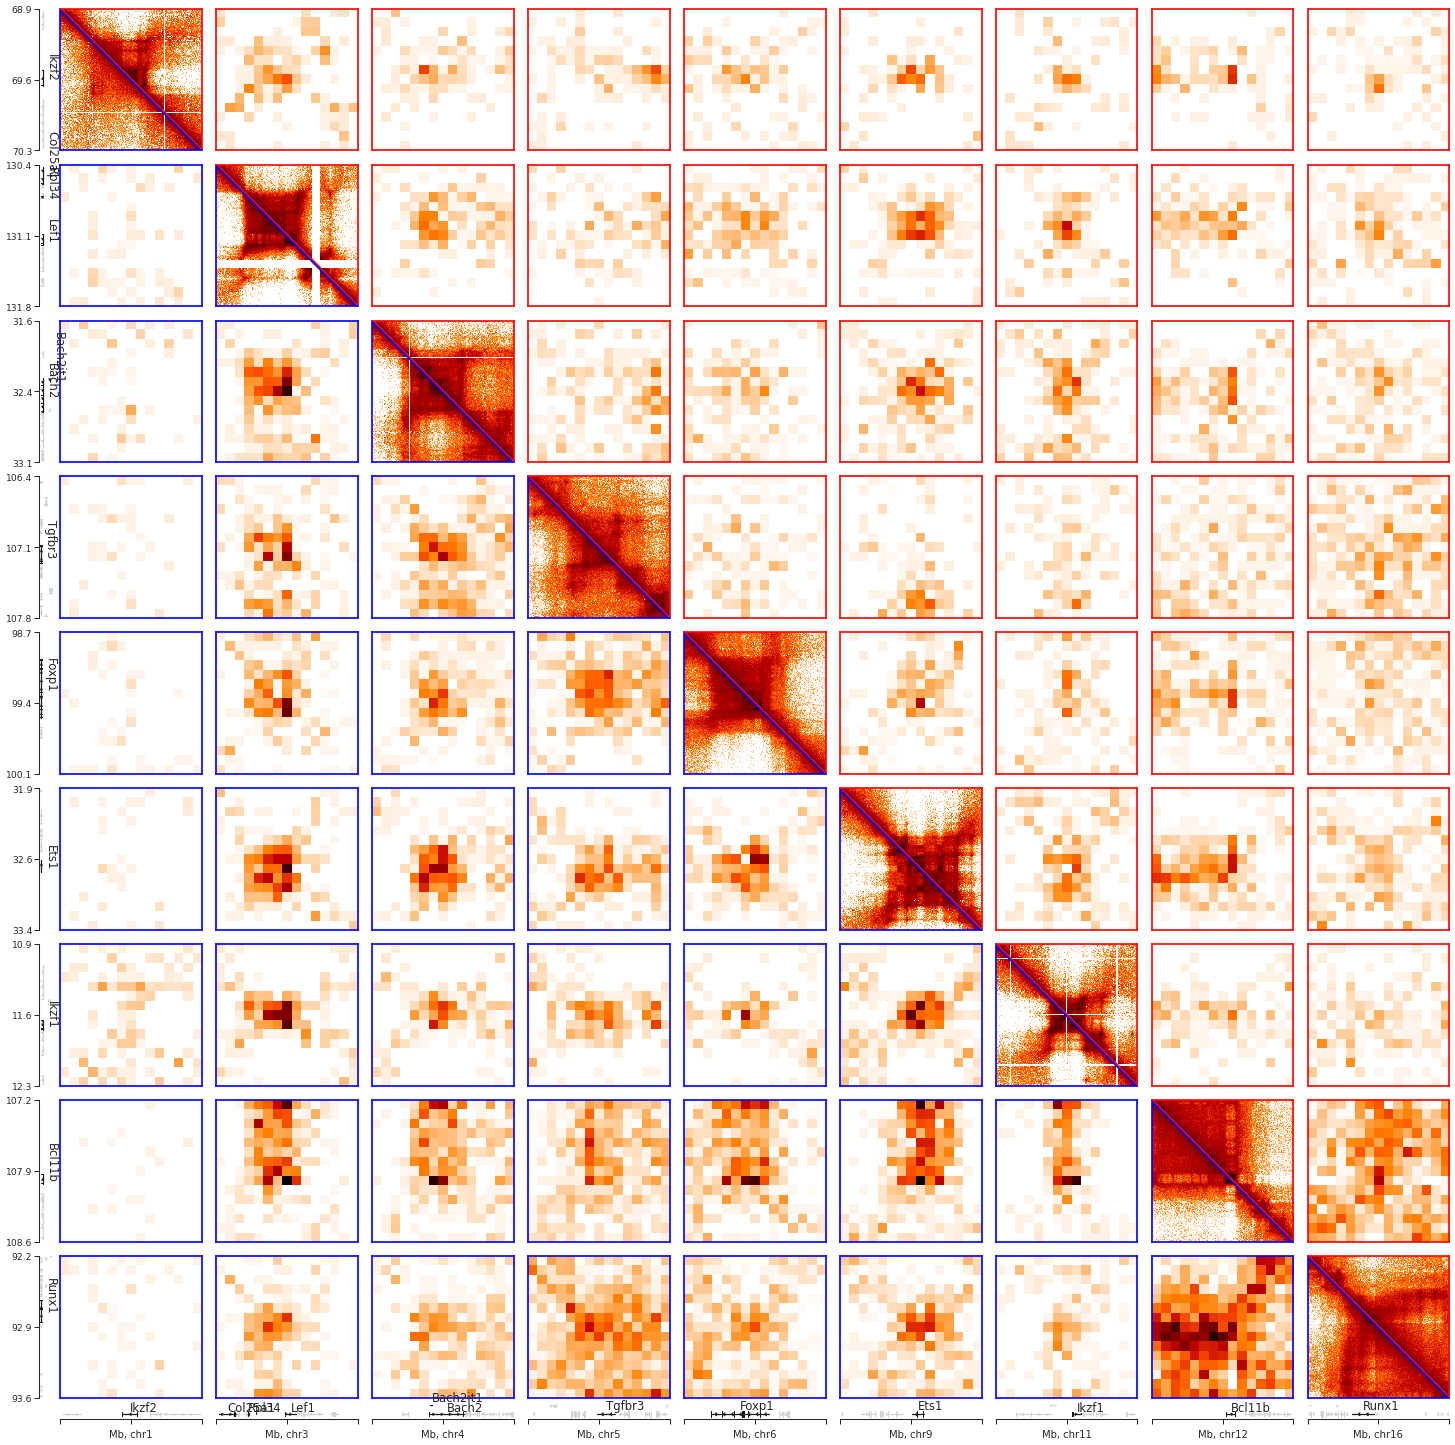

In [53]:
make_figure_3f()

### Make Figure 6b


nan
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
nan
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
{'balance': True}
nan
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf


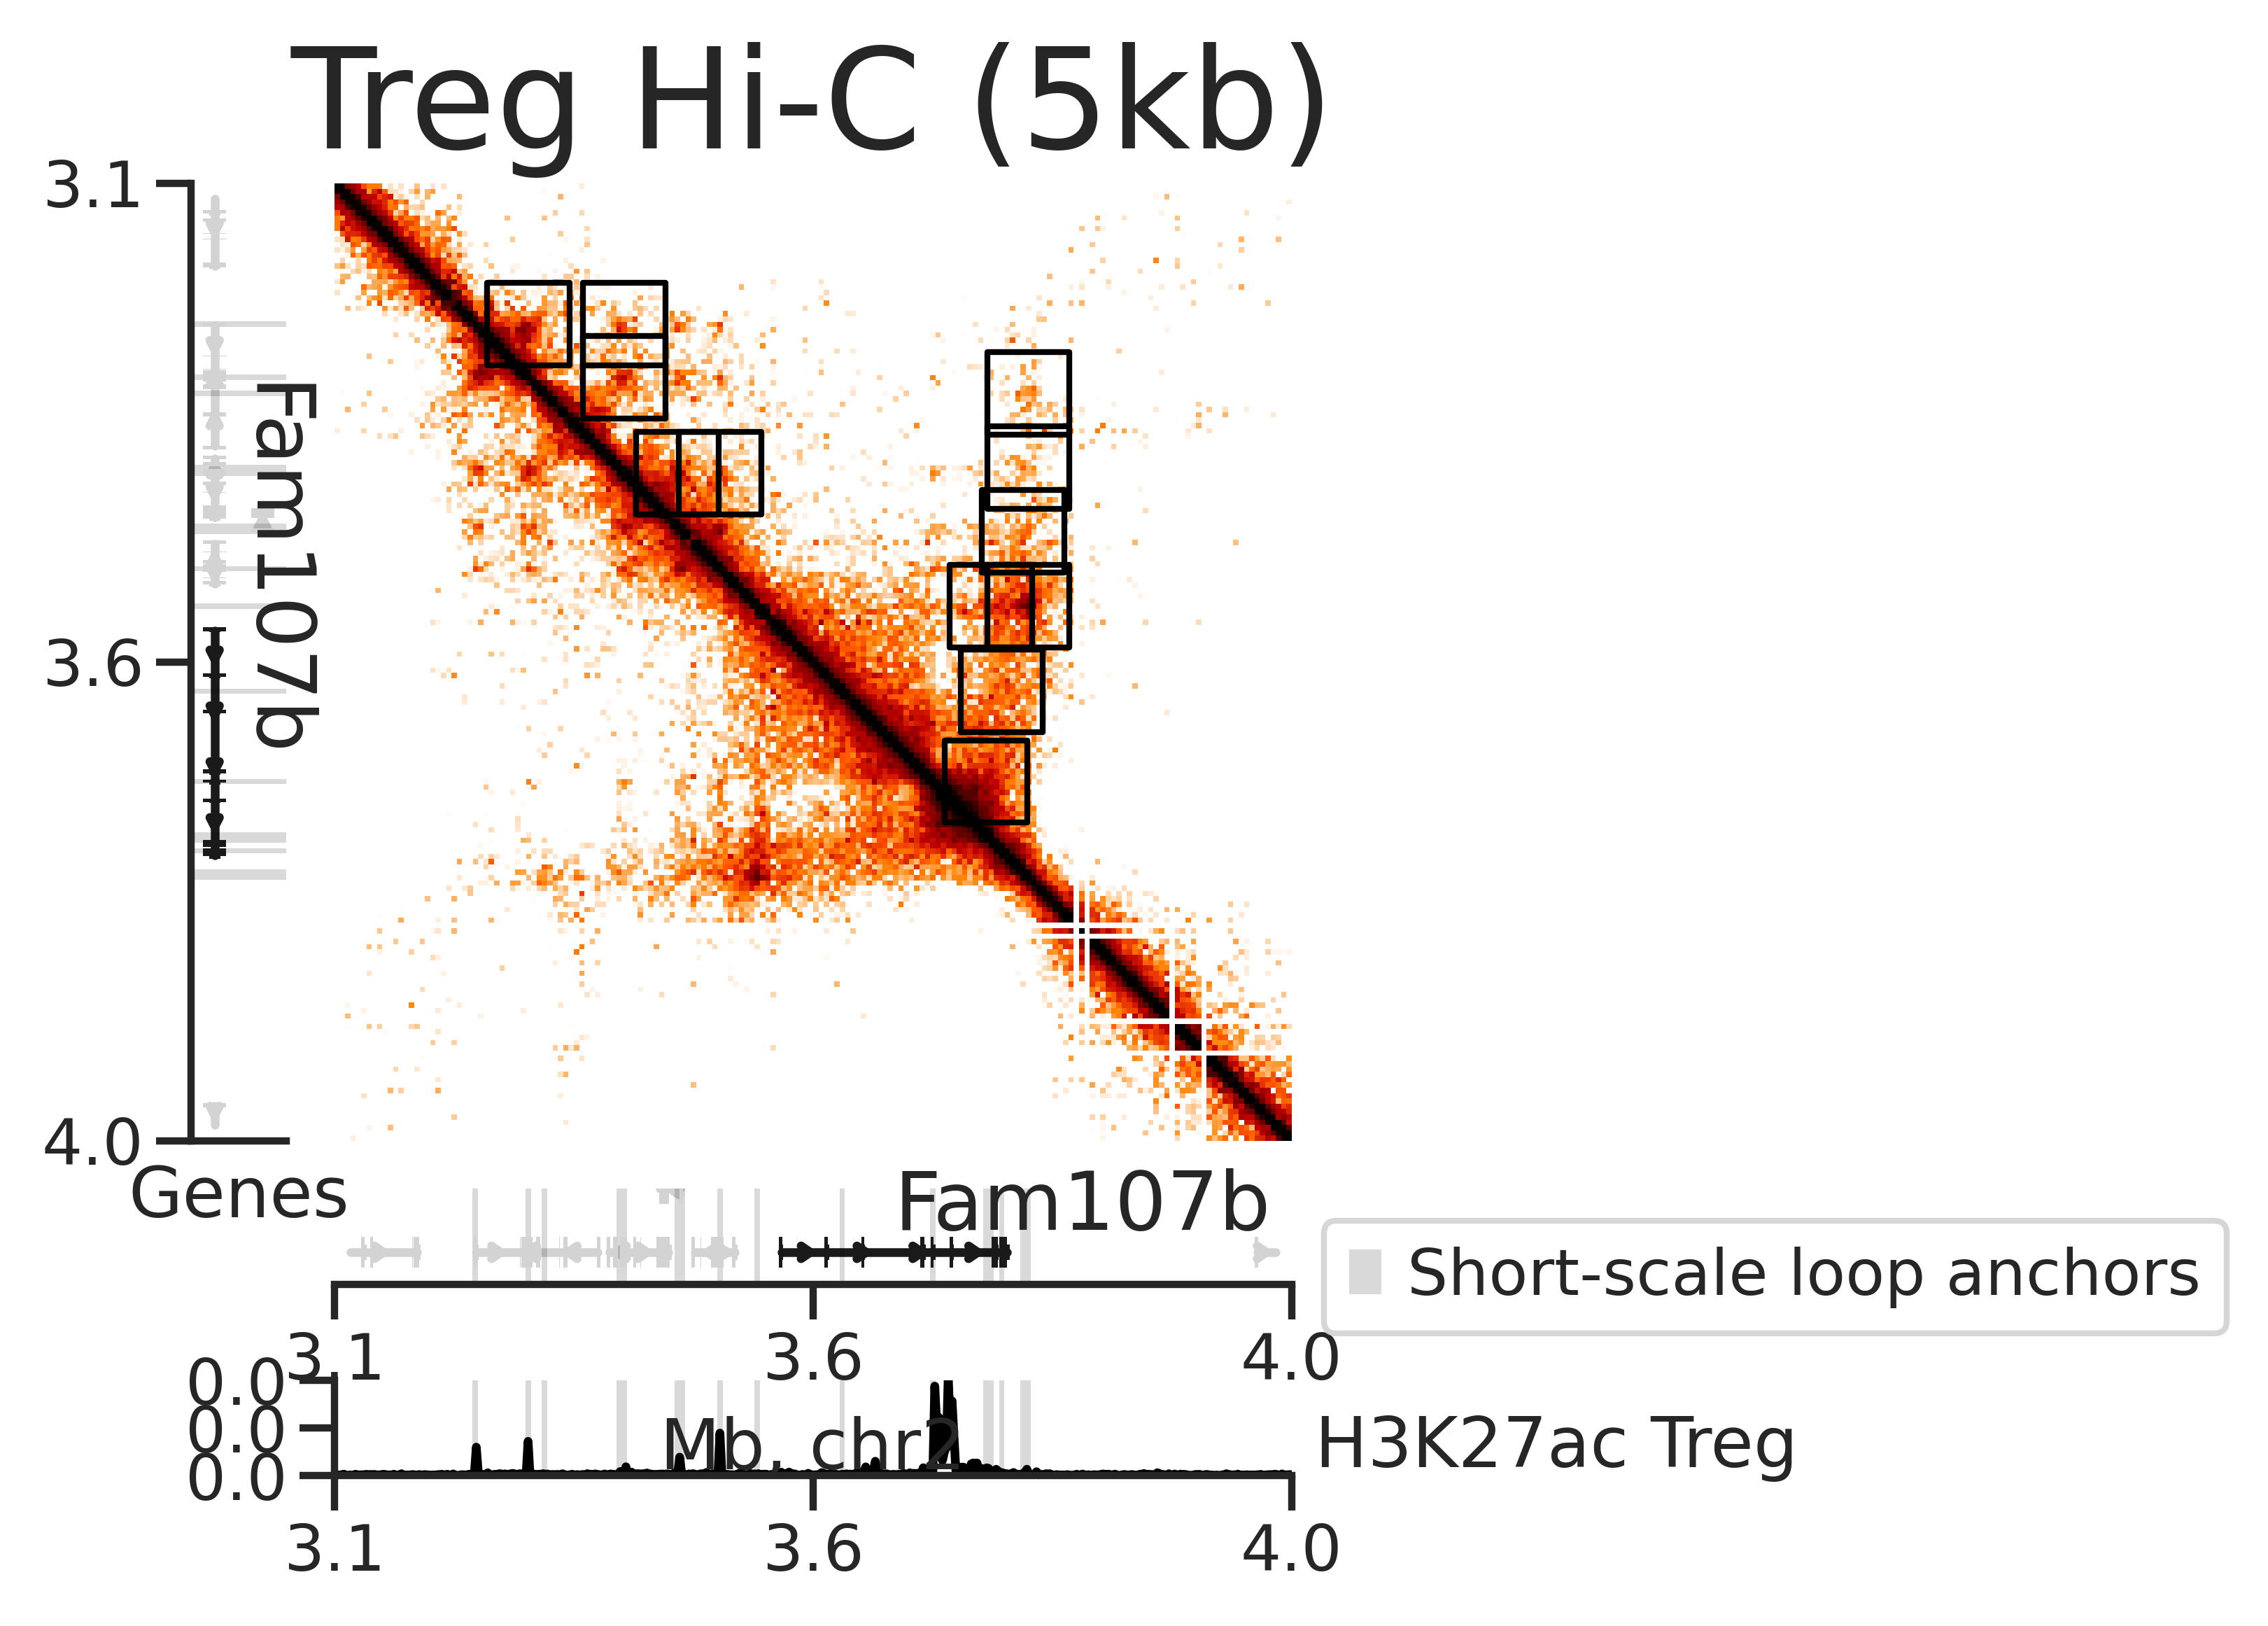

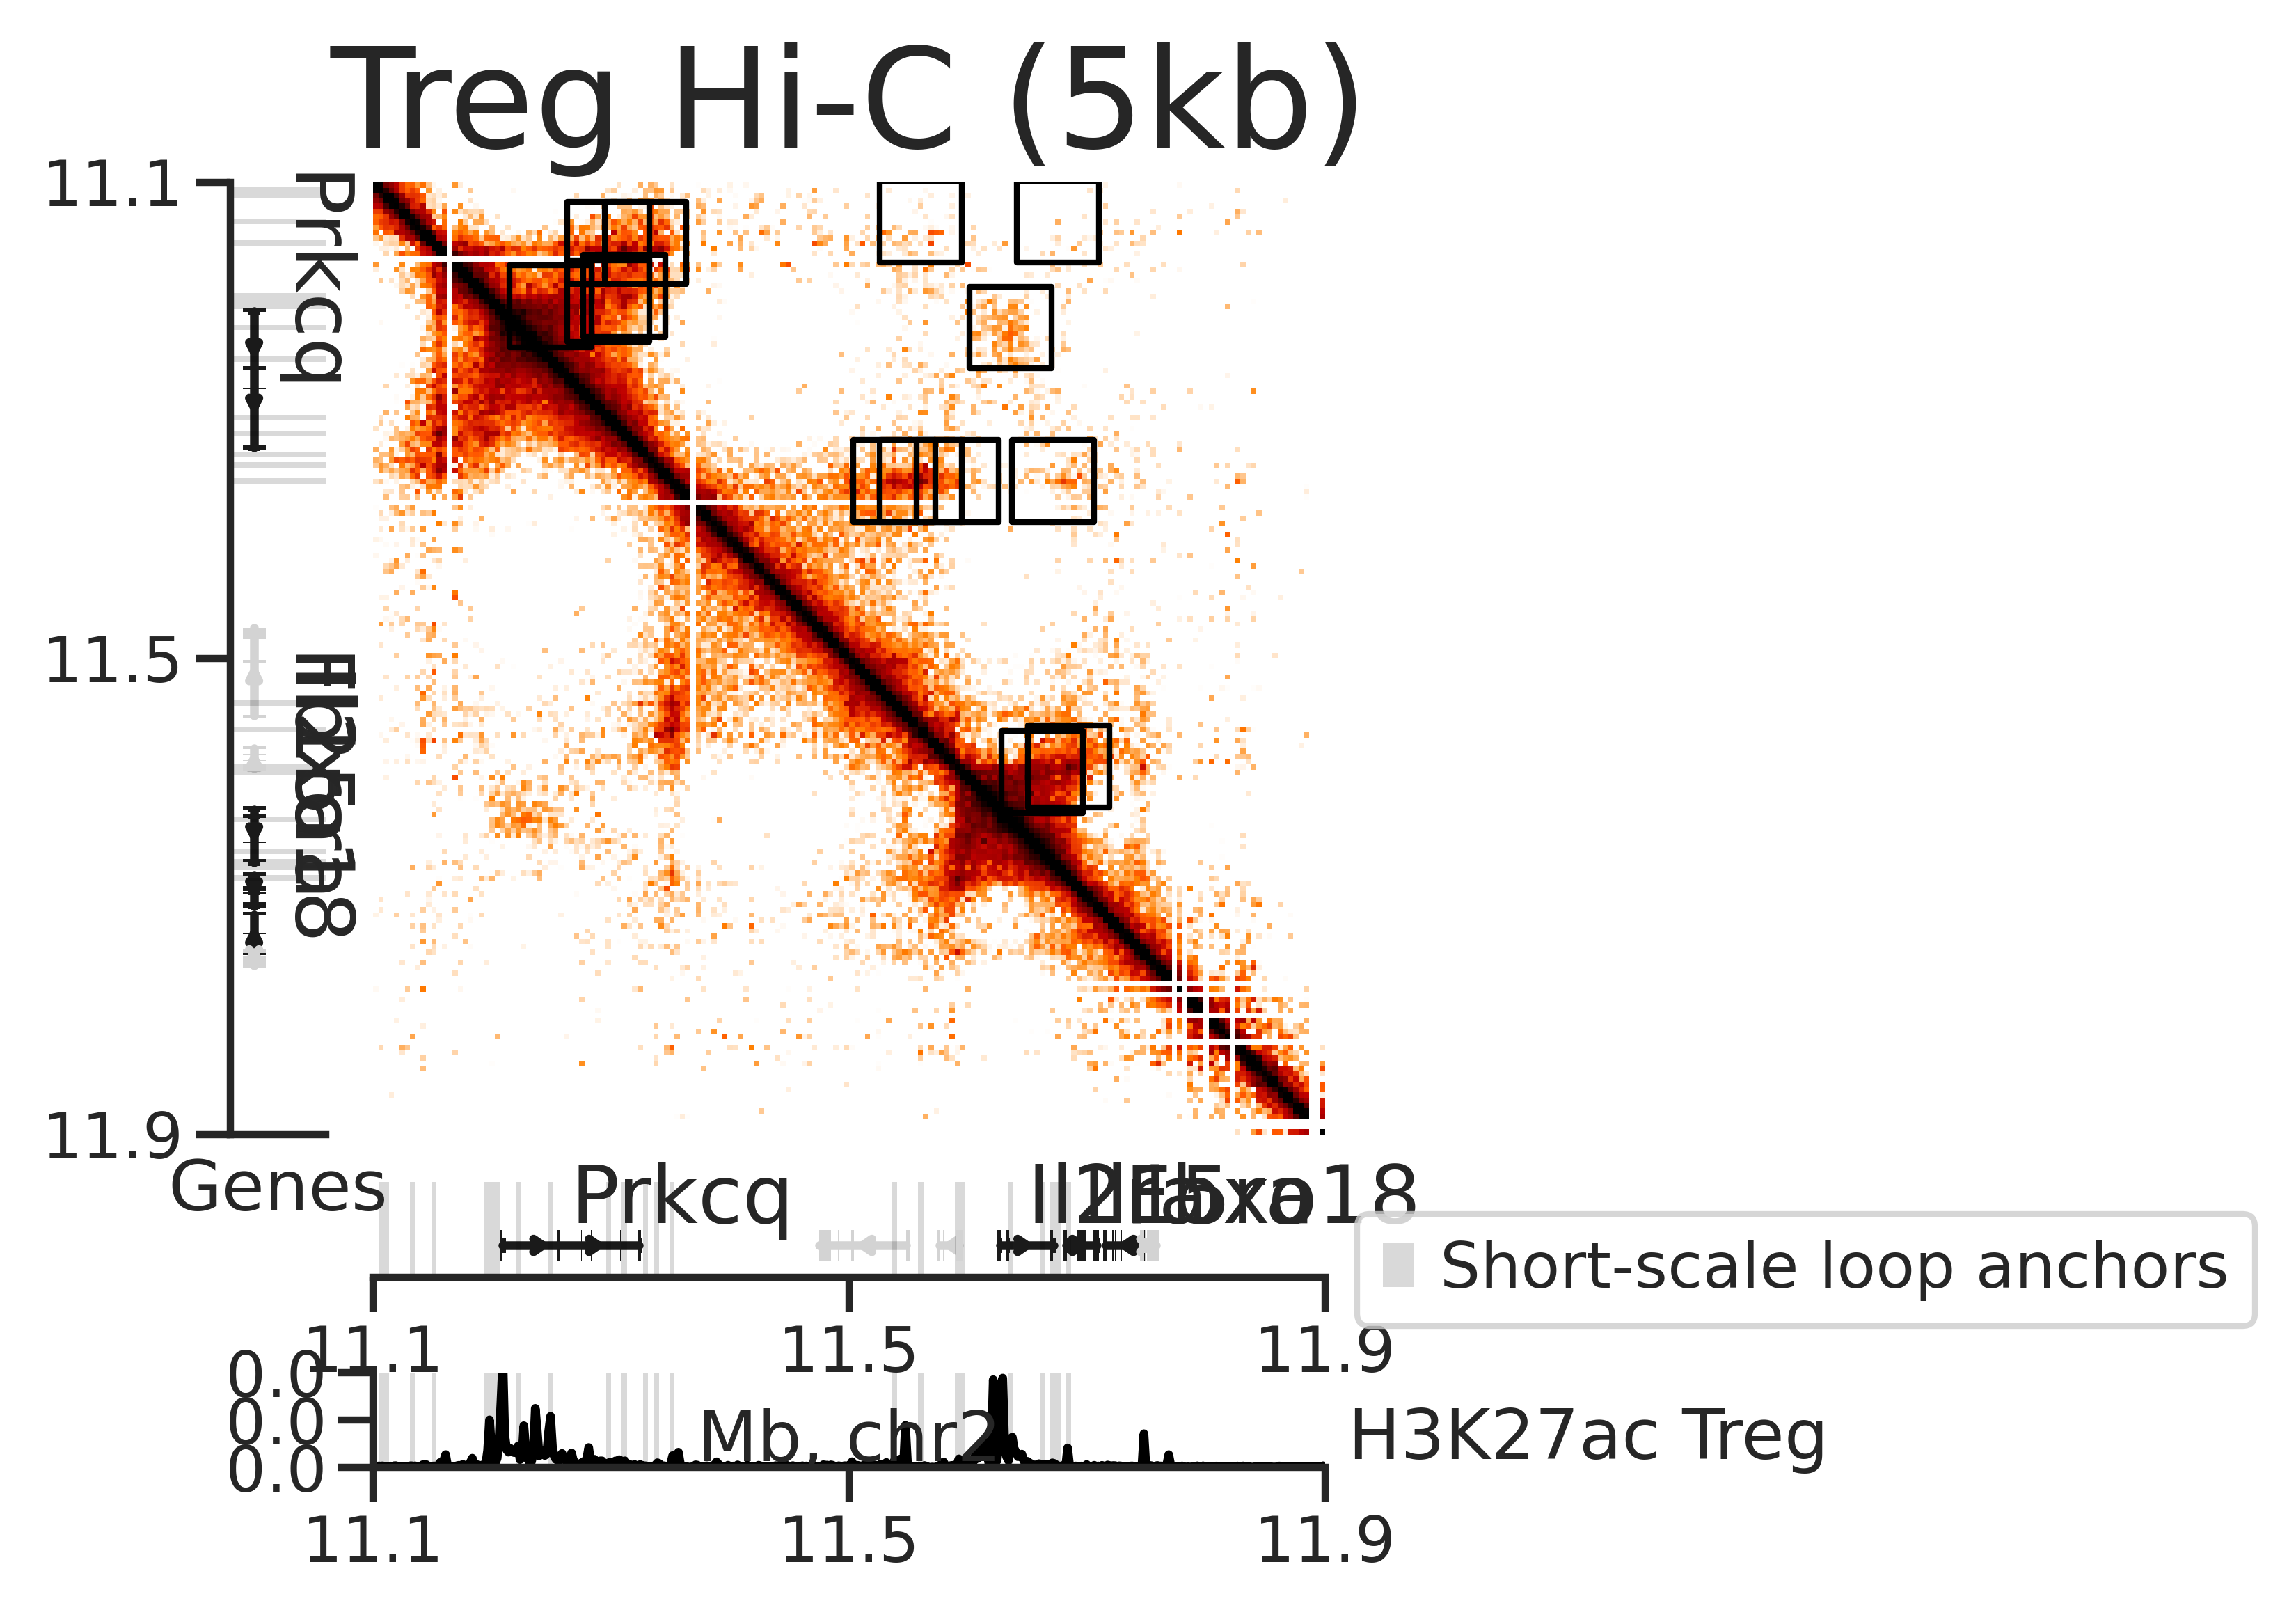

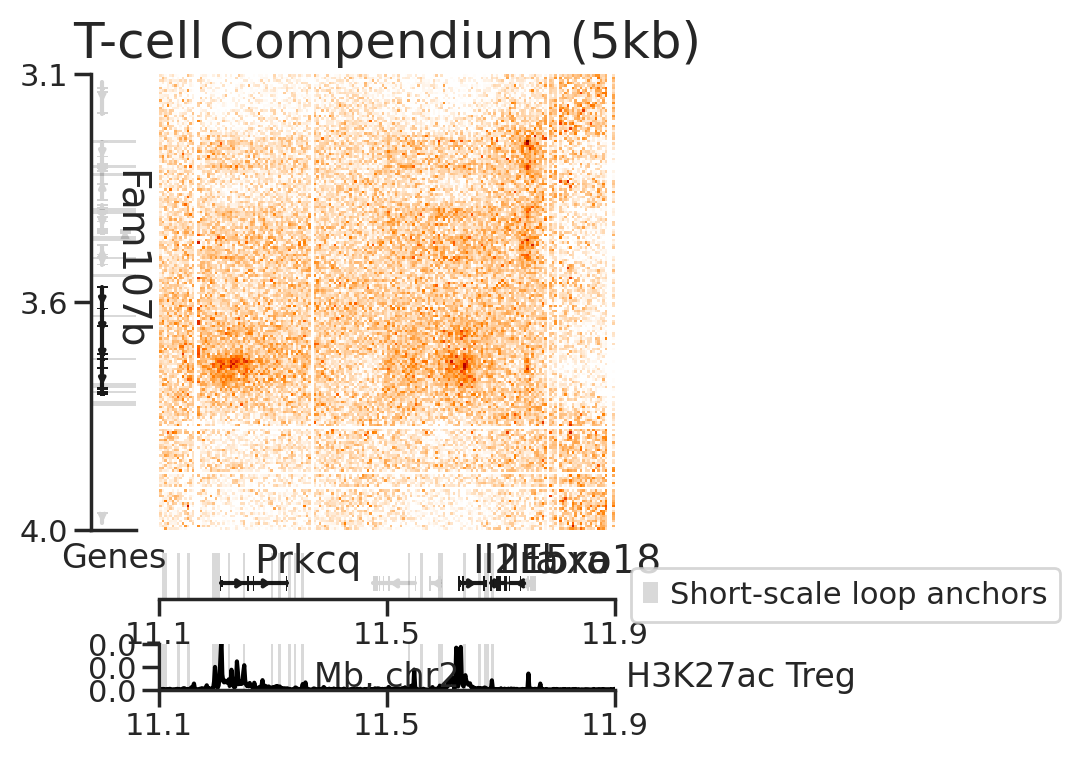

In [84]:
make_figure_6b()

### Make Figure 6I

['Abi2', 'Cyp20a1', 'Nbeal1', 'Nbeal', 'Wdr12', 'Raph', 'Carf', 'Ica1l', 'Raph1', 'Mroh2a', 'Ugt1a10', 'Platr5', 'Trpm8', 'Spp2', 'Hjurp', 'Ugt1a9', 'Ugt1a8', 'Ugt1a7c', 'Ugt1a6b', 'Ugt1a6a', 'Ugt1a5', 'Ugt1a2', 'Dnajb3', 'Ugt1a1']
{'balance': True}
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
['Abi2', 'Cyp20a1', 'Nbeal1', 'Nbeal', 'Wdr12', 'Raph', 'Carf', 'Ica1l', 'Raph1', 'Mroh2a', 'Ugt1a10', 'Platr5', 'Trpm8', 'Spp2', 'Hjurp', 'Ugt1a9', 'Ugt1a8', 'Ugt1a7c', 'Ugt1a6b', 'Ugt1a6a', 'Ugt1a5', 'Ugt1a2', 'Dnajb3', 'Ugt1a1']
{'balance': True}
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
['Abi2', 'Cyp20a1', 'Nbeal1', 'Nbeal', 'Wdr12', 'Raph', 'Carf', 'Ica1l', 'Ra

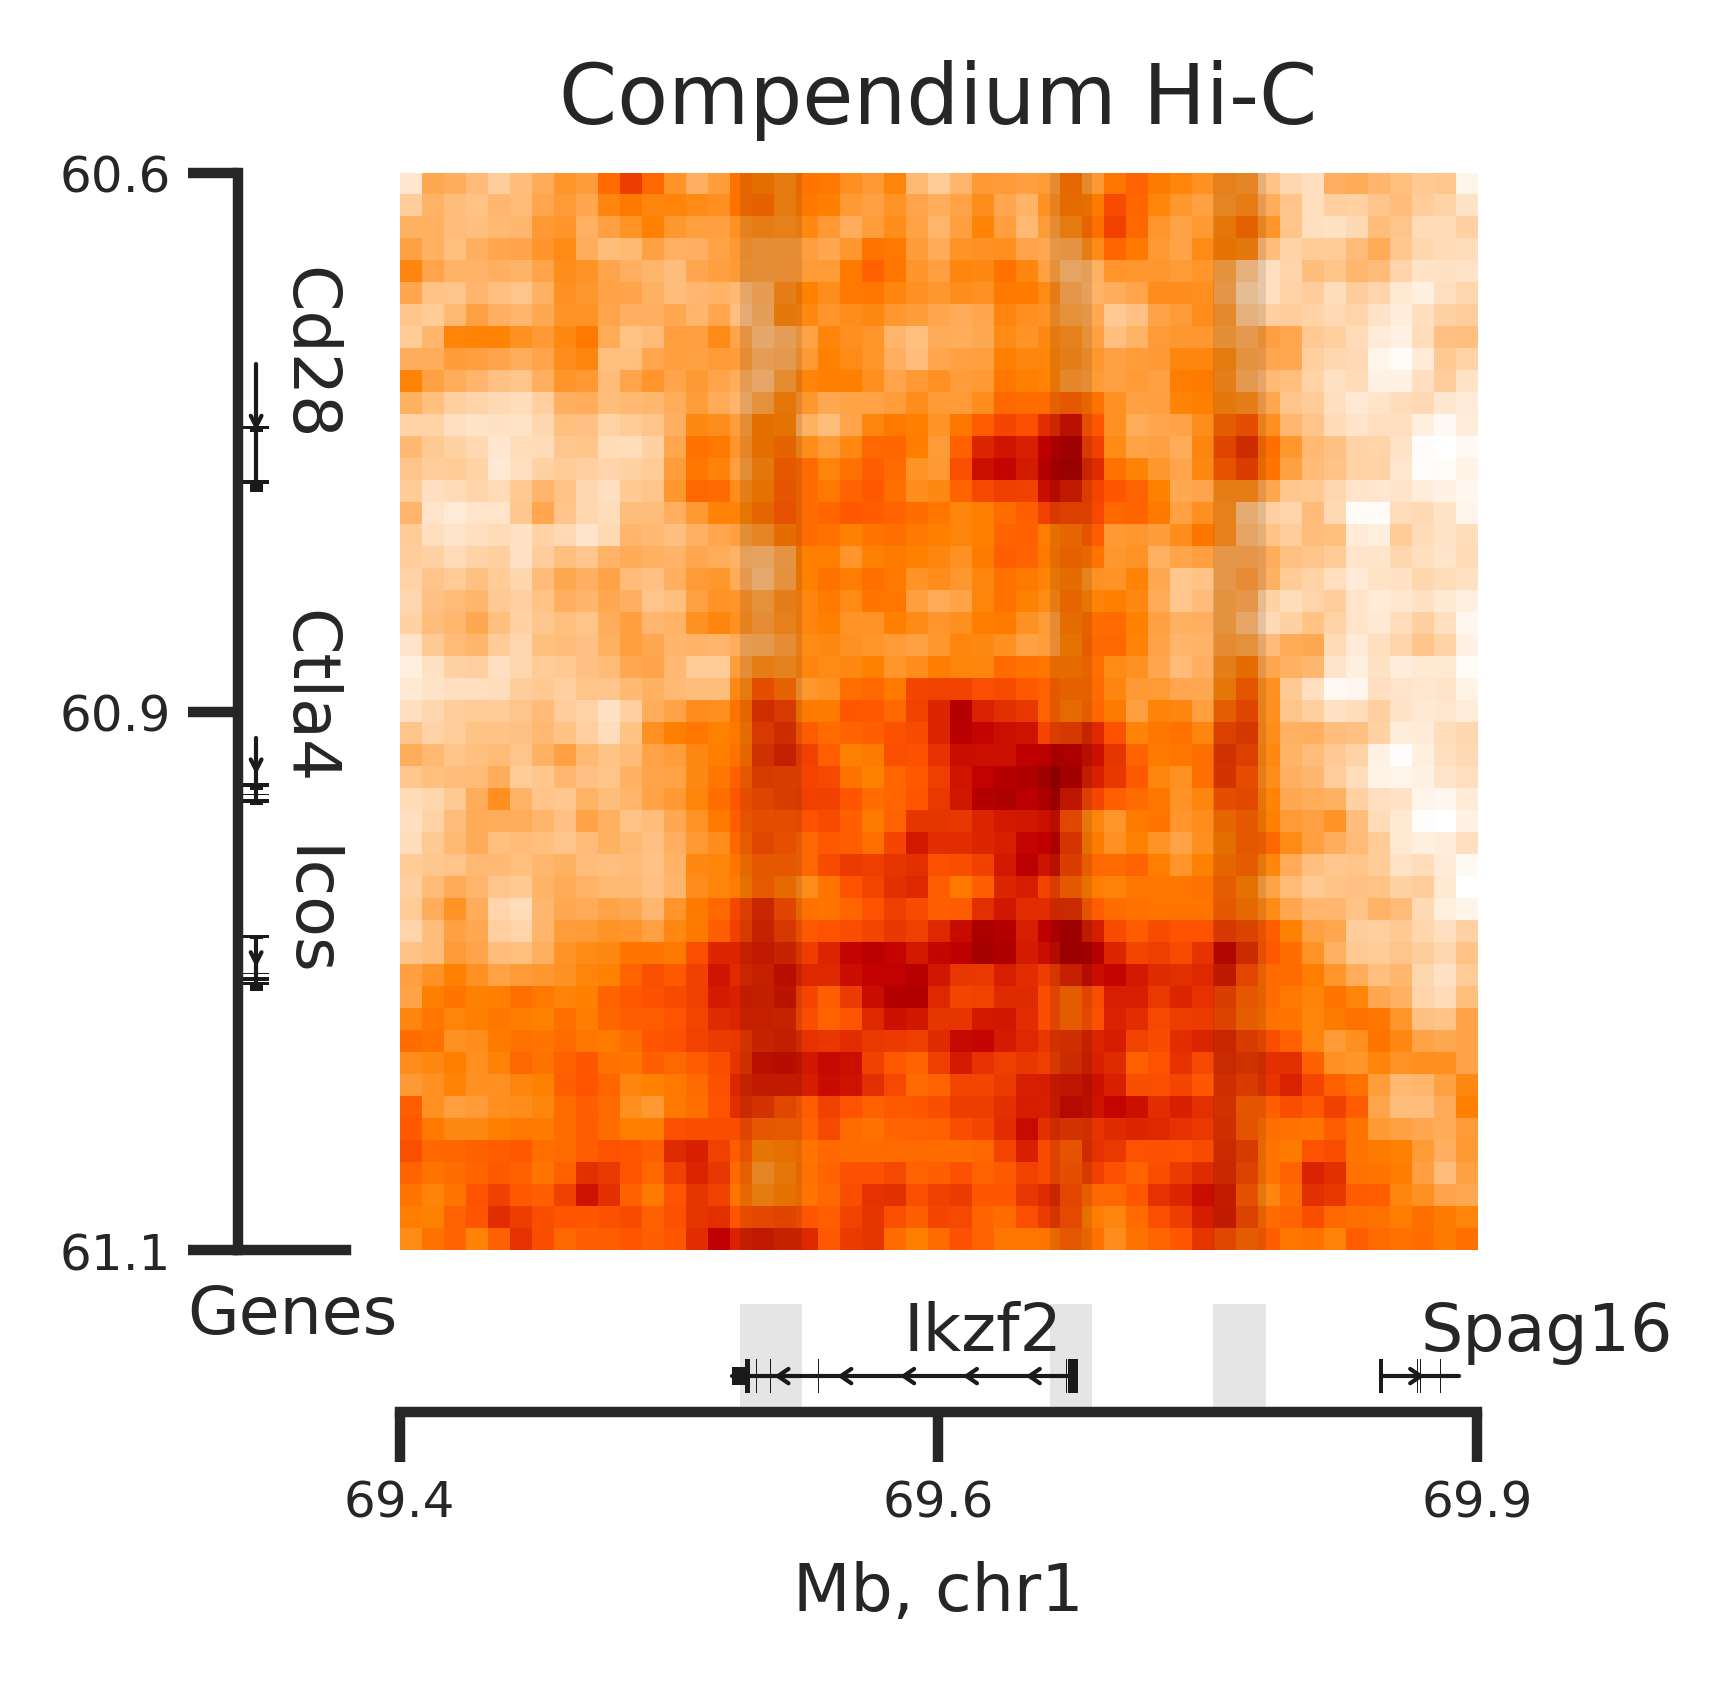

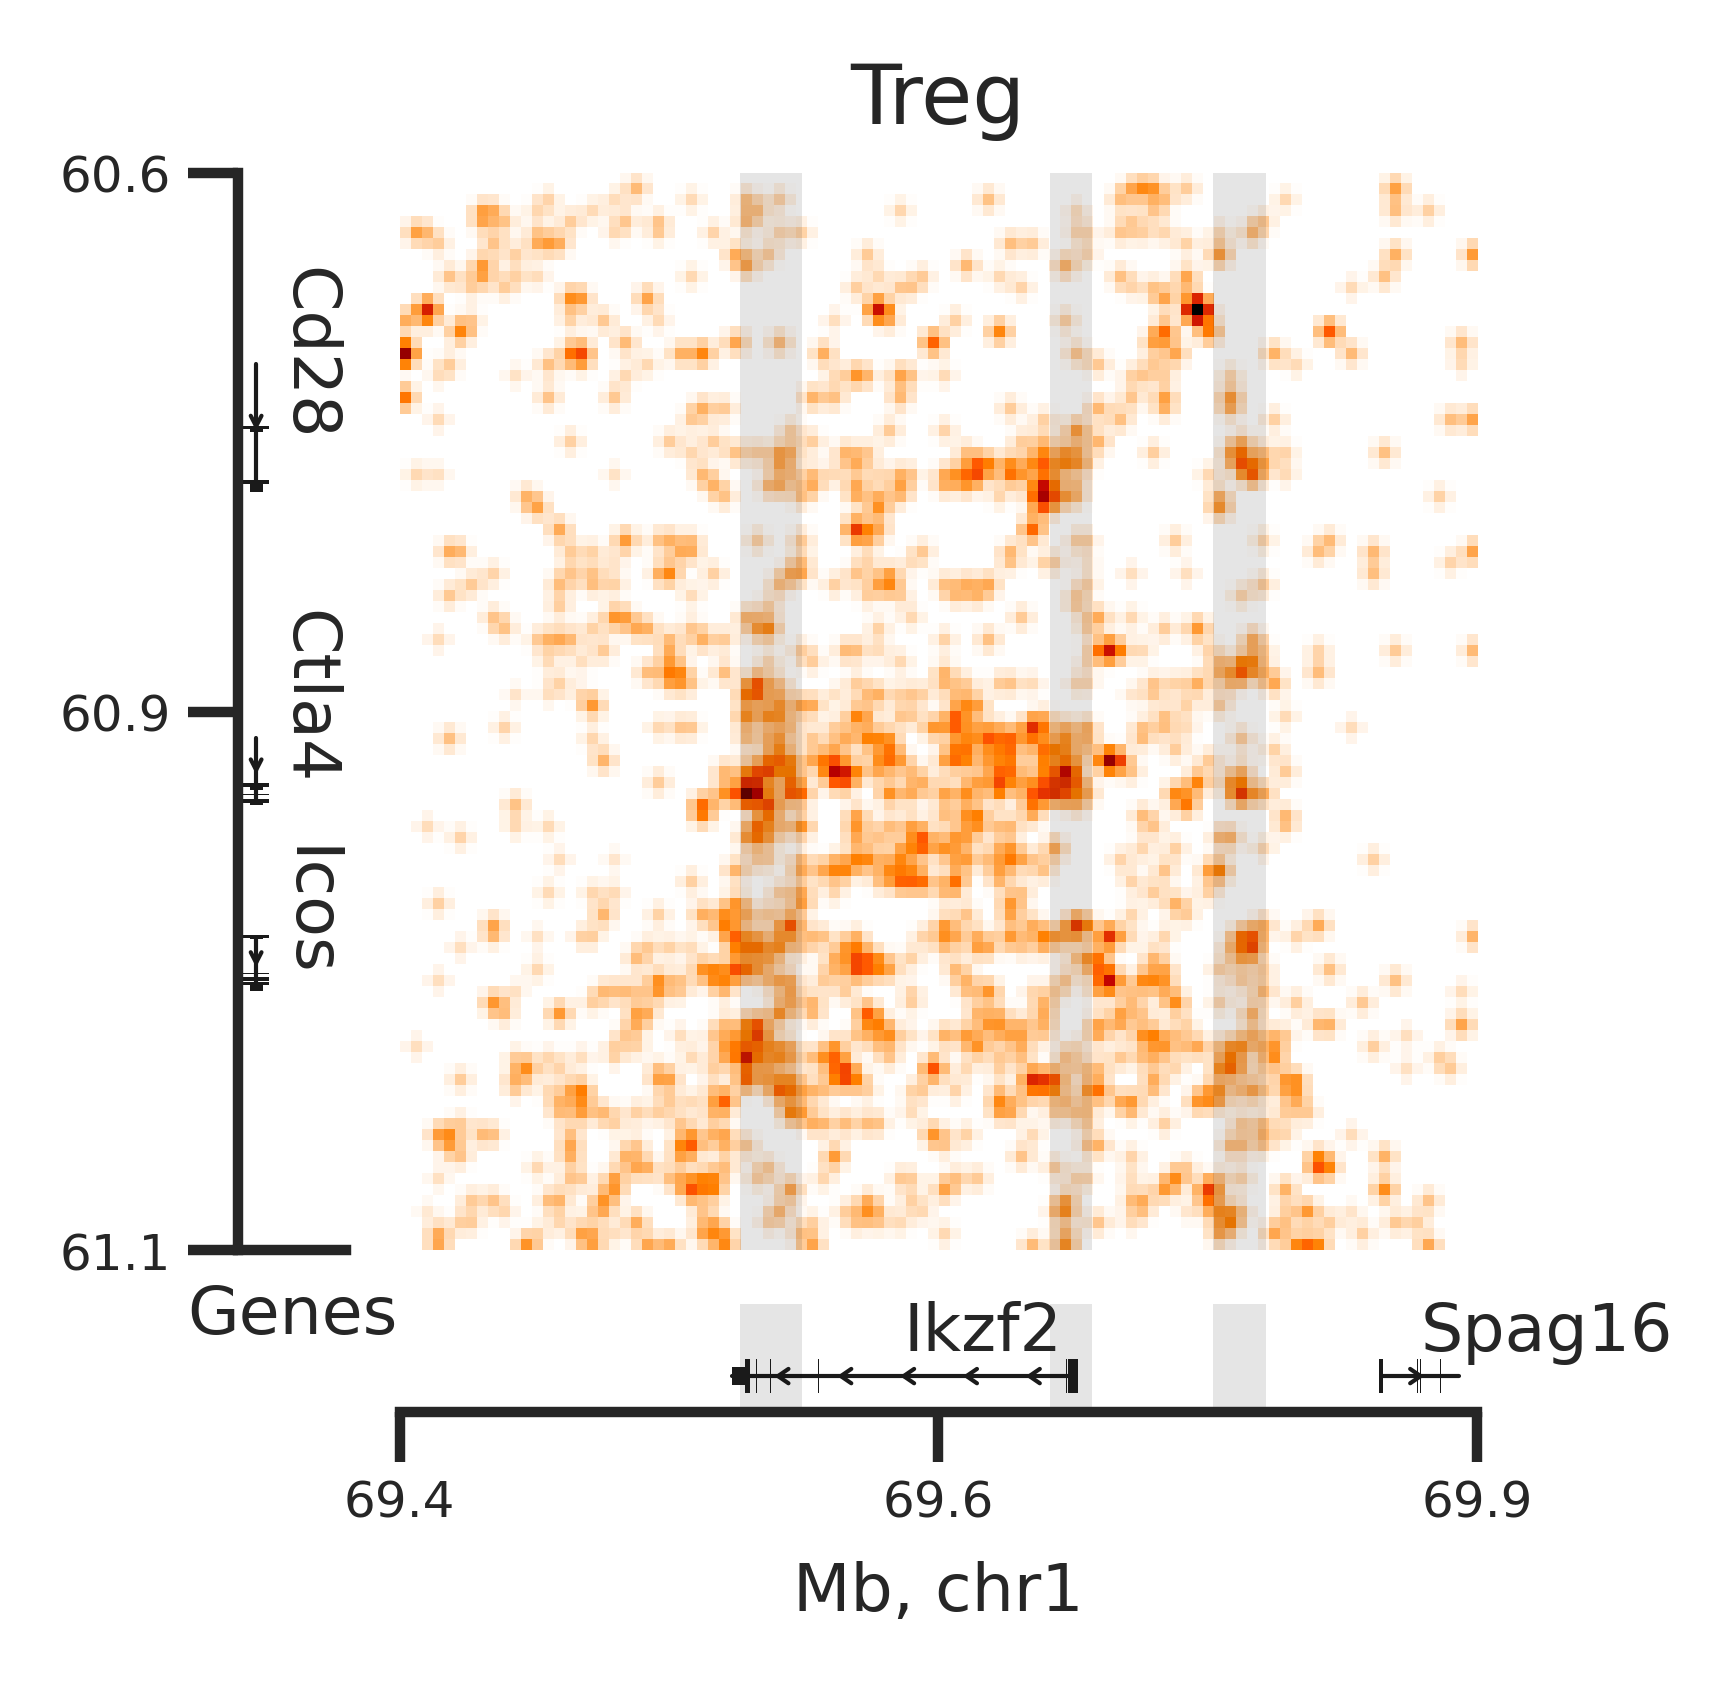

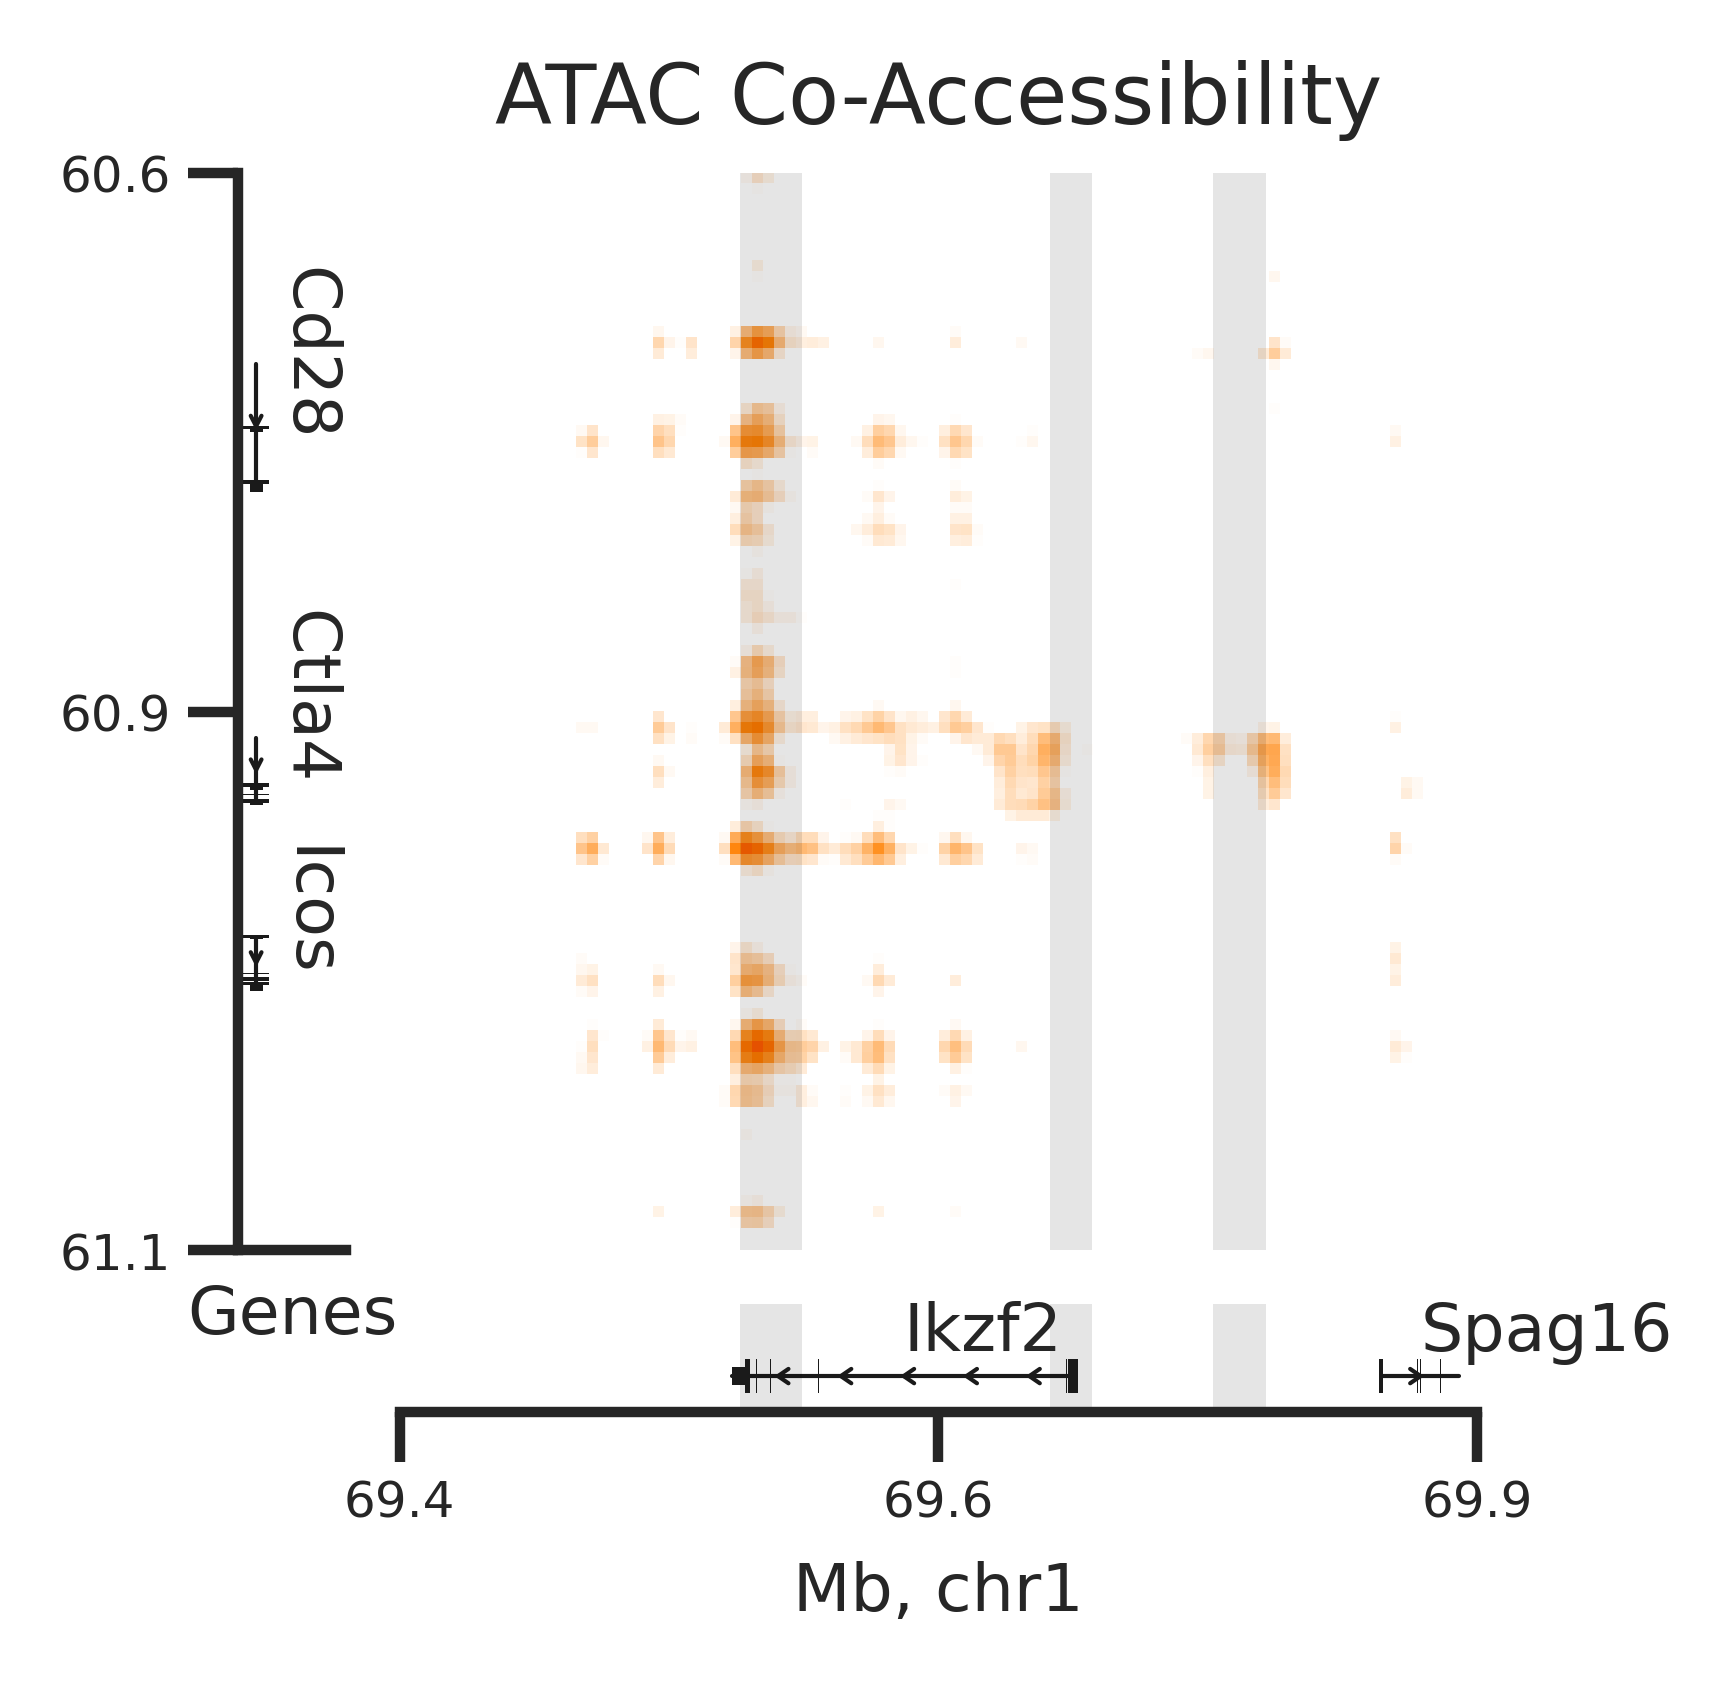

In [92]:
make_figure_6i()

### Make figure S12

In [ ]:
%load_ext autoreload
%autoreload 2

from metadomain_plotting_functions import make_scoping_plot_for_fig1_near_diag
from plotting_functions import *
import itertools
from interchromosomal_hub_plots import plot_repressive_hub, plot_active1_hub


bw_pref = '../../snakemake_sras/bws/'
h3k27me3_bbdict = {
    'H3K27me3 Treg' : bbi.open('/Genomics/argo/users/gdolsten/pritlab/snakemake_sras/bws/GSM.SRR5385318.H3K27me3_ChIP-seq_of_Tconv.bw')
}

fig = plot_active1_hub(all_ind_to_region, all_gene_names, get_treg_mat, get_tcon_mat, treg_5kb, tcon_5kb)
fig.savefig('./plots/paper/s16/active1_gtf_network_plot.pdf', bbox_inches='tight')

fig = plot_repressive_hub(all_ind_to_region, all_gene_names, get_treg_mat, get_tcon_mat, treg_5kb, tcon_5kb, h3k27me3_bbdict)
fig.savefig('./plots/paper/s16/repressive_gtf_network_plot.pdf', bbox_inches='tight')

### Plot Arl4c Metadomain

0.001200184159846674
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
Ikzf2
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
Arl4c
Glrp1
HI
0.0003218252634224886
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
Ikzf2
file: /Genomics/argo/users/gdolsten/pritlab/jupys/tregs/pygbrowse/Mus_musculus.GRCm38.93.chr.gff3.gz.bgzf
Arl4c
Glrp1
HI


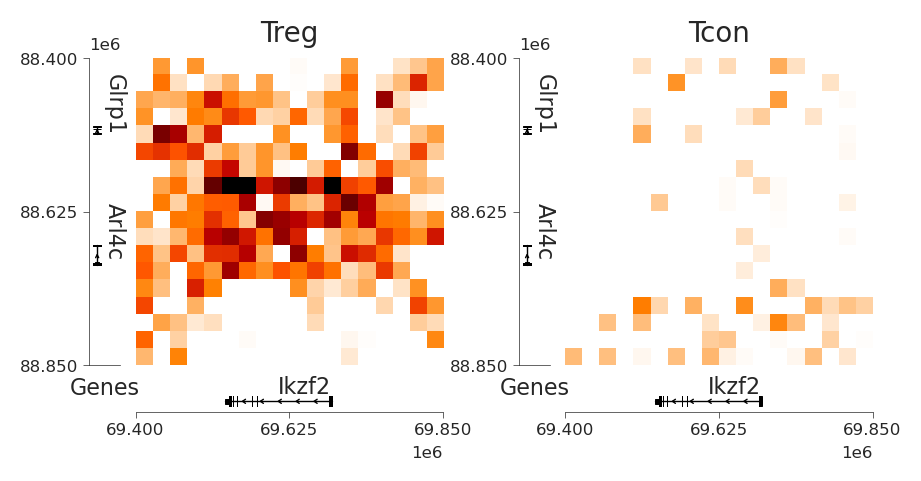

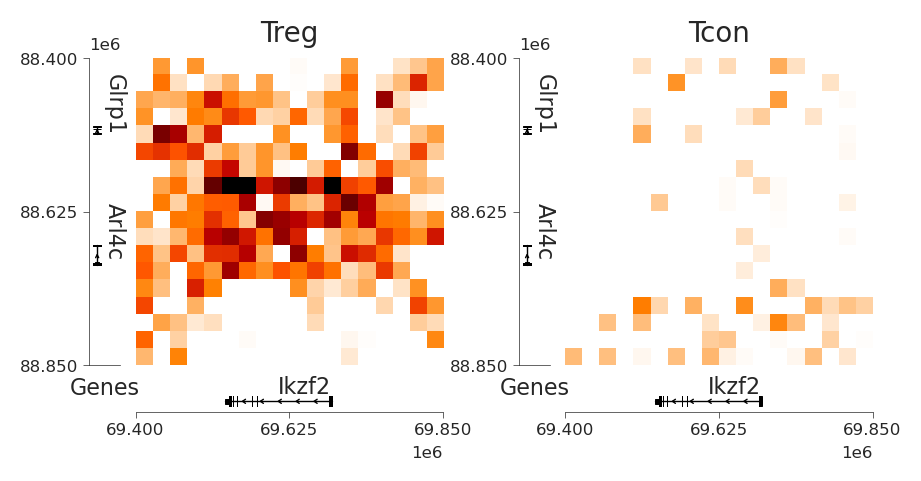

In [44]:
%autoreload 2 
from plotting_functions import * 
from metadomain_plotting_functions import * 
from metadomain_plotting_functions import * 
from plotting_functions import * 

ignore_sets = [
    [small_ignore_set + ['Spag16'], small_ignore_set + ['Spag16']],
]
ds = [
    [50000*2, 50000*2],
]
funcs = [
    [get_treg_mat, get_tcon_mat],
]
labels = [
    ['Treg', 'Tcon'],
]

vmins = [[.9e-4, .9e-4],]
vmaxes = [[1e-3, 1e-3],]

n_rows = len(ds)
n_cols = len(ds[0])
n = n_rows*n_cols
mm = 1/2.54/10  # mm in inches
fig, axs = init_subplots(n, n_rows, fgsz = (2*30*mm, 2*30*mm), dpi=100)
fig.subplots_adjust(wspace=.4)
bbdict = {**treg_bbdict, **tcon_bbdict}

for c, ax in enumerate(axs):
    row_ind = c//n_cols
    col_ind = c%n_cols
    func = funcs[row_ind][col_ind]
    ignore_set = ignore_sets[row_ind][col_ind]
    d = ds[row_ind][col_ind]
    label = labels[row_ind][col_ind]
    vmin = vmins[row_ind][col_ind]
    vmax = vmaxes[row_ind][col_ind]
    _, newaxs, ax = make_scoping_plot_for_fig1(treg_50kb, 354, 278, func, label, resolution=25_000, d=d,
                                ignore_set = ignore_set, vmin=vmin, vmax=vmax, vert_bbdict=bbdict,
                                bwcolor='black', gene_name_fontsize=8, 
                                all_ind_to_region = all_ind_to_region,
                                ylimdict = ylimdict, ax=ax
                                           )
    if c <= (n//n_cols): # if it isn't on the bottom row
        print("HI")
        # newaxs[0][1].remove()
        for a in newaxs[1]:
            a.remove()
    if c > (n//n_cols): # if is on the bottom row, remove xticks
        for a in newaxs[1][:-1]:
            a.set_xticks([])
    if c < len(axs) - 1: # if it isn't the last one
        for a in newaxs[1]:
            a.set_ylabel("")
    if c % n_cols != 0: # If it isn't on the LHS
        for a in newaxs[1]:
            a.set_yticklabels([])
fig

In [35]:
fig.savefig('./plots/FINAL_MEGA_PLOTS/ikzf2_arl4c.pdf', bbox_inches='tight', dpi= 300)